In [1]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

In [3]:
#train = pd.read_csv('data/train_FD001.txt')
#train.columns = ["UnitNumber","Cycle", "OperationalSetting1", "OperationalSetting2", "OperationalSetting3", "SensorMeasurement1","SensorMeasurement2","SensorMeasurement3","SensorMeasurement4", "SensorMeasurement5", "SensorMeasurement6","SensorMeasurement7","SensorMeasurement8","SensorMeasurement9","SensorMeasurement10","SensorMeasurement11","SensorMeasurement12","SensorMeasurement13","SensorMeasurement14","SensorMeasurement15","SensorMeasurement16","SensorMeasurement17","SensorMeasurement18","SensorMeasurement19","SensorMeasurement20","SensorMeasurement21"]
#train.to_csv("train_FD001.txt", index=None)

In [4]:
#loading in the train data and giving the columns names
train = pd.read_csv('data/train_FD001.txt',sep=" ",header=None)
train = train.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
train

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0               1      1               -0.001               -0.000   
1               1      2                0.002               -0.000   
2               1      3               -0.004                0.000   
3               1      4                0.001                0.000   
4               1      5               -0.002               -0.000   
...           ...    ...                  ...                  ...   
20626         100    196               -0.000               -0.000   
20627         100    197               -0.002               -0.001   
20628         100    198                0.000                0.000   
20629         100    199               -0.001                0.000   
20630         100    200               -0.003               -0.001   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0                  100.000             518.670             641.820   
1                  100.000             518.670             642.150   
2                  100.000             518.670             642.350   
3                  100.000             518.670             642.350   
4                  100.000             518.670             642.370   
...                    ...                 ...                 ...   
20626              100.000             518.670             643.490   
20627              100.000             518.670             643.540   
20628              100.000             518.670             643.420   
20629              100.000             518.670             643.230   
20630              100.000             518.670             643.850   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0                1589.700            1400.600              14.620  ...   
1                1591.820            1403.140              14.620  ...   
2                1587.990            1404.200              14.620  ...   
3                1582.790            1401.870              14.620  ...   
4                1582.850            1406.220              14.620  ...   
...                   ...                 ...                 ...  ...   
20626            1597.980            1428.630              14.620  ...   
20627            1604.500            1433.580              14.620  ...   
20628            1602.460            1428.180              14.620  ...   
20629            1605.260            1426.530              14.620  ...   
20630            1600.380            1432.140              14.620  ...   

       SensorMeasurement14  SensorMeasurement15  SensorMeasurement16  \
0                 8138.620                8.419                0.030   
1                 8131.490                8.432                0.030   
2                 8133.230                8.418                0.030   
3                 8133.830                8.368                0.030   
4                 8133.800                8.429                0.030   
...                    ...                  ...                  ...   
20626             8137.600                8.496                0.030   
20627             8136.500                8.514                0.030   
20628             8141.050                8.565                0.030   
20629             8139.290                8.539                0.030   
20630             8137.330                8.504                0.030   

       SensorMeasurement17  SensorMeasurement18  SensorMeasurement19  \
0                      392                 2388              100.000   
1                      392                 2388              100.000   
2                      390                 2388              100.000   
3                      392                 2388              100.000   
4                      393                 2388              100.000   
...                    ...                  ...                  ...   
20626                  397                 2388              100.00

In [5]:
train1 = pd.read_csv('data/train_FD002.txt',sep=" ",header=None)
train1 = train1.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
train1

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0               1      1               34.998                0.840   
1               1      2               41.998                0.841   
2               1      3               24.999                0.622   
3               1      4               42.008                0.842   
4               1      5               25.000                0.620   
...           ...    ...                  ...                  ...   
53754         260    312               20.004                0.700   
53755         260    313               10.002                0.251   
53756         260    314               25.004                0.620   
53757         260    315               25.003                0.622   
53758         260    316               35.004                0.840   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0                  100.000             449.440             555.320   
1                  100.000             445.000             549.900   
2                   60.000             462.540             537.310   
3                  100.000             445.000             549.510   
4                   60.000             462.540             537.070   
...                    ...                 ...                 ...   
53754              100.000             491.190             608.790   
53755              100.000             489.050             605.810   
53756               60.000             462.540             537.480   
53757               60.000             462.540             537.840   
53758              100.000             449.440             556.640   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0                1358.610            1137.230               5.480  ...   
1                1353.220            1125.780               3.910  ...   
2                1256.760            1047.450               7.050  ...   
3                1354.030            1126.380               3.910  ...   
4                1257.710            1047.930               7.050  ...   
...                   ...                 ...                 ...  ...   
53754            1495.600            1269.510               9.350  ...   
53755            1514.320            1324.120              10.520  ...   
53756            1276.240            1057.920               7.050  ...   
53757            1272.950            1066.300               7.050  ...   
53758            1374.610            1145.520               5.480  ...   

       SensorMeasurement14  SensorMeasurement15  SensorMeasurement16  \
0                 8048.560                9.346                0.020   
1                 8072.300                9.377                0.020   
2                 7864.870               10.894                0.020   
3                 8068.660                9.353                0.020   
4                 7861.230               10.896                0.020   
...                    ...                  ...                  ...   
53754             8169.640                9.303                0.030   
53755             8245.360                8.759                0.030   
53756             7971.250               11.066                0.020   
53757             7972.470               11.054                0.020   
53758             8185.350                9.400                0.020   

       SensorMeasurement17  SensorMeasurement18  SensorMeasurement19  \
0                      334                 2223              100.000   
1                      330                 2212              100.000   
2                      309                 1915               84.930   
3                      329                 2212              100.000   
4                      309                 1915               84.930   
...                    ...                  ...                  ...   
53754                  369                 2324              100.00

In [6]:
train2 = pd.read_csv('data/train_FD003.txt',sep=" ",header=None)
train2 = train2.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
train2

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0               1      1               -0.001                0.000   
1               1      2                0.001               -0.000   
2               1      3               -0.001               -0.000   
3               1      4               -0.002                0.000   
4               1      5                0.002                0.000   
...           ...    ...                  ...                  ...   
24715         100    148               -0.002               -0.000   
24716         100    149                0.003               -0.000   
24717         100    150               -0.002                0.000   
24718         100    151               -0.002                0.000   
24719         100    152                0.000                0.000   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0                  100.000             518.670             642.360   
1                  100.000             518.670             642.500   
2                  100.000             518.670             642.180   
3                  100.000             518.670             642.920   
4                  100.000             518.670             641.680   
...                    ...                 ...                 ...   
24715              100.000             518.670             643.780   
24716              100.000             518.670             643.290   
24717              100.000             518.670             643.840   
24718              100.000             518.670             643.940   
24719              100.000             518.670             643.640   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0                1583.230            1396.840              14.620  ...   
1                1584.690            1396.890              14.620  ...   
2                1582.350            1405.610              14.620  ...   
3                1585.610            1392.270              14.620  ...   
4                1588.630            1397.650              14.620  ...   
...                   ...                 ...                 ...  ...   
24715            1596.010            1424.110              14.620  ...   
24716            1596.380            1429.140              14.620  ...   
24717            1604.530            1431.410              14.620  ...   
24718            1597.560            1426.570              14.620  ...   
24719            1599.040            1436.060              14.620  ...   

       SensorMeasurement14  SensorMeasurement15  SensorMeasurement16  \
0                 8145.320                8.425                0.030   
1                 8152.850                8.440                0.030   
2                 8150.170                8.390                0.030   
3                 8146.560                8.388                0.030   
4                 8147.800                8.387                0.030   
...                    ...                  ...                  ...   
24715             8138.080                8.504                0.030   
24716             8144.360                8.517                0.030   
24717             8135.950                8.522                0.030   
24718             8141.240                8.515                0.030   
24719             8136.980                8.515                0.030   

       SensorMeasurement17  SensorMeasurement18  SensorMeasurement19  \
0                      391                 2388              100.000   
1                      392                 2388              100.000   
2                      391                 2388              100.000   
3                      392                 2388              100.000   
4                      392                 2388              100.000   
...                    ...                  ...                  ...   
24715                  394                 2388              100.00

In [7]:
train3 = pd.read_csv('data/train_FD004.txt',sep=" ",header=None)
train3 = train3.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
train3

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0               1      1               42.005                0.840   
1               1      2               20.002                0.700   
2               1      3               42.004                0.841   
3               1      4               42.000                0.840   
4               1      5               25.006                0.621   
...           ...    ...                  ...                  ...   
61244         249    251               10.000                0.250   
61245         249    252                0.003                0.002   
61246         249    253                0.003                0.000   
61247         249    254               35.005                0.840   
61248         249    255               42.003                0.840   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0                  100.000             445.000             549.680   
1                  100.000             491.190             606.070   
2                  100.000             445.000             548.950   
3                  100.000             445.000             548.700   
4                   60.000             462.540             536.100   
...                    ...                 ...                 ...   
61244              100.000             489.050             605.330   
61245              100.000             518.670             643.420   
61246              100.000             518.670             643.680   
61247              100.000             449.440             555.770   
61248              100.000             445.000             549.850   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0                1343.430            1112.930               3.910  ...   
1                1477.610            1237.500               9.350  ...   
2                1343.120            1117.050               3.910  ...   
3                1341.240            1118.030               3.910  ...   
4                1255.230            1033.590               7.050  ...   
...                   ...                 ...                 ...  ...   
61244            1516.360            1315.280              10.520  ...   
61245            1598.920            1426.770              14.620  ...   
61246            1607.720            1430.560              14.620  ...   
61247            1381.290            1148.180               5.480  ...   
61248            1369.750            1147.450               3.910  ...   

       SensorMeasurement14  SensorMeasurement15  SensorMeasurement16  \
0                 8074.830                9.334                0.020   
1                 8046.130                9.191                0.020   
2                 8066.620                9.401                0.020   
3                 8076.050                9.337                0.020   
4                 7865.800               10.837                0.020   
...                    ...                  ...                  ...   
61244             8185.690                8.454                0.030   
61245             8185.470                8.222                0.030   
61246             8193.940                8.252                0.030   
61247             8125.640                9.052                0.020   
61248             8144.330                9.121                0.020   

       SensorMeasurement17  SensorMeasurement18  SensorMeasurement19  \
0                      330                 2212              100.000   
1                      361                 2324              100.000   
2                      329                 2212              100.000   
3                      328                 2212              100.000   
4                      305                 1915               84.930   
...                    ...                  ...                  ...   
61244                  372                 2319              100.00

In [8]:
#dropping columns 26 & 27 because they are NaNs

In [9]:
train=train.drop([26,27],axis=1)

In [10]:
train1=train1.drop([26,27],axis=1)

In [11]:
train2=train2.drop([26,27],axis=1)

In [12]:
train3=train3.drop([26,27],axis=1)

# TEST DATA

In [13]:
test = pd.read_csv('data/test_FD001.txt',sep=" ",header=None)
test1 = pd.read_csv('data/test_FD002.txt',sep=" ",header=None)
test2 = pd.read_csv('data/test_FD003.txt',sep=" ",header=None)
test3 = pd.read_csv('data/test_FD004.txt',sep=" ",header=None)

In [14]:
test = test.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
test1 = test1.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
test2 = test2.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})
test3 = test3.rename(columns={0: "UnitNumber", 1:"Cycle", 2:"OperationalSetting1", 3:"OperationalSetting2", 4:"OperationalSetting3", 5:"SensorMeasurement1",6:"SensorMeasurement2", 7:"SensorMeasurement3", 8:"SensorMeasurement4", 9:"SensorMeasurement5", 10:"SensorMeasurement6", 11:"SensorMeasurement7", 12:"SensorMeasurement8", 13:"SensorMeasurement9", 14:"SensorMeasurement10", 15:"SensorMeasurement11", 16:"SensorMeasurement12", 17:"SensorMeasurement13", 18:"SensorMeasurement14", 19:"SensorMeasurement15", 20:"SensorMeasurement16", 21:"SensorMeasurement17", 22:"SensorMeasurement18", 23:"SensorMeasurement19", 24:"SensorMeasurement20", 25:"SensorMeasurement21"})


In [15]:
test=test.drop([26,27],axis=1)
test1=test1.drop([26,27],axis=1)
test2=test2.drop([26,27],axis=1)
test3=test3.drop([26,27],axis=1)

In [16]:
test

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0               1      1                0.002                0.000   
1               1      2               -0.003               -0.000   
2               1      3                0.000                0.000   
3               1      4                0.004                0.000   
4               1      5                0.001                0.000   
...           ...    ...                  ...                  ...   
13091         100    194                0.005                0.000   
13092         100    195               -0.001               -0.000   
13093         100    196               -0.001               -0.000   
13094         100    197               -0.004                0.000   
13095         100    198                0.001                0.000   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0                  100.000             518.670             643.020   
1                  100.000             518.670             641.710   
2                  100.000             518.670             642.460   
3                  100.000             518.670             642.440   
4                  100.000             518.670             642.510   
...                    ...                 ...                 ...   
13091              100.000             518.670             643.240   
13092              100.000             518.670             643.220   
13093              100.000             518.670             643.440   
13094              100.000             518.670             643.260   
13095              100.000             518.670             642.950   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0                1585.290            1398.210              14.620  ...   
1                1588.450            1395.420              14.620  ...   
2                1586.940            1401.340              14.620  ...   
3                1584.120            1406.420              14.620  ...   
4                1587.190            1401.920              14.620  ...   
...                   ...                 ...                 ...  ...   
13091            1599.450            1415.790              14.620  ...   
13092            1595.690            1422.050              14.620  ...   
13093            1593.150            1406.820              14.620  ...   
13094            1594.990            1419.360              14.620  ...   
13095            1601.620            1424.990              14.620  ...   

       SensorMeasurement12  SensorMeasurement13  SensorMeasurement14  \
0                  521.720             2388.030             8125.550   
1                  522.160             2388.060             8139.620   
2                  521.970             2388.030             8130.100   
3                  521.380             2388.050             8132.900   
4                  522.150             2388.030             8129.540   
...                    ...                  ...                  ...   
13091              520.690             2388.000             8213.280   
13092              521.050             2388.090             8210.850   
13093              521.180             2388.040             8217.240   
13094              521.330             2388.080             8220.480   
13095              521.070             2388.050             8214.640   

       SensorMeasurement15  SensorMeasurement16  SensorMeasurement17  \
0                    8.405                0.030                  392   
1                    8.380                0.030                  393   
2                    8.444                0.030                  393   
3                    8.392                0.030                  391   
4                    8.403                0.030                  390   
...                    ...                  ...                  ...   
13091                8.472                0.030                  39

# LOADING IN RUL DATA

In [17]:
RUL = pd.read_csv('data/RUL_FD001.txt',sep=" ",header=None)
RUL1 = pd.read_csv('data/RUL_FD002.txt',sep=" ",header=None)
RUL2 = pd.read_csv('data/RUL_FD003.txt',sep=" ",header=None)
RUL3 = pd.read_csv('data/RUL_FD004.txt',sep=" ",header=None) 

In [18]:
RUL=RUL.drop([1],axis=1)
RUL1=RUL1.drop([1],axis=1)
RUL2=RUL2.drop([1],axis=1)
RUL3=RUL3.drop([1],axis=1)

In [19]:
RUL = RUL.rename(columns={0: "RUL"})
RUL1 = RUL1.rename(columns={0: "RUL"})
RUL2 = RUL2.rename(columns={0: "RUL"})
RUL3 = RUL3.rename(columns={0: "RUL"})

In [20]:
# looking at the shape of TRAIN and columns
print(train.shape)
print(list(train.columns))

print(train1.shape)
print(list(train1.columns))

print(train2.shape)
print(list(train2.columns))

print(train3.shape)
print(list(train3.columns))

(20631, 26)
['UnitNumber', 'Cycle', 'OperationalSetting1', 'OperationalSetting2', 'OperationalSetting3', 'SensorMeasurement1', 'SensorMeasurement2', 'SensorMeasurement3', 'SensorMeasurement4', 'SensorMeasurement5', 'SensorMeasurement6', 'SensorMeasurement7', 'SensorMeasurement8', 'SensorMeasurement9', 'SensorMeasurement10', 'SensorMeasurement11', 'SensorMeasurement12', 'SensorMeasurement13', 'SensorMeasurement14', 'SensorMeasurement15', 'SensorMeasurement16', 'SensorMeasurement17', 'SensorMeasurement18', 'SensorMeasurement19', 'SensorMeasurement20', 'SensorMeasurement21']
(53759, 26)
['UnitNumber', 'Cycle', 'OperationalSetting1', 'OperationalSetting2', 'OperationalSetting3', 'SensorMeasurement1', 'SensorMeasurement2', 'SensorMeasurement3', 'SensorMeasurement4', 'SensorMeasurement5', 'SensorMeasurement6', 'SensorMeasurement7', 'SensorMeasurement8', 'SensorMeasurement9', 'SensorMeasurement10', 'SensorMeasurement11', 'SensorMeasurement12', 'SensorMeasurement13', 'SensorMeasurement14', 'Se

In [21]:
#Checking for nulls
train.isna().sum()

train1.isna().sum()

train2.isna().sum()

train3.isna().sum()

UnitNumber             0
Cycle                  0
OperationalSetting1    0
OperationalSetting2    0
OperationalSetting3    0
SensorMeasurement1     0
SensorMeasurement2     0
SensorMeasurement3     0
SensorMeasurement4     0
SensorMeasurement5     0
SensorMeasurement6     0
SensorMeasurement7     0
SensorMeasurement8     0
SensorMeasurement9     0
SensorMeasurement10    0
SensorMeasurement11    0
SensorMeasurement12    0
SensorMeasurement13    0
SensorMeasurement14    0
SensorMeasurement15    0
SensorMeasurement16    0
SensorMeasurement17    0
SensorMeasurement18    0
SensorMeasurement19    0
SensorMeasurement20    0
SensorMeasurement21    0
dtype: int64

In [22]:
train.head()
train1.head()
train2.head()
train3.head()

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0           1      1               42.005                0.840   
1           1      2               20.002                0.700   
2           1      3               42.004                0.841   
3           1      4               42.000                0.840   
4           1      5               25.006                0.621   

   OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0              100.000             445.000             549.680   
1              100.000             491.190             606.070   
2              100.000             445.000             548.950   
3              100.000             445.000             548.700   
4               60.000             462.540             536.100   

   SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0            1343.430            1112.930               3.910  ...   
1            1477.610            1237.500               9.350  ...   
2            1343.120            1117.050               3.910  ...   
3            1341.240            1118.030               3.910  ...   
4            1255.230            1033.590               7.050  ...   

   SensorMeasurement12  SensorMeasurement13  SensorMeasurement14  \
0              129.780             2387.990             8074.830   
1              312.590             2387.730             8046.130   
2              129.620             2387.970             8066.620   
3              129.800             2388.020             8076.050   
4              164.110             2028.080             7865.800   

   SensorMeasurement15  SensorMeasurement16  SensorMeasurement17  \
0                9.334                0.020                  330   
1                9.191                0.020                  361   
2                9.401                0.020                  329   
3                9.337                0.020                  328   
4               10.837                0.020                  305   

   SensorMeasurement18  SensorMeasurement19  SensorMeasurement20  \
0                 2212              100.000               10.620   
1                 2324              100.000               24.370   
2                 2212              100.000               10.480   
3                 2212              100.000               10.540   
4                 1915               84.930               14.030   

   SensorMeasurement21  
0                6.367  
1               14.655  
2                6.421  
3                6.418  
4                8.675  

[5 rows x 26 columns]

In [23]:
train.tail()
train1.tail()
train2.tail()
train3.tail()


UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
61244         249    251               10.000                0.250   
61245         249    252                0.003                0.002   
61246         249    253                0.003                0.000   
61247         249    254               35.005                0.840   
61248         249    255               42.003                0.840   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
61244              100.000             489.050             605.330   
61245              100.000             518.670             643.420   
61246              100.000             518.670             643.680   
61247              100.000             449.440             555.770   
61248              100.000             445.000             549.850   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
61244            1516.360            1315.280              10.520  ...   
61245            1598.920            1426.770              14.620  ...   
61246            1607.720            1430.560              14.620  ...   
61247            1381.290            1148.180               5.480  ...   
61248            1369.750            1147.450               3.910  ...   

       SensorMeasurement12  SensorMeasurement13  SensorMeasurement14  \
61244              380.160             2388.730             8185.690   
61245              535.020             2388.460             8185.470   
61246              535.410             2388.480             8193.940   
61247              187.920             2388.830             8125.640   
61248              134.320             2388.660             8144.330   

       SensorMeasurement15  SensorMeasurement16  SensorMeasurement17  \
61244                8.454                0.030                  372   
61245                8.222                0.030                  396   
61246                8.252                0.030                  395   
61247                9.052                0.020                  337   
61248                9.121                0.020                  333   

       SensorMeasurement18  SensorMeasurement19  SensorMeasurement20  \
61244                 2319              100.000               29.110   
61245                 2388              100.000               39.380   
61246                 2388              100.000               39.780   
61247                 2223              100.000               15.260   
61248                 2212              100.000               10.660   

       SensorMeasurement21  
61244               17.523  
61245               23.715  
61246               23.827  
61247                9.077  
61248                6.434  

[5 rows x 26 columns]

In [24]:
#looking at the test shape
print(test.shape)
print(list(test.columns))

print(test1.shape)
print(list(test1.columns))

print(test2.shape)
print(list(test2.columns))

print(test3.shape)
print(list(test3.columns))

(13096, 26)
['UnitNumber', 'Cycle', 'OperationalSetting1', 'OperationalSetting2', 'OperationalSetting3', 'SensorMeasurement1', 'SensorMeasurement2', 'SensorMeasurement3', 'SensorMeasurement4', 'SensorMeasurement5', 'SensorMeasurement6', 'SensorMeasurement7', 'SensorMeasurement8', 'SensorMeasurement9', 'SensorMeasurement10', 'SensorMeasurement11', 'SensorMeasurement12', 'SensorMeasurement13', 'SensorMeasurement14', 'SensorMeasurement15', 'SensorMeasurement16', 'SensorMeasurement17', 'SensorMeasurement18', 'SensorMeasurement19', 'SensorMeasurement20', 'SensorMeasurement21']
(33991, 26)
['UnitNumber', 'Cycle', 'OperationalSetting1', 'OperationalSetting2', 'OperationalSetting3', 'SensorMeasurement1', 'SensorMeasurement2', 'SensorMeasurement3', 'SensorMeasurement4', 'SensorMeasurement5', 'SensorMeasurement6', 'SensorMeasurement7', 'SensorMeasurement8', 'SensorMeasurement9', 'SensorMeasurement10', 'SensorMeasurement11', 'SensorMeasurement12', 'SensorMeasurement13', 'SensorMeasurement14', 'Se

In [25]:
test.isna().sum()
test1.isna().sum()
test2.isna().sum()
test3.isna().sum()

UnitNumber             0
Cycle                  0
OperationalSetting1    0
OperationalSetting2    0
OperationalSetting3    0
SensorMeasurement1     0
SensorMeasurement2     0
SensorMeasurement3     0
SensorMeasurement4     0
SensorMeasurement5     0
SensorMeasurement6     0
SensorMeasurement7     0
SensorMeasurement8     0
SensorMeasurement9     0
SensorMeasurement10    0
SensorMeasurement11    0
SensorMeasurement12    0
SensorMeasurement13    0
SensorMeasurement14    0
SensorMeasurement15    0
SensorMeasurement16    0
SensorMeasurement17    0
SensorMeasurement18    0
SensorMeasurement19    0
SensorMeasurement20    0
SensorMeasurement21    0
dtype: int64

In [26]:
test.head()

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
0           1      1                0.002                0.000   
1           1      2               -0.003               -0.000   
2           1      3                0.000                0.000   
3           1      4                0.004                0.000   
4           1      5                0.001                0.000   

   OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
0              100.000             518.670             643.020   
1              100.000             518.670             641.710   
2              100.000             518.670             642.460   
3              100.000             518.670             642.440   
4              100.000             518.670             642.510   

   SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
0            1585.290            1398.210              14.620  ...   
1            1588.450            1395.420              14.620  ...   
2            1586.940            1401.340              14.620  ...   
3            1584.120            1406.420              14.620  ...   
4            1587.190            1401.920              14.620  ...   

   SensorMeasurement12  SensorMeasurement13  SensorMeasurement14  \
0              521.720             2388.030             8125.550   
1              522.160             2388.060             8139.620   
2              521.970             2388.030             8130.100   
3              521.380             2388.050             8132.900   
4              522.150             2388.030             8129.540   

   SensorMeasurement15  SensorMeasurement16  SensorMeasurement17  \
0                8.405                0.030                  392   
1                8.380                0.030                  393   
2                8.444                0.030                  393   
3                8.392                0.030                  391   
4                8.403                0.030                  390   

   SensorMeasurement18  SensorMeasurement19  SensorMeasurement20  \
0                 2388              100.000               38.860   
1                 2388              100.000               39.020   
2                 2388              100.000               39.080   
3                 2388              100.000               39.000   
4                 2388              100.000               38.990   

   SensorMeasurement21  
0               23.373  
1               23.392  
2               23.417  
3               23.374  
4               23.413  

[5 rows x 26 columns]

In [27]:
test.tail()

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
13091         100    194                0.005                0.000   
13092         100    195               -0.001               -0.000   
13093         100    196               -0.001               -0.000   
13094         100    197               -0.004                0.000   
13095         100    198                0.001                0.000   

       OperationalSetting3  SensorMeasurement1  SensorMeasurement2  \
13091              100.000             518.670             643.240   
13092              100.000             518.670             643.220   
13093              100.000             518.670             643.440   
13094              100.000             518.670             643.260   
13095              100.000             518.670             642.950   

       SensorMeasurement3  SensorMeasurement4  SensorMeasurement5  ...  \
13091            1599.450            1415.790              14.620  ...   
13092            1595.690            1422.050              14.620  ...   
13093            1593.150            1406.820              14.620  ...   
13094            1594.990            1419.360              14.620  ...   
13095            1601.620            1424.990              14.620  ...   

       SensorMeasurement12  SensorMeasurement13  SensorMeasurement14  \
13091              520.690             2388.000             8213.280   
13092              521.050             2388.090             8210.850   
13093              521.180             2388.040             8217.240   
13094              521.330             2388.080             8220.480   
13095              521.070             2388.050             8214.640   

       SensorMeasurement15  SensorMeasurement16  SensorMeasurement17  \
13091                8.472                0.030                  394   
13092                8.451                0.030                  395   
13093                8.457                0.030                  395   
13094                8.471                0.030                  395   
13095                8.490                0.030                  396   

       SensorMeasurement18  SensorMeasurement19  SensorMeasurement20  \
13091                 2388              100.000               38.650   
13092                 2388              100.000               38.570   
13093                 2388              100.000               38.620   
13094                 2388              100.000               38.660   
13095                 2388              100.000               38.700   

       SensorMeasurement21  
13091               23.197  
13092               23.277  
13093               23.205  
13094               23.270  
13095               23.186  

[5 rows x 26 columns]

In [28]:
print(RUL.shape)

print(RUL1.shape)

print(RUL2.shape)

print(RUL3.shape)

(100, 1)
(259, 1)
(100, 1)
(248, 1)


In [29]:
RUL.isna().sum()
RUL1.isna().sum()
RUL2.isna().sum()
RUL3.isna().sum()

RUL    0
dtype: int64

In [30]:
RUL.head()

RUL
0  112
1   98
2   69
3   82
4   91

In [31]:
RUL.tail()

RUL
95  137
96   82
97   59
98  117
99   20

The following plots show us the distribution of the RULs

/Users/jennaanding/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RUL', ylabel='Density'>

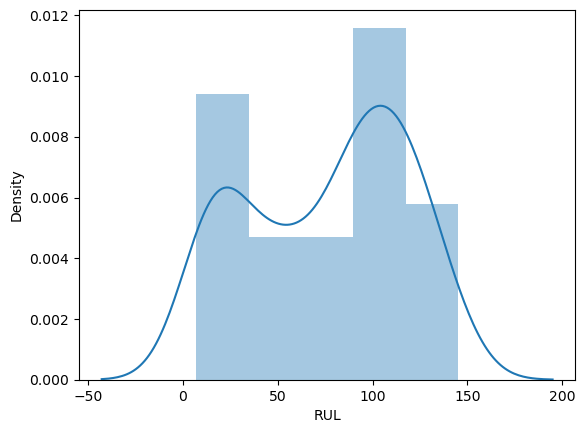

In [32]:
sns.distplot(RUL['RUL'],kde=True)

/Users/jennaanding/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RUL', ylabel='Density'>

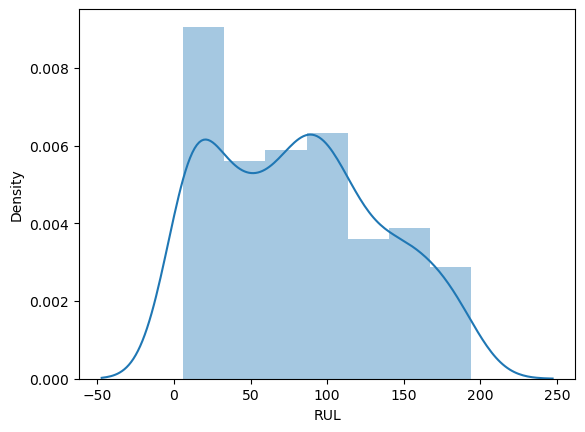

In [33]:
sns.distplot(RUL1['RUL'],kde=True)

/Users/jennaanding/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RUL', ylabel='Density'>

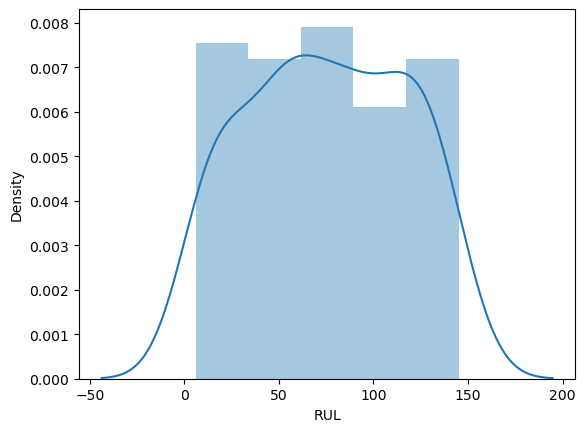

In [34]:
sns.distplot(RUL2['RUL'],kde=True)

/Users/jennaanding/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RUL', ylabel='Density'>

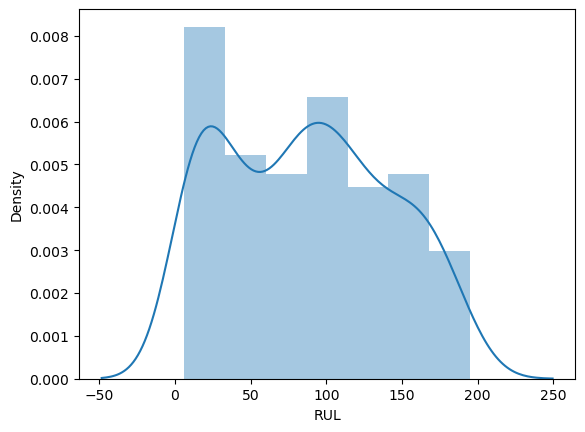

In [35]:
sns.distplot(RUL3['RUL'],kde=True)

In [36]:
RUL['RUL'].describe()

count   100.000
mean     75.520
std      41.765
min       7.000
25%      32.750
50%      86.000
75%     112.250
max     145.000
Name: RUL, dtype: float64

In [37]:
RUL1['RUL'].describe()

count   259.000
mean     81.185
std      53.883
min       6.000
25%      35.000
50%      80.000
75%     121.000
max     194.000
Name: RUL, dtype: float64

In [38]:
RUL2['RUL'].describe()

count   100.000
mean     75.320
std      41.604
min       6.000
25%      43.250
50%      77.500
75%     115.000
max     145.000
Name: RUL, dtype: float64

In [39]:
RUL3['RUL'].describe()

count   248.000
mean     86.552
std      54.634
min       6.000
25%      36.000
50%      88.000
75%     126.750
max     195.000
Name: RUL, dtype: float64

In [40]:
#checking for outliers in the data
train.describe().T

count     mean    std      min      25%      50%  \
UnitNumber          20631.000   51.507 29.228    1.000   26.000   52.000   
Cycle               20631.000  108.808 68.881    1.000   52.000  104.000   
OperationalSetting1 20631.000   -0.000  0.002   -0.009   -0.002    0.000   
OperationalSetting2 20631.000    0.000  0.000   -0.001   -0.000    0.000   
OperationalSetting3 20631.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement1  20631.000  518.670  0.000  518.670  518.670  518.670   
SensorMeasurement2  20631.000  642.681  0.500  641.210  642.325  642.640   
SensorMeasurement3  20631.000 1590.523  6.131 1571.040 1586.260 1590.100   
SensorMeasurement4  20631.000 1408.934  9.001 1382.250 1402.360 1408.040   
SensorMeasurement5  20631.000   14.620  0.000   14.620   14.620   14.620   
SensorMeasurement6  20631.000   21.610  0.001   21.600   21.610   21.610   
SensorMeasurement7  20631.000  553.368  0.885  549.850  552.810  553.440   
SensorMeasurement8  20631.000 2388.097  0.071 2387.900 2388.050 2388.090   
SensorMeasurement9  20631.000 9065.243 22.083 9021.730 9053.100 9060.660   
SensorMeasurement10 20631.000    1.300  0.000    1.300    1.300    1.300   
SensorMeasurement11 20631.000   47.541  0.267   46.850   47.350   47.510   
SensorMeasurement12 20631.000  521.413  0.738  518.690  520.960  521.480   
SensorMeasurement13 20631.000 2388.096  0.072 2387.880 2388.040 2388.090   
SensorMeasurement14 20631.000 8143.753 19.076 8099.940 8133.245 8140.540   
SensorMeasurement15 20631.000    8.442  0.038    8.325    8.415    8.439   
SensorMeasurement16 20631.000    0.030  0.000    0.030    0.030    0.030   
SensorMeasurement17 20631.000  393.211  1.549  388.000  392.000  393.000   
SensorMeasurement18 20631.000 2388.000  0.000 2388.000 2388.000 2388.000   
SensorMeasurement19 20631.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement20 20631.000   38.816  0.181   38.140   38.700   38.830   
SensorMeasurement21 20631.000   23.290  0.108   22.894   23.222   23.298   

                         75%      max  
UnitNumber            77.000  100.000  
Cycle                156.000  362.000  
OperationalSetting1    0.002    0.009  
OperationalSetting2    0.000    0.001  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   518.670  518.670  
SensorMeasurement2   643.000  644.530  
SensorMeasurement3  1594.380 1616.910  
SensorMeasurement4  1414.555 1441.490  
SensorMeasurement5    14.620   14.620  
SensorMeasurement6    21.610   21.610  
SensorMeasurement7   554.010  556.060  
SensorMeasurement8  2388.140 2388.560  
SensorMeasurement9  9069.420 9244.590  
SensorMeasurement10    1.300    1.300  
SensorMeasurement11   47.700   48.530  
SensorMeasurement12  521.950  523.380  
SensorMeasurement13 2388.140 2388.560  
SensorMeasurement14 8148.310 8293.720  
SensorMeasurement15    8.466    8.585  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  394.000  400.000  
SensorMeasurement18 2388.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   38.950   39.430  
SensorMeasurement21   23.367   23.618

In [41]:
train1.describe().T

count     mean     std      min      25%      50%  \
UnitNumber          53759.000  131.083  74.464    1.000   68.000  131.000   
Cycle               53759.000  109.155  69.181    1.000   52.000  104.000   
OperationalSetting1 53759.000   23.998  14.747    0.000   10.005   25.001   
OperationalSetting2 53759.000    0.572   0.310    0.000    0.251    0.700   
OperationalSetting3 53759.000   94.046  14.238   60.000  100.000  100.000   
SensorMeasurement1  53759.000  472.910  26.390  445.000  445.000  462.540   
SensorMeasurement2  53759.000  579.672  37.289  535.530  549.570  555.980   
SensorMeasurement3  53759.000 1419.971 105.946 1243.730 1352.760 1369.180   
SensorMeasurement4  53759.000 1205.442 119.123 1023.770 1123.655 1138.890   
SensorMeasurement5  53759.000    8.032   3.614    3.910    3.910    7.050   
SensorMeasurement6  53759.000   11.601   5.432    5.710    5.720    9.030   
SensorMeasurement7  53759.000  282.607 146.005  136.800  139.935  194.660   
SensorMeasurement8  53759.000 2228.879 145.210 1914.770 2211.880 2223.070   
SensorMeasurement9  53759.000 8525.201 335.812 7985.560 8321.660 8361.200   
SensorMeasurement10 53759.000    1.095   0.127    0.930    1.020    1.020   
SensorMeasurement11 53759.000   42.985   3.232   36.230   41.910   42.390   
SensorMeasurement12 53759.000  266.069 137.660  129.120  131.520  183.200   
SensorMeasurement13 53759.000 2334.557 128.068 2027.610 2387.900 2388.080   
SensorMeasurement14 53759.000 8066.598  84.838 7848.360 8062.140 8082.540   
SensorMeasurement15 53759.000    9.330   0.749    8.336    8.678    9.311   
SensorMeasurement16 53759.000    0.023   0.005    0.020    0.020    0.020   
SensorMeasurement17 53759.000  348.310  27.755  303.000  331.000  335.000   
SensorMeasurement18 53759.000 2228.806 145.328 1915.000 2212.000 2223.000   
SensorMeasurement19 53759.000   97.757   5.364   84.930  100.000  100.000   
SensorMeasurement20 53759.000   20.789   9.869   10.180   10.910   14.880   
SensorMeasurement21 53759.000   12.473   5.922    6.011    6.546    8.929   

                         75%      max  
UnitNumber           195.000  260.000  
Cycle                157.000  378.000  
OperationalSetting1   41.998   42.008  
OperationalSetting2    0.840    0.842  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   491.190  518.670  
SensorMeasurement2   607.340  644.520  
SensorMeasurement3  1499.370 1612.880  
SensorMeasurement4  1306.850 1439.230  
SensorMeasurement5    10.520   14.620  
SensorMeasurement6    15.490   21.610  
SensorMeasurement7   394.080  555.820  
SensorMeasurement8  2323.960 2388.390  
SensorMeasurement9  8778.030 9215.660  
SensorMeasurement10    1.260    1.300  
SensorMeasurement11   45.350   48.510  
SensorMeasurement12  371.260  523.370  
SensorMeasurement13 2388.170 2390.480  
SensorMeasurement14 8127.195 8268.500  
SensorMeasurement15    9.387   11.067  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  369.000  399.000  
SensorMeasurement18 2324.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   28.470   39.340  
SensorMeasurement21   17.083   23.590

In [42]:
train2.describe().T

count     mean    std      min      25%      50%  \
UnitNumber          24720.000   48.632 29.349    1.000   23.000   47.000   
Cycle               24720.000  139.077 98.847    1.000   62.000  124.000   
OperationalSetting1 24720.000   -0.000  0.002   -0.009   -0.002    0.000   
OperationalSetting2 24720.000    0.000  0.000   -0.001   -0.000   -0.000   
OperationalSetting3 24720.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement1  24720.000  518.670  0.000  518.670  518.670  518.670   
SensorMeasurement2  24720.000  642.458  0.523  640.840  642.080  642.400   
SensorMeasurement3  24720.000 1588.079  6.810 1564.300 1583.280 1587.520   
SensorMeasurement4  24720.000 1404.471  9.773 1377.060 1397.188 1402.910   
SensorMeasurement5  24720.000   14.620  0.000   14.620   14.620   14.620   
SensorMeasurement6  24720.000   21.596  0.018   21.450   21.580   21.600   
SensorMeasurement7  24720.000  555.144  3.437  549.610  553.110  554.050   
SensorMeasurement8  24720.000 2388.072  0.158 2386.900 2388.000 2388.070   
SensorMeasurement9  24720.000 9064.111 19.980 9017.980 9051.920 9060.010   
SensorMeasurement10 24720.000    1.301  0.003    1.290    1.300    1.300   
SensorMeasurement11 24720.000   47.416  0.300   46.690   47.190   47.360   
SensorMeasurement12 24720.000  523.051  3.255  517.770  521.150  521.980   
SensorMeasurement13 24720.000 2388.072  0.158 2386.930 2388.010 2388.070   
SensorMeasurement14 24720.000 8144.203 16.504 8099.680 8134.510 8141.200   
SensorMeasurement15 24720.000    8.396  0.061    8.156    8.361    8.398   
SensorMeasurement16 24720.000    0.030  0.000    0.030    0.030    0.030   
SensorMeasurement17 24720.000  392.567  1.761  388.000  391.000  392.000   
SensorMeasurement18 24720.000 2388.000  0.000 2388.000 2388.000 2388.000   
SensorMeasurement19 24720.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement20 24720.000   38.989  0.249   38.170   38.830   38.990   
SensorMeasurement21 24720.000   23.393  0.149   22.873   23.296   23.392   

                         75%      max  
UnitNumber            74.000  100.000  
Cycle                191.000  525.000  
OperationalSetting1    0.002    0.009  
OperationalSetting2    0.000    0.001  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   518.670  518.670  
SensorMeasurement2   642.790  645.110  
SensorMeasurement3  1592.413 1615.390  
SensorMeasurement4  1410.600 1441.160  
SensorMeasurement5    14.620   14.620  
SensorMeasurement6    21.610   21.610  
SensorMeasurement7   556.040  570.490  
SensorMeasurement8  2388.140 2388.600  
SensorMeasurement9  9070.093 9234.350  
SensorMeasurement10    1.300    1.320  
SensorMeasurement11   47.600   48.440  
SensorMeasurement12  523.840  537.400  
SensorMeasurement13 2388.140 2388.610  
SensorMeasurement14 8149.230 8290.550  
SensorMeasurement15    8.437    8.570  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  394.000  399.000  
SensorMeasurement18 2388.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   39.140   39.850  
SensorMeasurement21   23.483   23.951

In [43]:
train3.describe().T

count     mean     std      min      25%      50%  \
UnitNumber          61249.000  124.325  71.995    1.000   60.000  126.000   
Cycle               61249.000  134.311  89.783    1.000   62.000  123.000   
OperationalSetting1 61249.000   24.000  14.781    0.000   10.005   25.001   
OperationalSetting2 61249.000    0.571   0.311    0.000    0.251    0.700   
OperationalSetting3 61249.000   94.032  14.252   60.000  100.000  100.000   
SensorMeasurement1  61249.000  472.882  26.437  445.000  445.000  462.540   
SensorMeasurement2  61249.000  579.420  37.343  535.480  549.330  555.740   
SensorMeasurement3  61249.000 1417.897 106.168 1242.670 1350.550 1367.680   
SensorMeasurement4  61249.000 1201.915 119.328 1024.420 1119.490 1136.920   
SensorMeasurement5  61249.000    8.032   3.623    3.910    3.910    7.050   
SensorMeasurement6  61249.000   11.589   5.444    5.670    5.720    9.030   
SensorMeasurement7  61249.000  283.329 146.880  136.170  142.920  194.960   
SensorMeasurement8  61249.000 2228.686 145.348 1914.720 2211.950 2223.070   
SensorMeasurement9  61249.000 8524.673 336.928 7984.510 8320.590 8362.760   
SensorMeasurement10 61249.000    1.096   0.128    0.930    1.020    1.030   
SensorMeasurement11 61249.000   42.875   3.243   36.040   41.760   42.330   
SensorMeasurement12 61249.000  266.736 138.479  128.310  134.520  183.450   
SensorMeasurement13 61249.000 2334.428 128.198 2027.570 2387.910 2388.060   
SensorMeasurement14 61249.000 8067.812  85.671 7845.780 8062.630 8083.810   
SensorMeasurement15 61249.000    9.286   0.750    8.176    8.648    9.256   
SensorMeasurement16 61249.000    0.023   0.005    0.020    0.020    0.020   
SensorMeasurement17 61249.000  347.760  27.808  302.000  330.000  334.000   
SensorMeasurement18 61249.000 2228.613 145.472 1915.000 2212.000 2223.000   
SensorMeasurement19 61249.000   97.751   5.369   84.930  100.000  100.000   
SensorMeasurement20 61249.000   20.864   9.936   10.160   10.940   14.930   
SensorMeasurement21 61249.000   12.519   5.963    6.084    6.566    8.960   

                         75%      max  
UnitNumber           185.000  249.000  
Cycle                191.000  543.000  
OperationalSetting1   41.998   42.008  
OperationalSetting2    0.840    0.842  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   491.190  518.670  
SensorMeasurement2   607.070  644.420  
SensorMeasurement3  1497.420 1613.000  
SensorMeasurement4  1302.620 1440.770  
SensorMeasurement5    10.520   14.620  
SensorMeasurement6    15.480   21.610  
SensorMeasurement7   394.280  570.810  
SensorMeasurement8  2323.930 2388.640  
SensorMeasurement9  8777.250 9196.810  
SensorMeasurement10    1.260    1.320  
SensorMeasurement11   45.220   48.360  
SensorMeasurement12  371.400  537.490  
SensorMeasurement13 2388.170 2390.490  
SensorMeasurement14 8128.350 8261.650  
SensorMeasurement15    9.366   11.066  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  368.000  399.000  
SensorMeasurement18 2324.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   28.560   39.890  
SensorMeasurement21   17.136   23.885

In [44]:
test.describe().T

count     mean    std      min      25%      50%  \
UnitNumber          13096.000   51.544 28.289    1.000   28.000   52.000   
Cycle               13096.000   76.837 53.058    1.000   33.000   69.000   
OperationalSetting1 13096.000   -0.000  0.002   -0.008   -0.002    0.000   
OperationalSetting2 13096.000    0.000  0.000   -0.001   -0.000    0.000   
OperationalSetting3 13096.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement1  13096.000  518.670  0.000  518.670  518.670  518.670   
SensorMeasurement2  13096.000  642.475  0.401  641.130  642.197  642.460   
SensorMeasurement3  13096.000 1588.099  5.003 1569.040 1584.600 1587.990   
SensorMeasurement4  13096.000 1404.735  6.688 1384.390 1399.950 1404.440   
SensorMeasurement5  13096.000   14.620  0.000   14.620   14.620   14.620   
SensorMeasurement6  13096.000   21.610  0.002   21.600   21.610   21.610   
SensorMeasurement7  13096.000  553.758  0.681  550.880  553.310  553.800   
SensorMeasurement8  13096.000 2388.071  0.057 2387.890 2388.030 2388.070   
SensorMeasurement9  13096.000 9058.407 11.436 9024.530 9051.020 9057.320   
SensorMeasurement10 13096.000    1.300  0.000    1.300    1.300    1.300   
SensorMeasurement11 13096.000   47.416  0.196   46.800   47.270   47.410   
SensorMeasurement12 13096.000  521.748  0.560  519.380  521.380  521.780   
SensorMeasurement13 13096.000 2388.071  0.057 2387.890 2388.030 2388.070   
SensorMeasurement14 13096.000 8138.948 10.189 8108.500 8132.310 8138.390   
SensorMeasurement15 13096.000    8.426  0.029    8.333    8.406    8.425   
SensorMeasurement16 13096.000    0.030  0.000    0.030    0.030    0.030   
SensorMeasurement17 13096.000  392.572  1.234  389.000  392.000  393.000   
SensorMeasurement18 13096.000 2388.000  0.000 2388.000 2388.000 2388.000   
SensorMeasurement19 13096.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement20 13096.000   38.893  0.142   38.310   38.800   38.900   
SensorMeasurement21 13096.000   23.336  0.084   22.935   23.282   23.339   

                         75%      max  
UnitNumber            76.000  100.000  
Cycle                113.000  303.000  
OperationalSetting1    0.002    0.008  
OperationalSetting2    0.000    0.001  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   518.670  518.670  
SensorMeasurement2   642.740  644.300  
SensorMeasurement3  1591.362 1607.550  
SensorMeasurement4  1409.050 1433.360  
SensorMeasurement5    14.620   14.620  
SensorMeasurement6    21.610   21.610  
SensorMeasurement7   554.240  555.840  
SensorMeasurement8  2388.110 2388.300  
SensorMeasurement9  9064.110 9155.030  
SensorMeasurement10    1.300    1.300  
SensorMeasurement11   47.540   48.260  
SensorMeasurement12  522.150  523.760  
SensorMeasurement13 2388.110 2388.320  
SensorMeasurement14 8144.360 8220.480  
SensorMeasurement15    8.444    8.541  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  393.000  397.000  
SensorMeasurement18 2388.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   38.990   39.410  
SensorMeasurement21   23.394   23.642

In [45]:
train.drop(['SensorMeasurement1', 'SensorMeasurement5', 'SensorMeasurement10', 'SensorMeasurement16', 'SensorMeasurement18', 'SensorMeasurement19', 'OperationalSetting3'], axis=1, inplace=True)
test.drop(['SensorMeasurement1', 'SensorMeasurement5', 'SensorMeasurement10', 'SensorMeasurement16', 'SensorMeasurement18', 'SensorMeasurement19', 'OperationalSetting3'], axis=1, inplace=True)



In [46]:
test1.describe().T

count     mean     std      min      25%      50%  \
UnitNumber          33991.000  127.528  74.145    1.000   65.000  128.000   
Cycle               33991.000   81.224  58.893    1.000   34.000   70.000   
OperationalSetting1 33991.000   23.975  14.779    0.000   10.005   25.001   
OperationalSetting2 33991.000    0.571   0.311    0.000    0.251    0.700   
OperationalSetting3 33991.000   94.067  14.217   60.000  100.000  100.000   
SensorMeasurement1  33991.000  472.930  26.455  445.000  449.440  462.540   
SensorMeasurement2  33991.000  579.592  37.339  535.410  549.480  555.830   
SensorMeasurement3  33991.000 1418.562 105.979 1245.160 1351.640 1367.370   
SensorMeasurement4  33991.000 1203.087 119.039 1030.090 1122.520 1134.160   
SensorMeasurement5  33991.000    8.039   3.624    3.910    5.480    7.050   
SensorMeasurement6  33991.000   11.611   5.447    5.710    8.000    9.030   
SensorMeasurement7  33991.000  283.078 146.487  137.020  174.335  194.740   
SensorMeasurement8  33991.000 2229.055 145.126 1914.900 2211.870 2223.030   
SensorMeasurement9  33991.000 8521.509 335.796 7987.740 8320.120 8355.510   
SensorMeasurement10 33991.000    1.095   0.128    0.930    1.020    1.020   
SensorMeasurement11 33991.000   42.910   3.228   36.180   41.870   42.240   
SensorMeasurement12 33991.000  266.499 138.105  129.310  163.775  183.260   
SensorMeasurement13 33991.000 2334.697 127.888 2027.790 2387.890 2388.060   
SensorMeasurement14 33991.000 8063.639  83.829 7851.310 8061.375 8080.280   
SensorMeasurement15 33991.000    9.315   0.748    8.330    8.664    9.303   
SensorMeasurement16 33991.000    0.023   0.005    0.020    0.020    0.020   
SensorMeasurement17 33991.000  347.939  27.759  303.000  330.000  334.000   
SensorMeasurement18 33991.000 2229.025 145.236 1915.000 2212.000 2223.000   
SensorMeasurement19 33991.000   97.765   5.356   84.930  100.000  100.000   
SensorMeasurement20 33991.000   20.839   9.909   10.180   13.990   14.900   
SensorMeasurement21 33991.000   12.504   5.945    6.123    8.407    8.939   

                         75%      max  
UnitNumber           189.000  259.000  
Cycle                119.000  367.000  
OperationalSetting1   35.008   42.008  
OperationalSetting2    0.840    0.842  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   491.190  518.670  
SensorMeasurement2   607.260  644.320  
SensorMeasurement3  1498.300 1609.690  
SensorMeasurement4  1305.455 1434.120  
SensorMeasurement5    10.520   14.620  
SensorMeasurement6    15.490   21.610  
SensorMeasurement7   394.320  555.970  
SensorMeasurement8  2323.940 2388.340  
SensorMeasurement9  8776.290 9179.620  
SensorMeasurement10    1.260    1.300  
SensorMeasurement11   45.310   48.280  
SensorMeasurement12  371.450  523.220  
SensorMeasurement13 2388.130 2389.960  
SensorMeasurement14 8125.840 8243.100  
SensorMeasurement15    9.374   11.030  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  369.000  398.000  
SensorMeasurement18 2324.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   28.520   39.320  
SensorMeasurement21   17.111   23.614

In [47]:
test2.describe().T

count     mean    std      min      25%      50%  \
UnitNumber          16596.000   51.887 29.854    1.000   24.000   52.000   
Cycle               16596.000  106.000 83.287    1.000   42.000   87.000   
OperationalSetting1 16596.000   -0.000  0.002   -0.009   -0.002   -0.000   
OperationalSetting2 16596.000   -0.000  0.000   -0.001   -0.000    0.000   
OperationalSetting3 16596.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement1  16596.000  518.670  0.000  518.670  518.670  518.670   
SensorMeasurement2  16596.000  642.268  0.419  640.910  641.980  642.240   
SensorMeasurement3  16596.000 1585.608  5.539 1565.080 1581.847 1585.460   
SensorMeasurement4  16596.000 1400.568  7.150 1379.380 1395.440 1399.840   
SensorMeasurement5  16596.000   14.620  0.000   14.620   14.620   14.620   
SensorMeasurement6  16596.000   21.594  0.016   21.550   21.580   21.600   
SensorMeasurement7  16596.000  554.555  2.236  549.550  553.350  554.090   
SensorMeasurement8  16596.000 2388.021  0.150 2386.930 2387.980 2388.040   
SensorMeasurement9  16596.000 9056.274 12.002 9023.010 9048.830 9055.070   
SensorMeasurement10 16596.000    1.300  0.002    1.290    1.300    1.300   
SensorMeasurement11 16596.000   47.291  0.217   46.650   47.130   47.260   
SensorMeasurement12 16596.000  522.467  2.113  517.670  521.370  522.010   
SensorMeasurement13 16596.000 2388.021  0.150 2386.940 2387.980 2388.040   
SensorMeasurement14 16596.000 8138.327  9.974 8105.450 8132.310 8137.595   
SensorMeasurement15 16596.000    8.395  0.041    8.198    8.369    8.395   
SensorMeasurement16 16596.000    0.030  0.000    0.030    0.030    0.030   
SensorMeasurement17 16596.000  391.900  1.391  387.000  391.000  392.000   
SensorMeasurement18 16596.000 2388.000  0.000 2388.000 2388.000 2388.000   
SensorMeasurement19 16596.000  100.000  0.000  100.000  100.000  100.000   
SensorMeasurement20 16596.000   38.997  0.175   38.320   38.880   39.000   
SensorMeasurement21 16596.000   23.399  0.105   23.039   23.328   23.398   

                         75%      max  
UnitNumber            78.000  100.000  
Cycle                149.000  475.000  
OperationalSetting1    0.002    0.008  
OperationalSetting2    0.000    0.001  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   518.670  518.670  
SensorMeasurement2   642.550  644.030  
SensorMeasurement3  1589.240 1607.130  
SensorMeasurement4  1405.230 1430.210  
SensorMeasurement5    14.620   14.620  
SensorMeasurement6    21.610   21.610  
SensorMeasurement7   555.190  567.680  
SensorMeasurement8  2388.090 2388.500  
SensorMeasurement9  9061.970 9119.470  
SensorMeasurement10    1.300    1.310  
SensorMeasurement11   47.440   48.250  
SensorMeasurement12  523.000  535.630  
SensorMeasurement13 2388.090 2388.530  
SensorMeasurement14 8143.190 8191.380  
SensorMeasurement15    8.424    8.533  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  393.000  398.000  
SensorMeasurement18 2388.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   39.110   39.750  
SensorMeasurement21   23.465   23.850

In [48]:
test3.describe().T

count     mean     std      min      25%      50%  \
UnitNumber          41214.000  120.006  71.685    1.000   57.000  118.000   
Cycle               41214.000  108.739  83.717    1.000   43.000   91.000   
OperationalSetting1 41214.000   24.115  14.715    0.000   10.005   25.002   
OperationalSetting2 41214.000    0.575   0.309    0.000    0.251    0.700   
OperationalSetting3 41214.000   94.073  14.211   60.000  100.000  100.000   
SensorMeasurement1  41214.000  472.712  26.321  445.000  445.000  462.540   
SensorMeasurement2  41214.000  579.069  37.130  535.420  549.200  555.540   
SensorMeasurement3  41214.000 1414.952 105.423 1240.940 1348.590 1364.630   
SensorMeasurement4  41214.000 1197.321 118.206 1024.900 1116.800 1130.300   
SensorMeasurement5  41214.000    8.003   3.602    3.910    3.910    7.050   
SensorMeasurement6  41214.000   11.545   5.411    5.660    5.720    9.020   
SensorMeasurement7  41214.000  281.946 145.828  136.060  141.213  194.880   
SensorMeasurement8  41214.000 2228.569 144.739 1914.920 2211.950 2223.000   
SensorMeasurement9  41214.000 8517.234 334.456 7987.030 8317.910 8353.760   
SensorMeasurement10 41214.000    1.094   0.127    0.930    1.020    1.030   
SensorMeasurement11 41214.000   42.738   3.214   36.030   41.680   42.120   
SensorMeasurement12 41214.000  265.414 137.477  128.260  132.900  183.370   
SensorMeasurement13 41214.000 2334.733 127.828 2027.740 2387.890 2388.030   
SensorMeasurement14 41214.000 8063.207  84.127 7849.800 8060.970 8079.705   
SensorMeasurement15 41214.000    9.285   0.744    8.204    8.636    9.261   
SensorMeasurement16 41214.000    0.023   0.005    0.020    0.020    0.020   
SensorMeasurement17 41214.000  346.976  27.605  302.000  330.000  334.000   
SensorMeasurement18 41214.000 2228.560 144.869 1915.000 2212.000 2223.000   
SensorMeasurement19 41214.000   97.767   5.354   84.930  100.000  100.000   
SensorMeasurement20 41214.000   20.799   9.880   10.190   10.890   14.930   
SensorMeasurement21 41214.000   12.480   5.929    6.145    6.538    8.959   

                         75%      max  
UnitNumber           181.000  248.000  
Cycle                155.000  486.000  
OperationalSetting1   41.998   42.008  
OperationalSetting2    0.840    0.842  
OperationalSetting3  100.000  100.000  
SensorMeasurement1   491.190  518.670  
SensorMeasurement2   606.910  643.940  
SensorMeasurement3  1494.990 1608.050  
SensorMeasurement4  1299.440 1429.460  
SensorMeasurement5    10.520   14.620  
SensorMeasurement6    15.470   21.610  
SensorMeasurement7   394.320  569.170  
SensorMeasurement8  2323.870 2388.550  
SensorMeasurement9  8774.077 9131.030  
SensorMeasurement10    1.260    1.320  
SensorMeasurement11   45.120   48.230  
SensorMeasurement12  371.430  536.600  
SensorMeasurement13 2388.110 2389.220  
SensorMeasurement14 8125.830 8196.800  
SensorMeasurement15    9.352   11.017  
SensorMeasurement16    0.030    0.030  
SensorMeasurement17  368.000  397.000  
SensorMeasurement18 2324.000 2388.000  
SensorMeasurement19  100.000  100.000  
SensorMeasurement20   28.580   39.710  
SensorMeasurement21   17.148   23.830

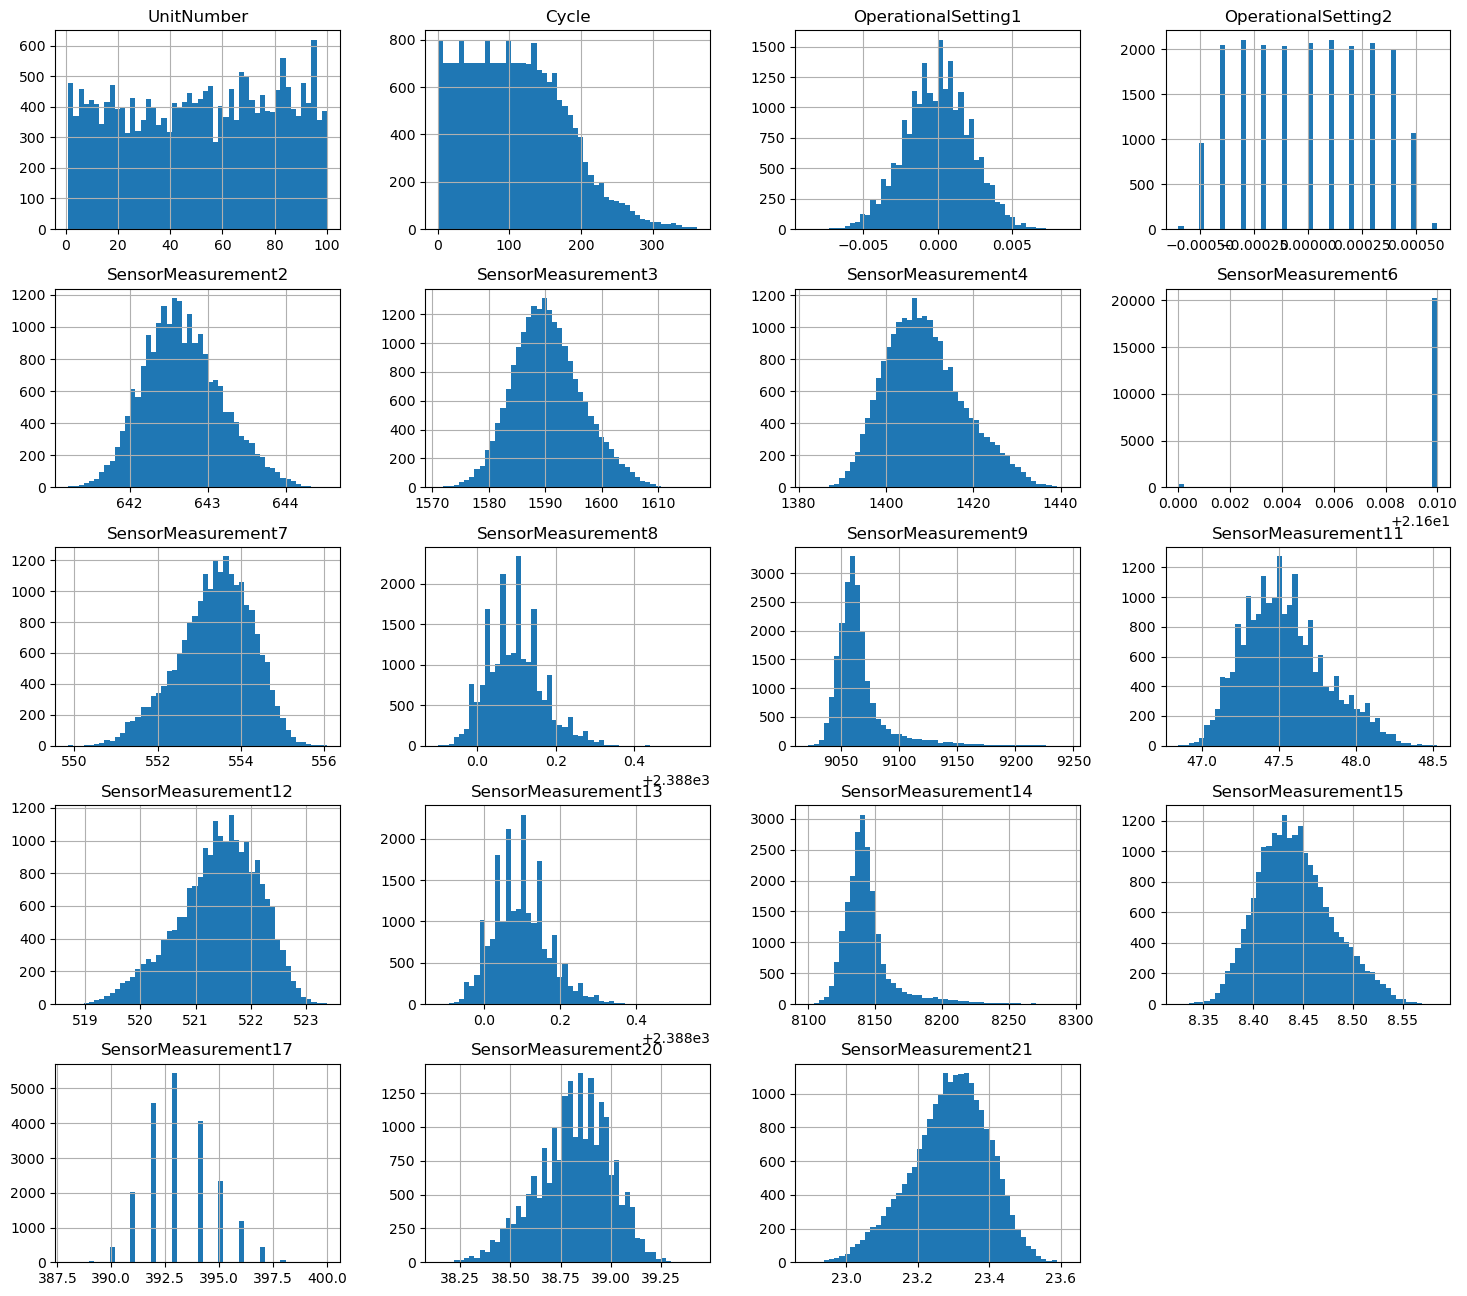

In [49]:
#distribution of columns in the train set
train.hist(bins=50, figsize=(18,16))
plt.show()

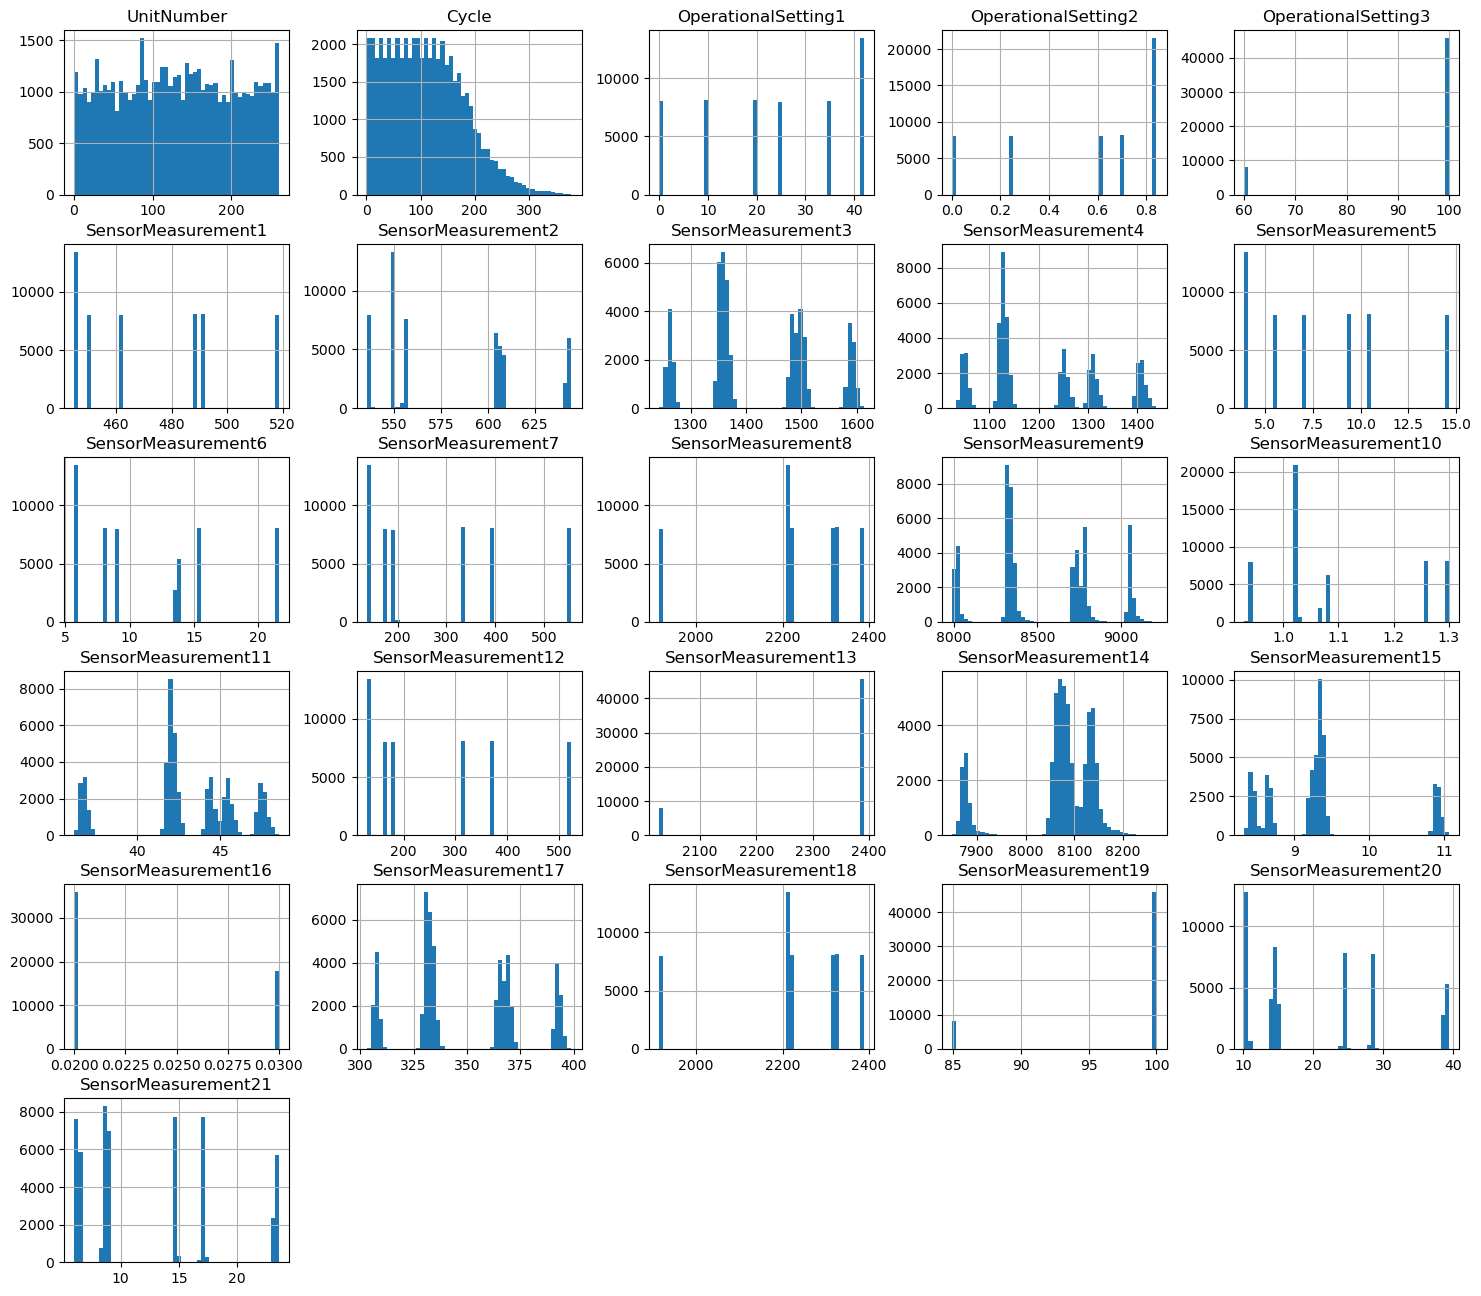

In [50]:
#distribution of columns in the train set
train1.hist(bins=50, figsize=(18,16))
plt.show()

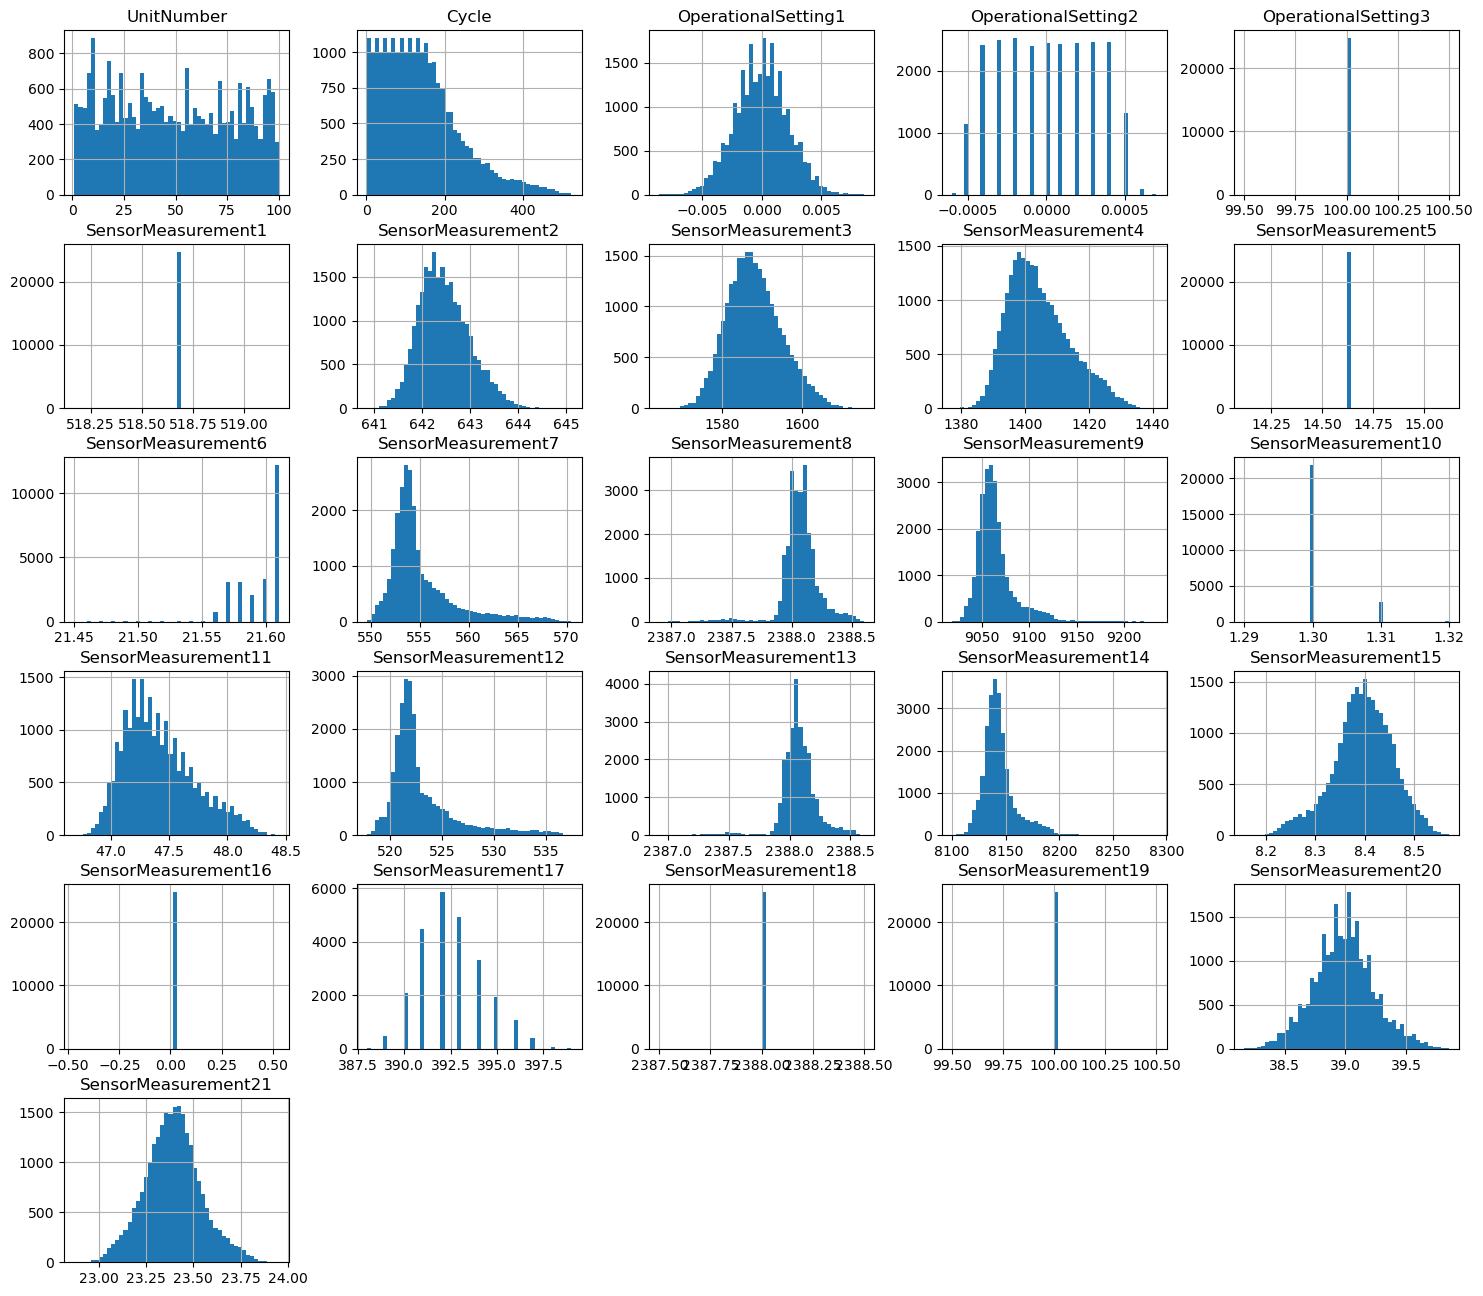

In [51]:
#distribution of columns in the train set
train2.hist(bins=50, figsize=(18,16))
plt.show()

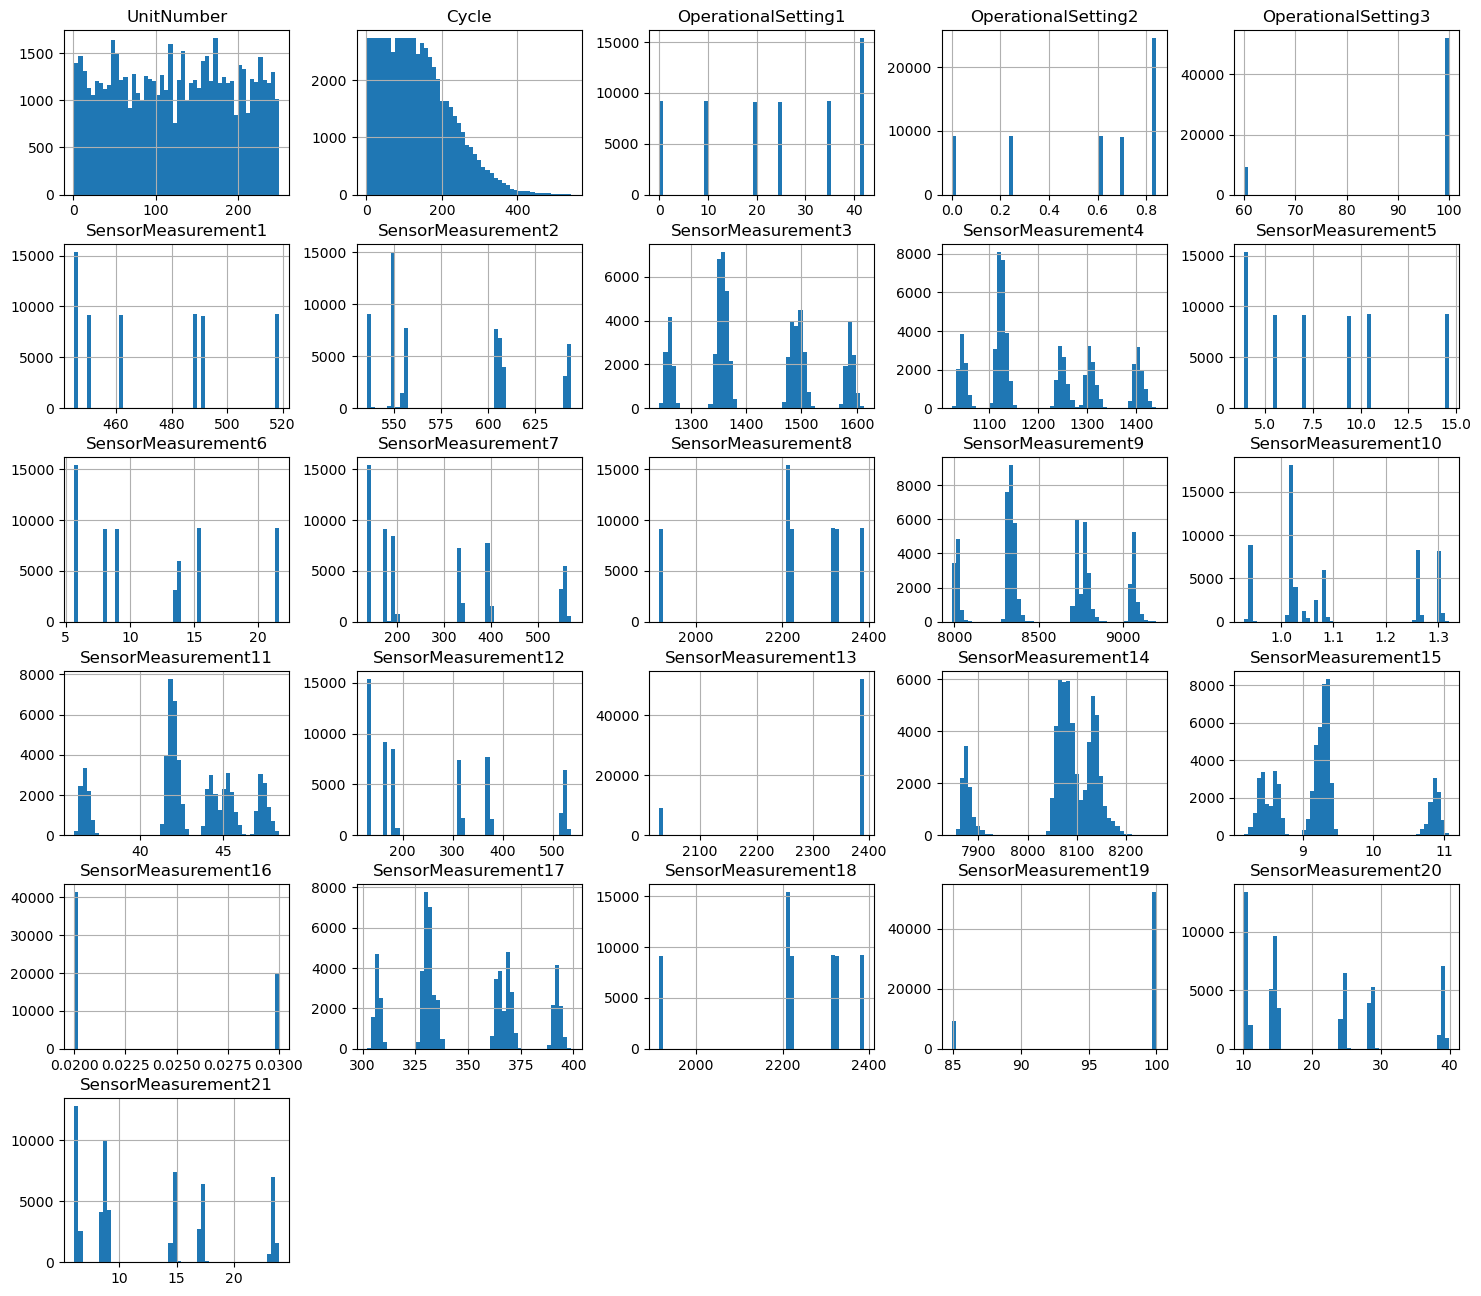

In [52]:
#distribution of columns in the train set
train3.hist(bins=50, figsize=(18,16))
plt.show()

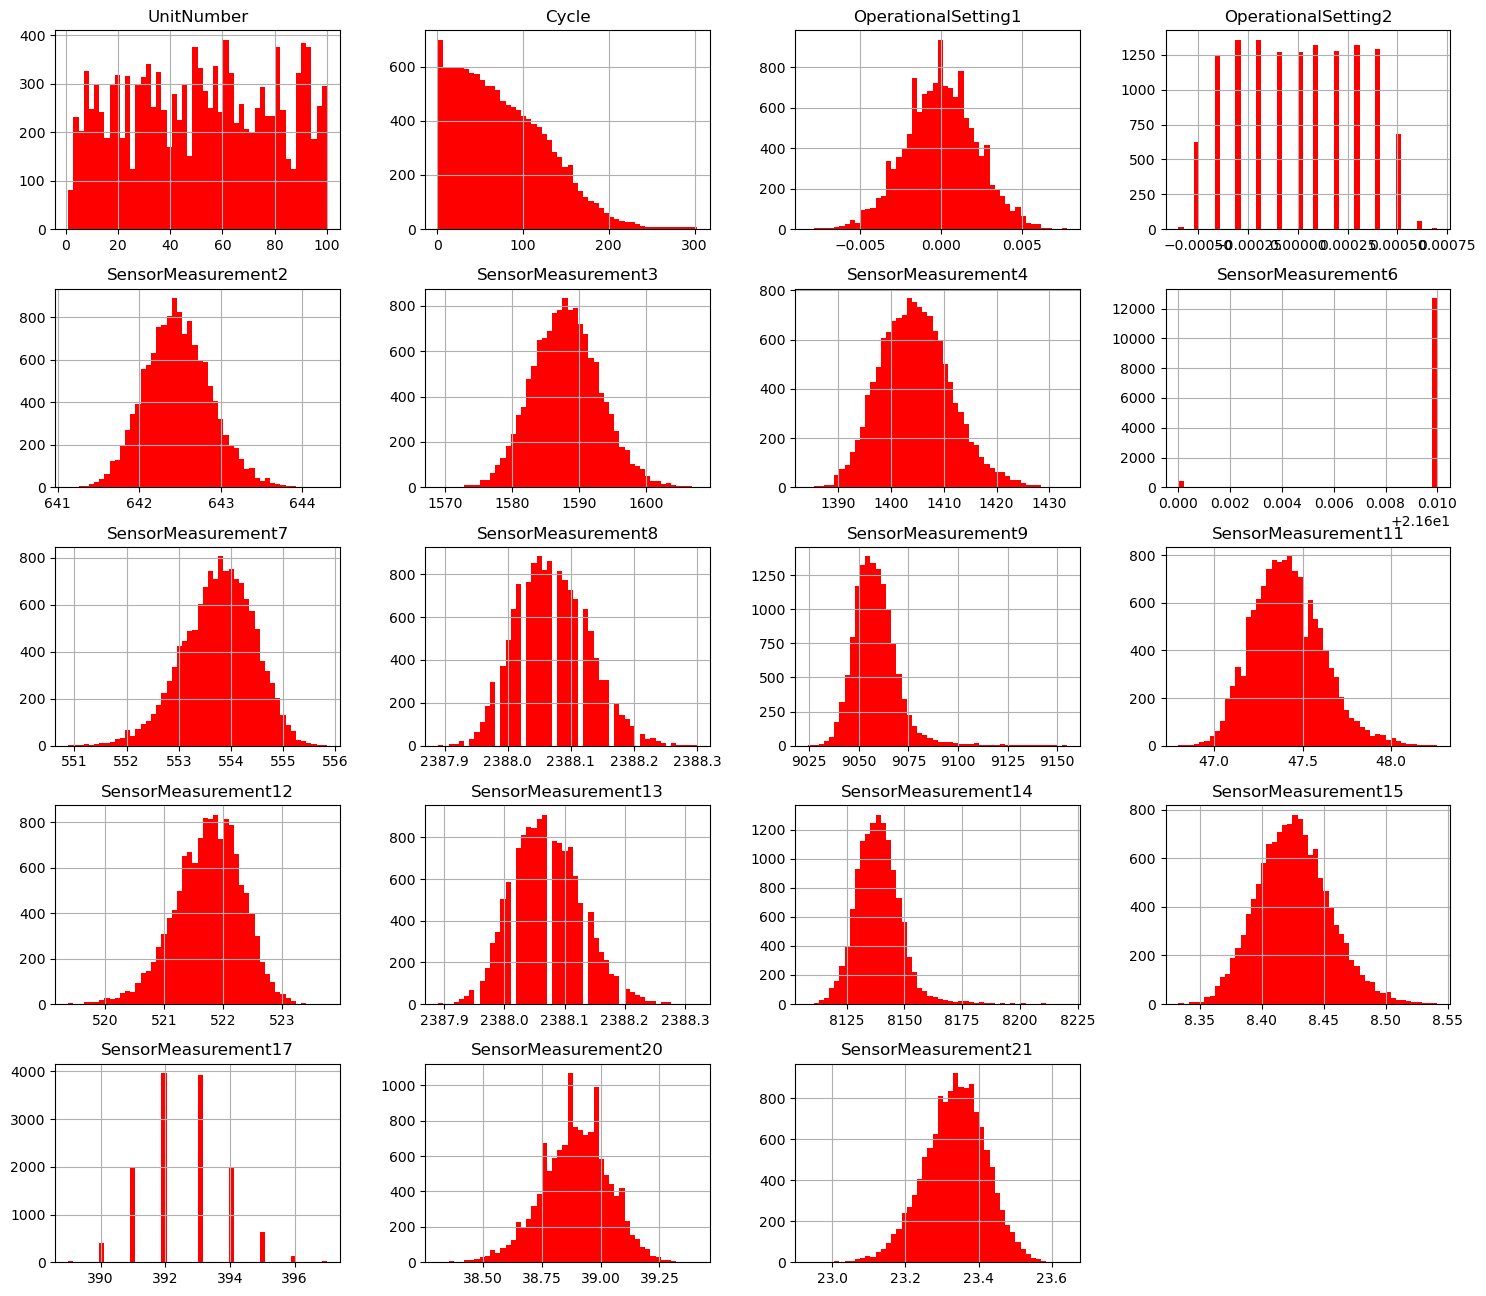

In [53]:
#now looking at the distribution in the test set
test.hist(bins=50, figsize=(18,16), color="red")
plt.show()

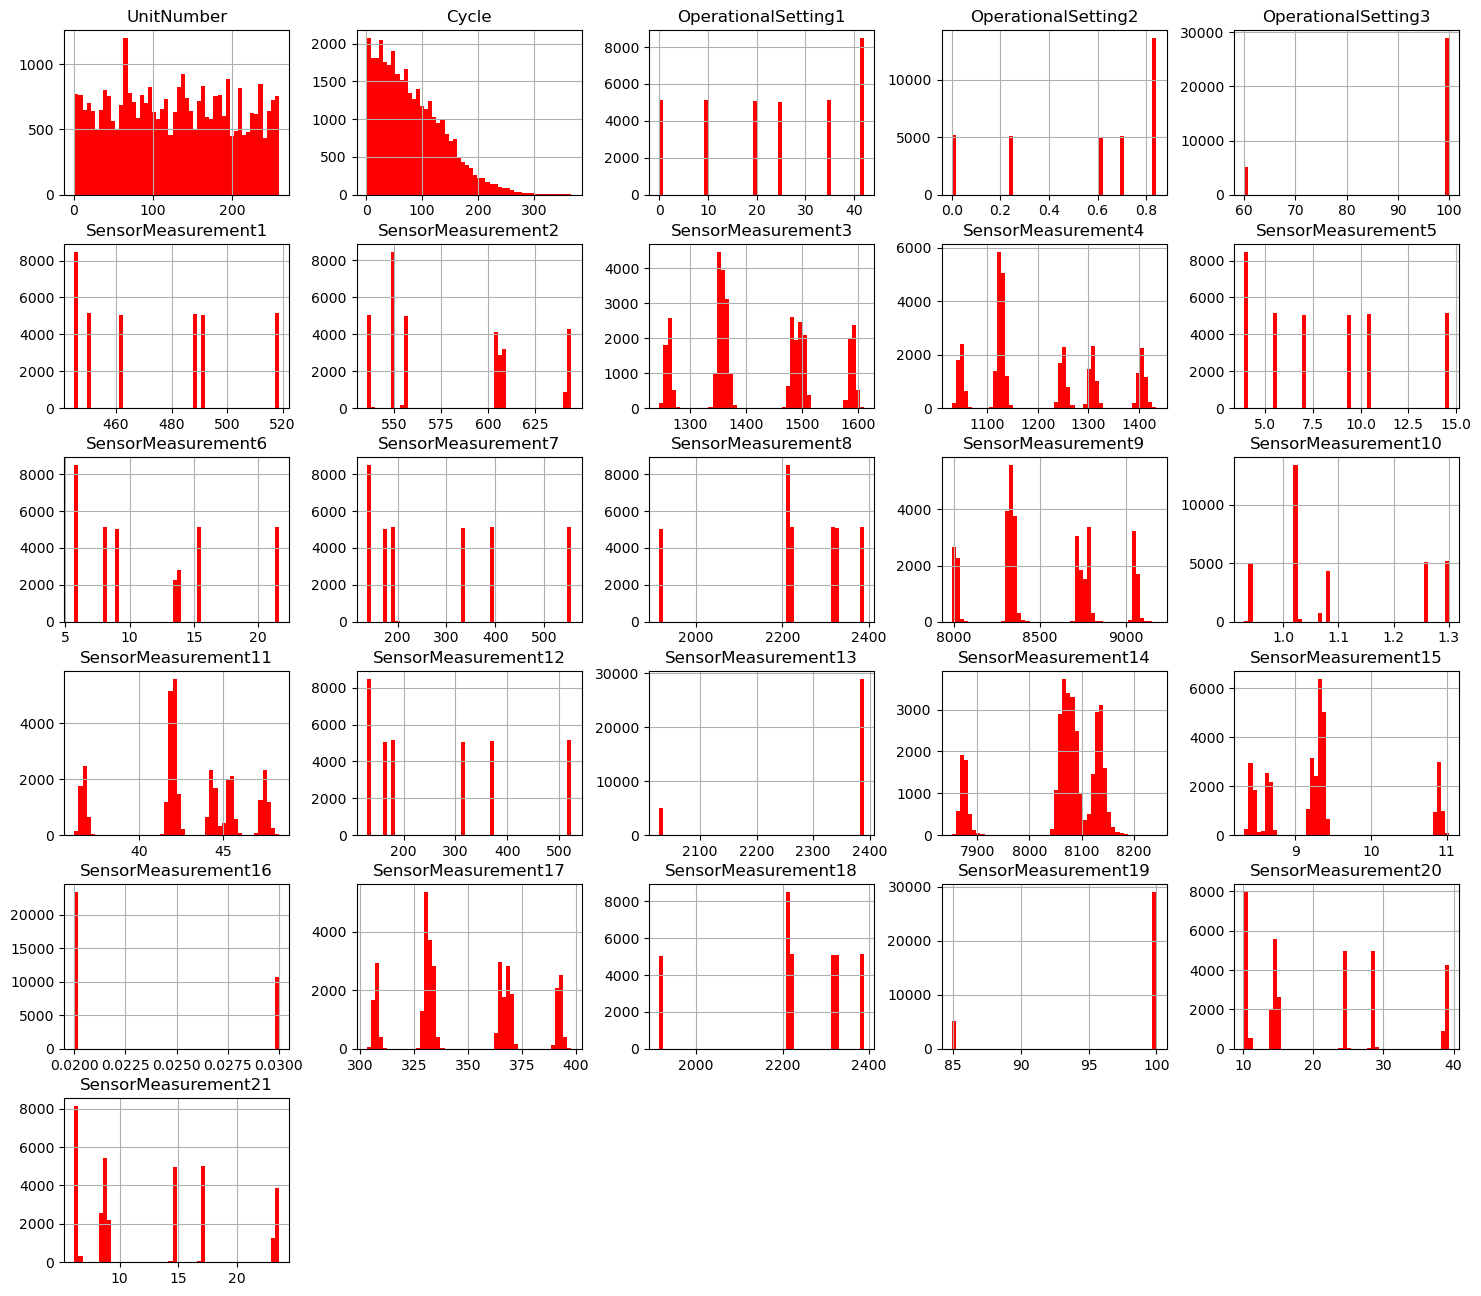

In [54]:
test1.hist(bins=50, figsize=(18,16), color="red")
plt.show()

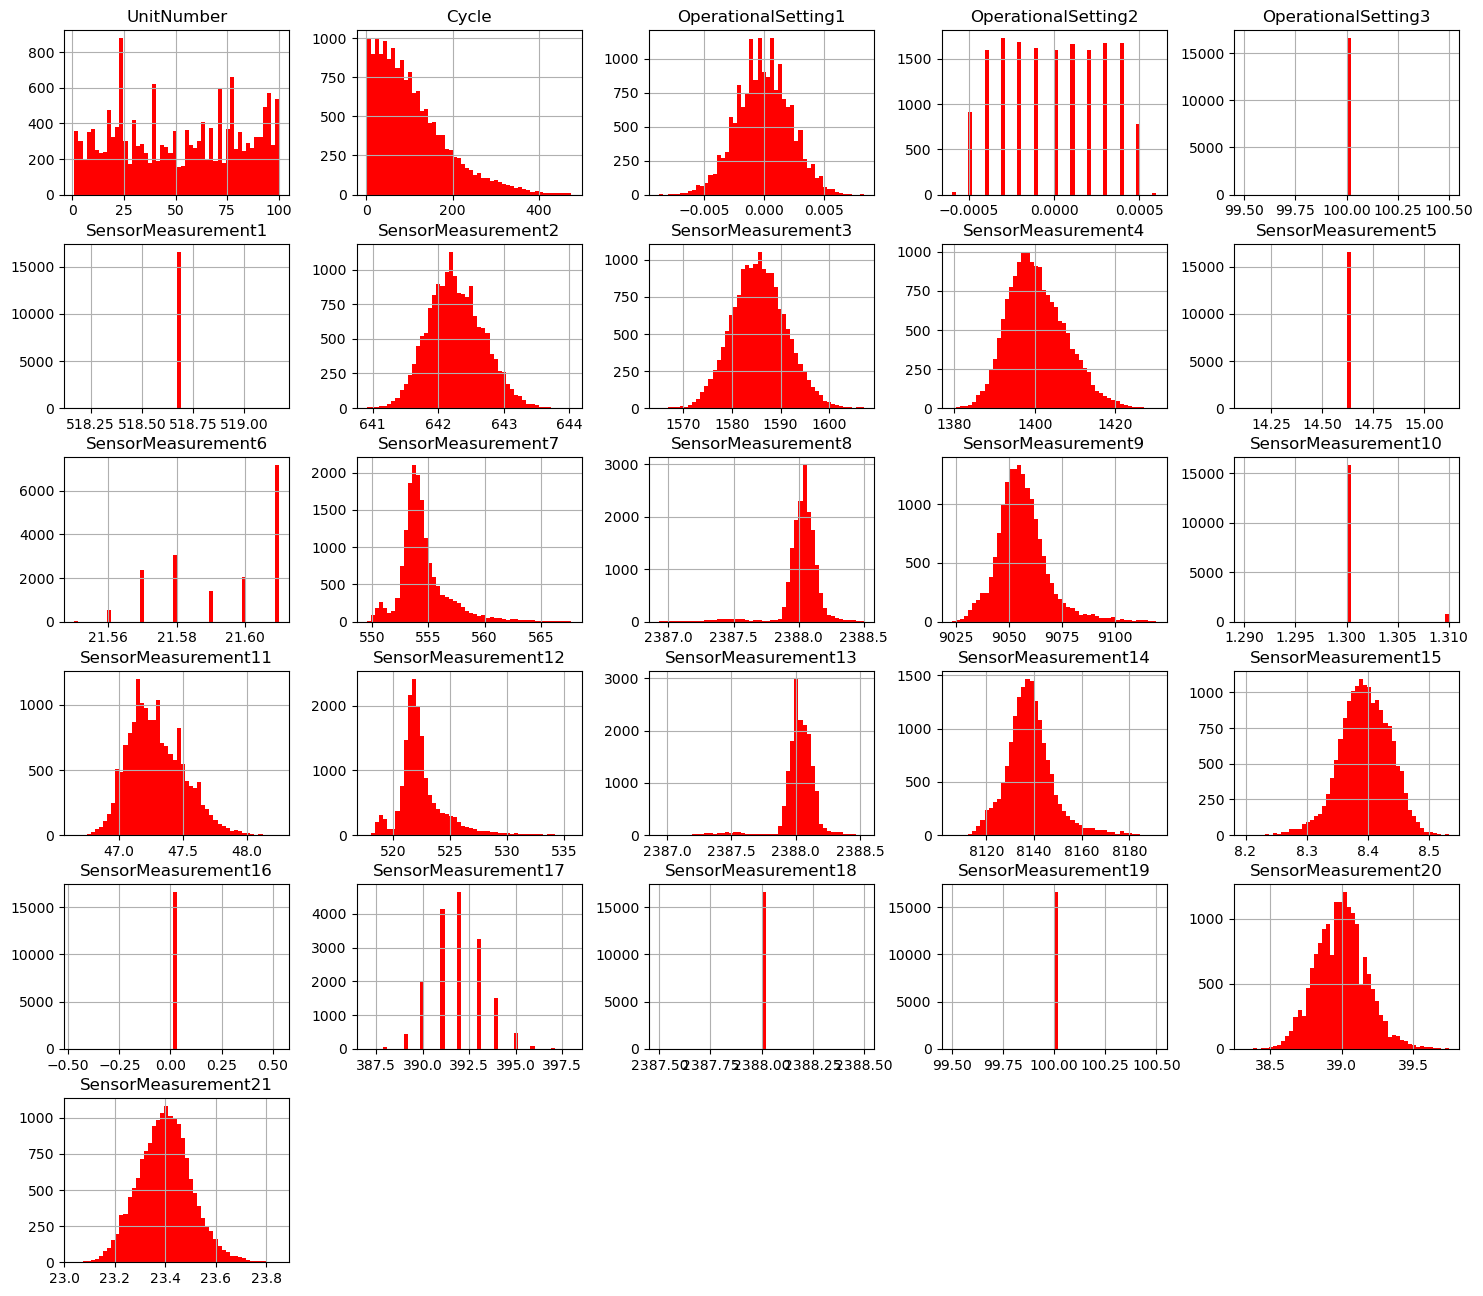

In [55]:
test2.hist(bins=50, figsize=(18,16), color="red")
plt.show()

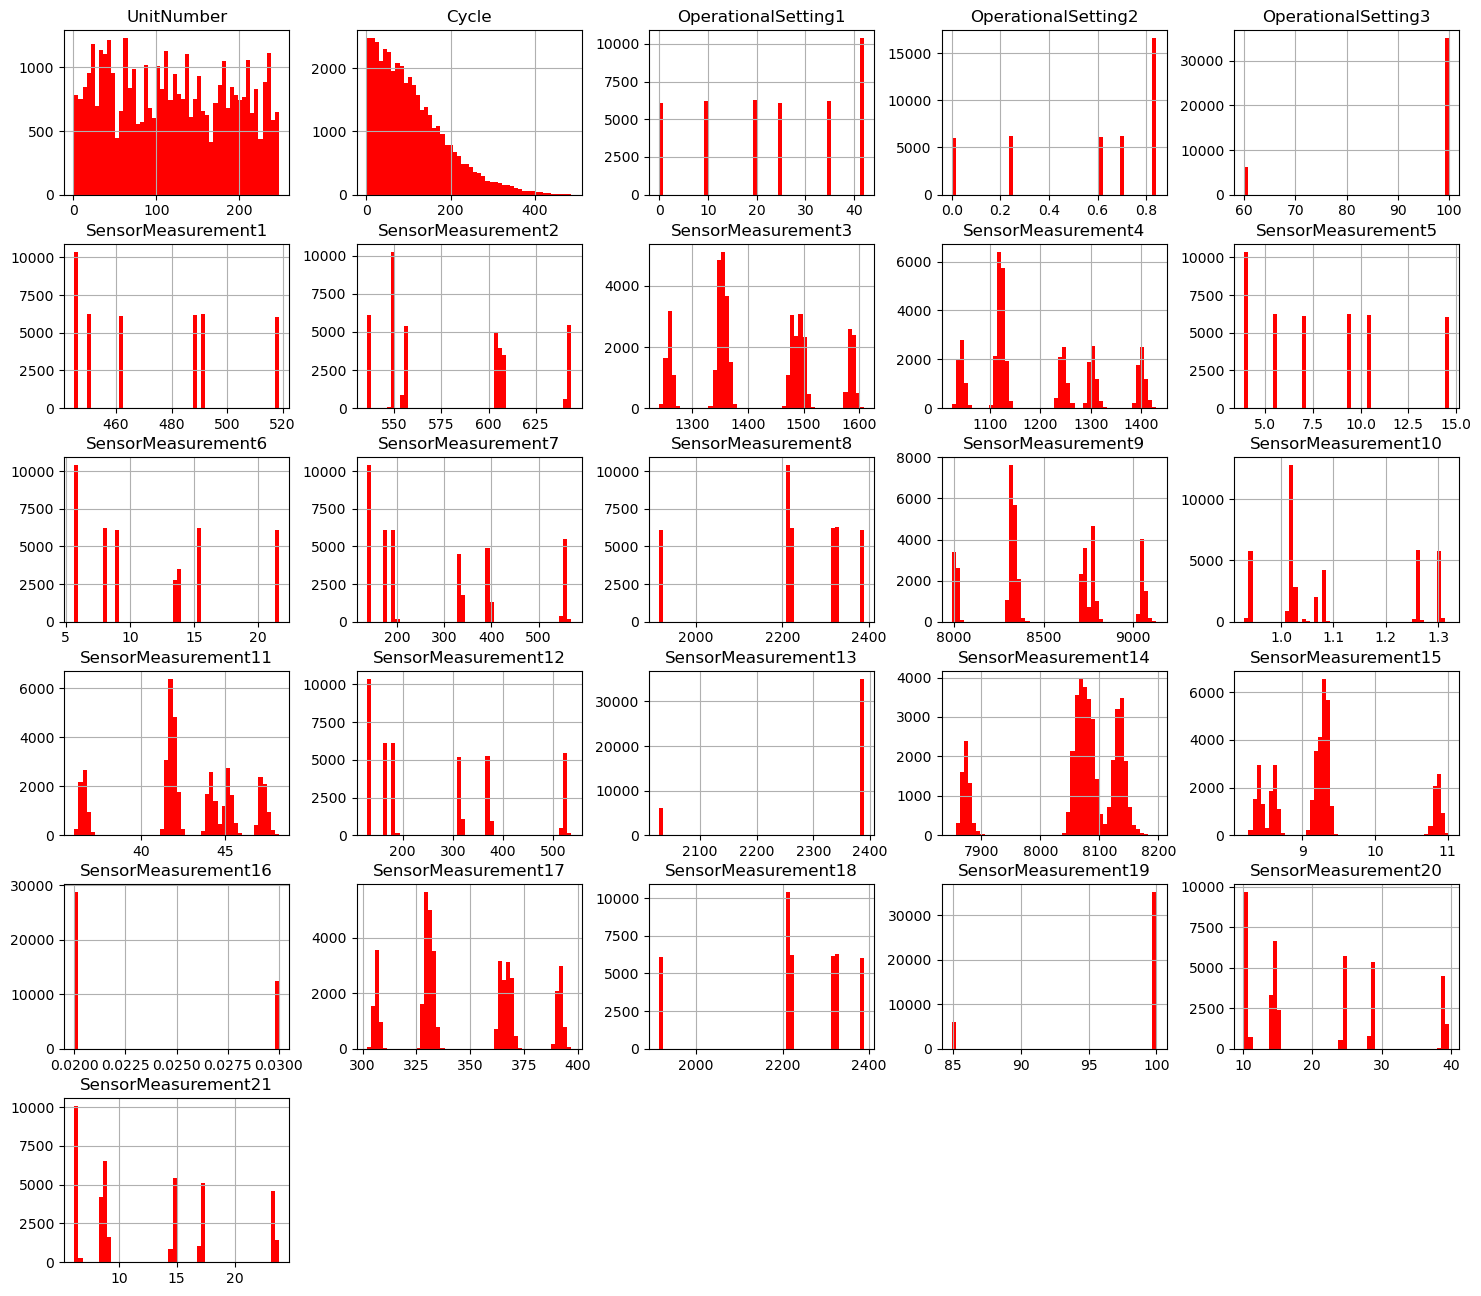

In [56]:
test3.hist(bins=50, figsize=(18,16), color="red")
plt.show()

In [57]:
# looking to see if all values are the same in the training SensorMeasurement3
test['SensorMeasurement3'].value_counts(normalize=True)

# all values are not the same

1588.400   0.002
1588.590   0.001
1587.080   0.001
1591.250   0.001
1589.540   0.001
            ... 
1602.950   0.000
1598.260   0.000
1603.710   0.000
1578.800   0.000
1601.620   0.000
Name: SensorMeasurement3, Length: 2361, dtype: float64

In [58]:
# looking to see if all values are the same in the training SensorMeasurement4
test['SensorMeasurement4'].value_counts(normalize=True)

# all values are not the same

1402.530   0.001
1404.090   0.001
1404.770   0.001
1407.600   0.001
1403.100   0.001
            ... 
1418.510   0.000
1420.630   0.000
1420.160   0.000
1421.300   0.000
1424.990   0.000
Name: SensorMeasurement4, Length: 2954, dtype: float64

In [59]:
# looking to see if all values are the same in the training SensorMeasurement6
test['SensorMeasurement6'].value_counts(normalize=True)

# all values are not the same

21.610   0.970
21.600   0.030
Name: SensorMeasurement6, dtype: float64

In [60]:
# looking to see if all values are the same in the training SensorMeasurement7
test['SensorMeasurement7'].value_counts(normalize=True)

# all values are not the same

554.110   0.007
553.810   0.007
553.820   0.007
554.020   0.007
553.780   0.007
           ... 
555.650   0.000
555.440   0.000
551.760   0.000
555.840   0.000
555.640   0.000
Name: SensorMeasurement7, Length: 415, dtype: float64

In [61]:
# looking to see if all values are the same in the training SensorMeasurement8
test['SensorMeasurement8'].value_counts(normalize=True)

# all values are not the same

2388.050   0.067
2388.070   0.066
2388.040   0.065
2388.060   0.063
2388.080   0.062
2388.090   0.059
2388.030   0.058
2388.020   0.058
2388.100   0.056
2388.110   0.052
2388.010   0.049
2388.120   0.049
2388.130   0.041
2388.000   0.038
2388.140   0.031
2387.990   0.028
2388.150   0.023
2388.160   0.023
2387.980   0.023
2388.170   0.015
2387.970   0.014
2388.180   0.011
2388.190   0.010
2387.960   0.008
2388.200   0.007
2387.950   0.005
2388.210   0.004
2388.230   0.003
2387.940   0.003
2388.220   0.002
2388.240   0.002
2387.930   0.002
2388.260   0.001
2388.250   0.001
2387.910   0.001
2387.920   0.000
2388.290   0.000
2388.270   0.000
2388.280   0.000
2387.890   0.000
2388.300   0.000
Name: SensorMeasurement8, dtype: float64

In [62]:
# looking to see if all values are the same in the training SensorMeasurement8
test['SensorMeasurement8'].value_counts(normalize=True)

# all values are not the same

2388.050   0.067
2388.070   0.066
2388.040   0.065
2388.060   0.063
2388.080   0.062
2388.090   0.059
2388.030   0.058
2388.020   0.058
2388.100   0.056
2388.110   0.052
2388.010   0.049
2388.120   0.049
2388.130   0.041
2388.000   0.038
2388.140   0.031
2387.990   0.028
2388.150   0.023
2388.160   0.023
2387.980   0.023
2388.170   0.015
2387.970   0.014
2388.180   0.011
2388.190   0.010
2387.960   0.008
2388.200   0.007
2387.950   0.005
2388.210   0.004
2388.230   0.003
2387.940   0.003
2388.220   0.002
2388.240   0.002
2387.930   0.002
2388.260   0.001
2388.250   0.001
2387.910   0.001
2387.920   0.000
2388.290   0.000
2388.270   0.000
2388.280   0.000
2387.890   0.000
2388.300   0.000
Name: SensorMeasurement8, dtype: float64

In [63]:
train['SensorMeasurement2'].value_counts()

642.500    190
642.560    189
642.530    188
642.600    184
642.670    179
          ... 
641.310      1
644.470      1
644.350      1
644.500      1
644.390      1
Name: SensorMeasurement2, Length: 310, dtype: int64

In [64]:
test['SensorMeasurement2'].value_counts()

642.490    179
642.450    151
642.540    149
642.500    148
642.340    142
          ... 
641.390      1
643.650      1
643.680      1
641.350      1
641.260      1
Name: SensorMeasurement2, Length: 262, dtype: int64

In [65]:
test['SensorMeasurement3'].value_counts()

1588.400    20
1588.590    19
1587.080    19
1591.250    19
1589.540    19
            ..
1602.950     1
1598.260     1
1603.710     1
1578.800     1
1601.620     1
Name: SensorMeasurement3, Length: 2361, dtype: int64

In [66]:
train.sort_values(by="UnitNumber",ascending=False)

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
20630         100    200               -0.003               -0.001   
20493         100     63               -0.004               -0.000   
20503         100     73                0.000                0.000   
20502         100     72                0.002               -0.000   
20501         100     71               -0.001               -0.000   
...           ...    ...                  ...                  ...   
126             1    127               -0.001                0.000   
125             1    126                0.002                0.000   
124             1    125               -0.000                0.001   
123             1    124                0.003                0.000   
0               1      1               -0.001               -0.000   

       SensorMeasurement2  SensorMeasurement3  SensorMeasurement4  \
20630             643.850            1600.380            1432.140   
20493             642.280            1583.200            1409.000   
20503             642.400            1587.350            1408.640   
20502             642.420            1588.020            1410.460   
20501             642.380            1583.540            1406.450   
...                   ...                 ...                 ...   
126               642.990            1586.900            1399.490   
125               642.490            1582.640            1418.500   
124               642.960            1585.470            1406.420   
123               642.480            1587.140            1402.280   
0                 641.820            1589.700            1400.600   

       SensorMeasurement6  SensorMeasurement7  SensorMeasurement8  \
20630              21.610             550.790            2388.260   
20493              21.610             553.450            2388.130   
20503              21.610             554.030            2388.060   
20502              21.610             554.110            2388.100   
20501              21.610             552.980            2388.080   
...                   ...                 ...                 ...   
126                21.610             553.810            2388.090   
125                21.610             553.720            2388.050   
124                21.610             552.440            2388.130   
123                21.610             552.260            2388.130   
0                  21.610             554.360            2388.060   

       SensorMeasurement9  SensorMeasurement11  SensorMeasurement12  \
20630            9061.480               48.200              519.300   
20493            9067.220               47.560              521.540   
20503            9067.130               47.520              522.200   
20502            9059.960               47.490              521.960   
20501            9064.330               47.390              521.740   
...                   ...                  ...                  ...   
126              9047.900               47.630              521.340   
125              9049.110               47.490              521.350   
124              9046.160               47.630              521.570   
123              9053.030               47.550              521.400   
0                9046.190               47.470              521.660   

       SensorMeasurement13  SensorMeasurement14  SensorMeasurement15  \
20630             2388.260             8137.330                8.504   
20493             2388.040             8147.910                8.433   
20503             2388.070             8141.500                8.405   
20502             2388.050             8142.660                8.445   
20501             2388.010             8138.640                8.424   
...                    ...                  ...                  ...   
126               2388.100             8133.000                8.463   
125               2388.080             8130.940                8.438   
124    

In [67]:
train.sort_values(by="Cycle",ascending=False)

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
13992          69    362                0.001               -0.000   
13991          69    361                0.002               -0.000   
13990          69    360                0.000               -0.000   
13989          69    359                0.001                0.000   
13988          69    358                0.004               -0.000   
...           ...    ...                  ...                  ...   
4880           25      1               -0.002               -0.000   
847             5      1                0.003                0.000   
3305           17      1               -0.003                0.001   
6988           36      1                0.001               -0.000   
0               1      1               -0.001               -0.000   

       SensorMeasurement2  SensorMeasurement3  SensorMeasurement4  \
13992             643.750            1598.160            1428.280   
13991             643.650            1603.500            1433.950   
13990             643.970            1597.750            1428.850   
13989             643.460            1603.830            1429.820   
13988             643.740            1609.530            1428.260   
...                   ...                 ...                 ...   
4880              642.850            1586.830            1403.720   
847               641.770            1583.590            1395.260   
3305              641.450            1587.520            1401.290   
6988              642.950            1592.010            1407.560   
0                 641.820            1589.700            1400.600   

       SensorMeasurement6  SensorMeasurement7  SensorMeasurement8  \
13992              21.610             551.550            2388.310   
13991              21.610             551.130            2388.290   
13990              21.610             551.320            2388.310   
13989              21.610             551.620            2388.280   
13988              21.610             551.600            2388.200   
...                   ...                 ...                 ...   
4880               21.610             553.810            2388.100   
847                21.610             554.390            2387.980   
3305               21.610             555.250            2388.030   
6988               21.610             553.390            2388.080   
0                  21.610             554.360            2388.060   

       SensorMeasurement9  SensorMeasurement11  SensorMeasurement12  \
13992            9054.190               48.020              519.120   
13991            9055.520               48.090              520.480   
13990            9058.880               48.140              518.690   
13989            9056.810               48.130              519.860   
13988            9053.750               48.280              520.310   
...                   ...                  ...                  ...   
4880             9044.910               47.510              521.040   
847              9066.490               47.190              522.340   
3305             9067.870               47.250              522.190   
6988             9053.520               47.290              521.380   
0                9046.190               47.470              521.660   

       SensorMeasurement13  SensorMeasurement14  SensorMeasurement15  \
13992             2388.330             8124.270                8.513   
13991             2388.320             8132.970                8.527   
13990             2388.260             8126.630                8.506   
13989             2388.270             8131.200                8.512   
13988             2388.260             8129.590                8.546   
...                    ...                  ...                  ...   
4880              2388.150             8126.140                8.432   
847               2388.000             8152.220                8.410   
3305   

In [68]:
train.sort_values(by="UnitNumber",ascending=False)

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
20630         100    200               -0.003               -0.001   
20493         100     63               -0.004               -0.000   
20503         100     73                0.000                0.000   
20502         100     72                0.002               -0.000   
20501         100     71               -0.001               -0.000   
...           ...    ...                  ...                  ...   
126             1    127               -0.001                0.000   
125             1    126                0.002                0.000   
124             1    125               -0.000                0.001   
123             1    124                0.003                0.000   
0               1      1               -0.001               -0.000   

       SensorMeasurement2  SensorMeasurement3  SensorMeasurement4  \
20630             643.850            1600.380            1432.140   
20493             642.280            1583.200            1409.000   
20503             642.400            1587.350            1408.640   
20502             642.420            1588.020            1410.460   
20501             642.380            1583.540            1406.450   
...                   ...                 ...                 ...   
126               642.990            1586.900            1399.490   
125               642.490            1582.640            1418.500   
124               642.960            1585.470            1406.420   
123               642.480            1587.140            1402.280   
0                 641.820            1589.700            1400.600   

       SensorMeasurement6  SensorMeasurement7  SensorMeasurement8  \
20630              21.610             550.790            2388.260   
20493              21.610             553.450            2388.130   
20503              21.610             554.030            2388.060   
20502              21.610             554.110            2388.100   
20501              21.610             552.980            2388.080   
...                   ...                 ...                 ...   
126                21.610             553.810            2388.090   
125                21.610             553.720            2388.050   
124                21.610             552.440            2388.130   
123                21.610             552.260            2388.130   
0                  21.610             554.360            2388.060   

       SensorMeasurement9  SensorMeasurement11  SensorMeasurement12  \
20630            9061.480               48.200              519.300   
20493            9067.220               47.560              521.540   
20503            9067.130               47.520              522.200   
20502            9059.960               47.490              521.960   
20501            9064.330               47.390              521.740   
...                   ...                  ...                  ...   
126              9047.900               47.630              521.340   
125              9049.110               47.490              521.350   
124              9046.160               47.630              521.570   
123              9053.030               47.550              521.400   
0                9046.190               47.470              521.660   

       SensorMeasurement13  SensorMeasurement14  SensorMeasurement15  \
20630             2388.260             8137.330                8.504   
20493             2388.040             8147.910                8.433   
20503             2388.070             8141.500                8.405   
20502             2388.050             8142.660                8.445   
20501             2388.010             8138.640                8.424   
...                    ...                  ...                  ...   
126               2388.100             8133.000                8.463   
125               2388.080             8130.940                8.438   
124    

In [69]:
test.sort_values(by="Cycle",ascending=False)

UnitNumber  Cycle  OperationalSetting1  OperationalSetting2  \
6264          49    303               -0.005                0.000   
6263          49    302               -0.002                0.001   
6262          49    301                0.000               -0.000   
6261          49    300                0.000               -0.000   
6260          49    299               -0.001               -0.000   
...          ...    ...                  ...                  ...   
4015          33      1               -0.001               -0.000   
9378          73      1               -0.001               -0.000   
1705          16      1                0.001                0.000   
2752          24      1                0.003                0.000   
0              1      1                0.002                0.000   

      SensorMeasurement2  SensorMeasurement3  SensorMeasurement4  \
6264             643.210            1607.550            1425.300   
6263             642.940            1591.300            1416.270   
6262             643.360            1596.580            1427.690   
6261             643.690            1597.710            1421.280   
6260             643.610            1601.040            1421.280   
...                  ...                 ...                 ...   
4015             642.530            1588.310            1413.640   
9378             641.820            1581.480            1398.750   
1705             642.420            1578.160            1394.950   
2752             642.270            1579.490            1392.250   
0                643.020            1585.290            1398.210   

      SensorMeasurement6  SensorMeasurement7  SensorMeasurement8  \
6264              21.610             552.000            2388.210   
6263              21.610             551.880            2388.270   
6262              21.610             552.140            2388.230   
6261              21.610             551.670            2388.230   
6260              21.610             552.980            2388.180   
...                  ...                 ...                 ...   
4015              21.610             553.330            2388.100   
9378              21.610             554.320            2388.070   
1705              21.610             554.020            2388.040   
2752              21.610             554.800            2388.010   
0                 21.610             553.900            2388.040   

      SensorMeasurement9  SensorMeasurement11  SensorMeasurement12  \
6264            9052.480               48.010              520.270   
6263            9051.220               47.930              520.480   
6262            9060.090               47.890              520.820   
6261            9049.350               47.920              520.520   
6260            9050.290               47.850              520.630   
...                  ...                  ...                  ...   
4015            9058.180               47.710              521.140   
9378            9050.470               47.240              522.060   
1705            9050.020               47.220              522.400   
2752            9062.420               47.240              522.650   
0               9050.170               47.200              521.720   

      SensorMeasurement13  SensorMeasurement14  SensorMeasurement15  \
6264             2388.220             8132.460                8.517   
6263             2388.190             8129.660                8.492   
6262             2388.220             8124.760                8.485   
6261             2388.220             8126.230                8.475   
6260             2388.230             8131.070                8.509   
...                   ...                  ...                  ...   
4015             2388.120             8135.520                8.443   
9378             2388.020             8141.310                8.413   
1705             2388.080             8132.870                8

# comparing the mean of the train and test for SensorMeasurement2

In [70]:
train['SensorMeasurement2'].mean()

642.6809335466004

In [71]:
test['SensorMeasurement2'].mean()

642.475087813072

In [72]:
test.corr()

UnitNumber  Cycle  OperationalSetting1  \
UnitNumber                1.000  0.034               -0.018   
Cycle                     0.034  1.000               -0.003   
OperationalSetting1      -0.018 -0.003                1.000   
OperationalSetting2       0.003 -0.021               -0.008   
SensorMeasurement2        0.074  0.348                0.007   
SensorMeasurement3        0.063  0.322                0.001   
SensorMeasurement4        0.095  0.429               -0.002   
SensorMeasurement6        0.026  0.077               -0.008   
SensorMeasurement7       -0.093 -0.405                0.000   
SensorMeasurement8        0.081  0.312                0.000   
SensorMeasurement9        0.045  0.341               -0.003   
SensorMeasurement11       0.104  0.446                0.005   
SensorMeasurement12      -0.094 -0.417               -0.006   
SensorMeasurement13       0.081  0.310                0.012   
SensorMeasurement14       0.025  0.258               -0.009   
SensorMeasurement15       0.084  0.385                0.006   
SensorMeasurement17       0.082  0.361               -0.002   
SensorMeasurement20      -0.091 -0.384               -0.003   
SensorMeasurement21      -0.081 -0.377                0.008   

                     OperationalSetting2  SensorMeasurement2  \
UnitNumber                         0.003               0.074   
Cycle                             -0.021               0.348   
OperationalSetting1               -0.008               0.007   
OperationalSetting2                1.000              -0.019   
SensorMeasurement2                -0.019               1.000   
SensorMeasurement3                -0.015               0.388   
SensorMeasurement4                -0.023               0.541   
SensorMeasurement6                -0.013               0.122   
SensorMeasurement7                 0.029              -0.527   
SensorMeasurement8                -0.026               0.527   
SensorMeasurement9                 0.016               0.026   
SensorMeasurement11               -0.032               0.570   
SensorMeasurement12                0.026              -0.560   
SensorMeasurement13               -0.034               0.528   
SensorMeasurement14                0.024              -0.086   
SensorMeasurement15               -0.020               0.496   
SensorMeasurement17               -0.008               0.423   
SensorMeasurement20                0.007              -0.475   
SensorMeasurement21                0.028              -0.467   

                     SensorMeasurement3  SensorMeasurement4  \
UnitNumber                        0.063               0.095   
Cycle                             0.322               0.429   
OperationalSetting1               0.001              -0.002   
OperationalSetting2              -0.015              -0.023   
SensorMeasurement2                0.388               0.541   
SensorMeasurement3                1.000               0.467   
SensorMeasurement4                0.467               1.000   
SensorMeasurement6                0.101               0.143   
SensorMeasurement7               -0.482              -0.651   
SensorMeasurement8                0.451               0.635   
SensorMeasurement9                0.072               0.030   
SensorMeasurement11               0.504               0.688   
SensorMeasurement12              -0.490              -0.675   
SensorMeasurement13               0.447               0.631   
SensorMeasurement14              -0.029              -0.106   
SensorMeasurement15               0.428               0.589   
SensorMeasurement17               0.379               0.518   
SensorMeasurement20              -0.414              -0.577   
SensorMeasurement21              -0.410              -0.562   

                     SensorMeasurement6  SensorMeasurement7  \
UnitNumber                        0.026              -0.093   
Cycle                             0.077              -0.405   
OperationalSetting1          

# looking at the correlation in the training dataset

In [73]:
train_corr = train.corr()

In [74]:
train1_corr = train1.corr()

In [75]:
train2_corr = train2.corr()

In [76]:
train3_corr = train3.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

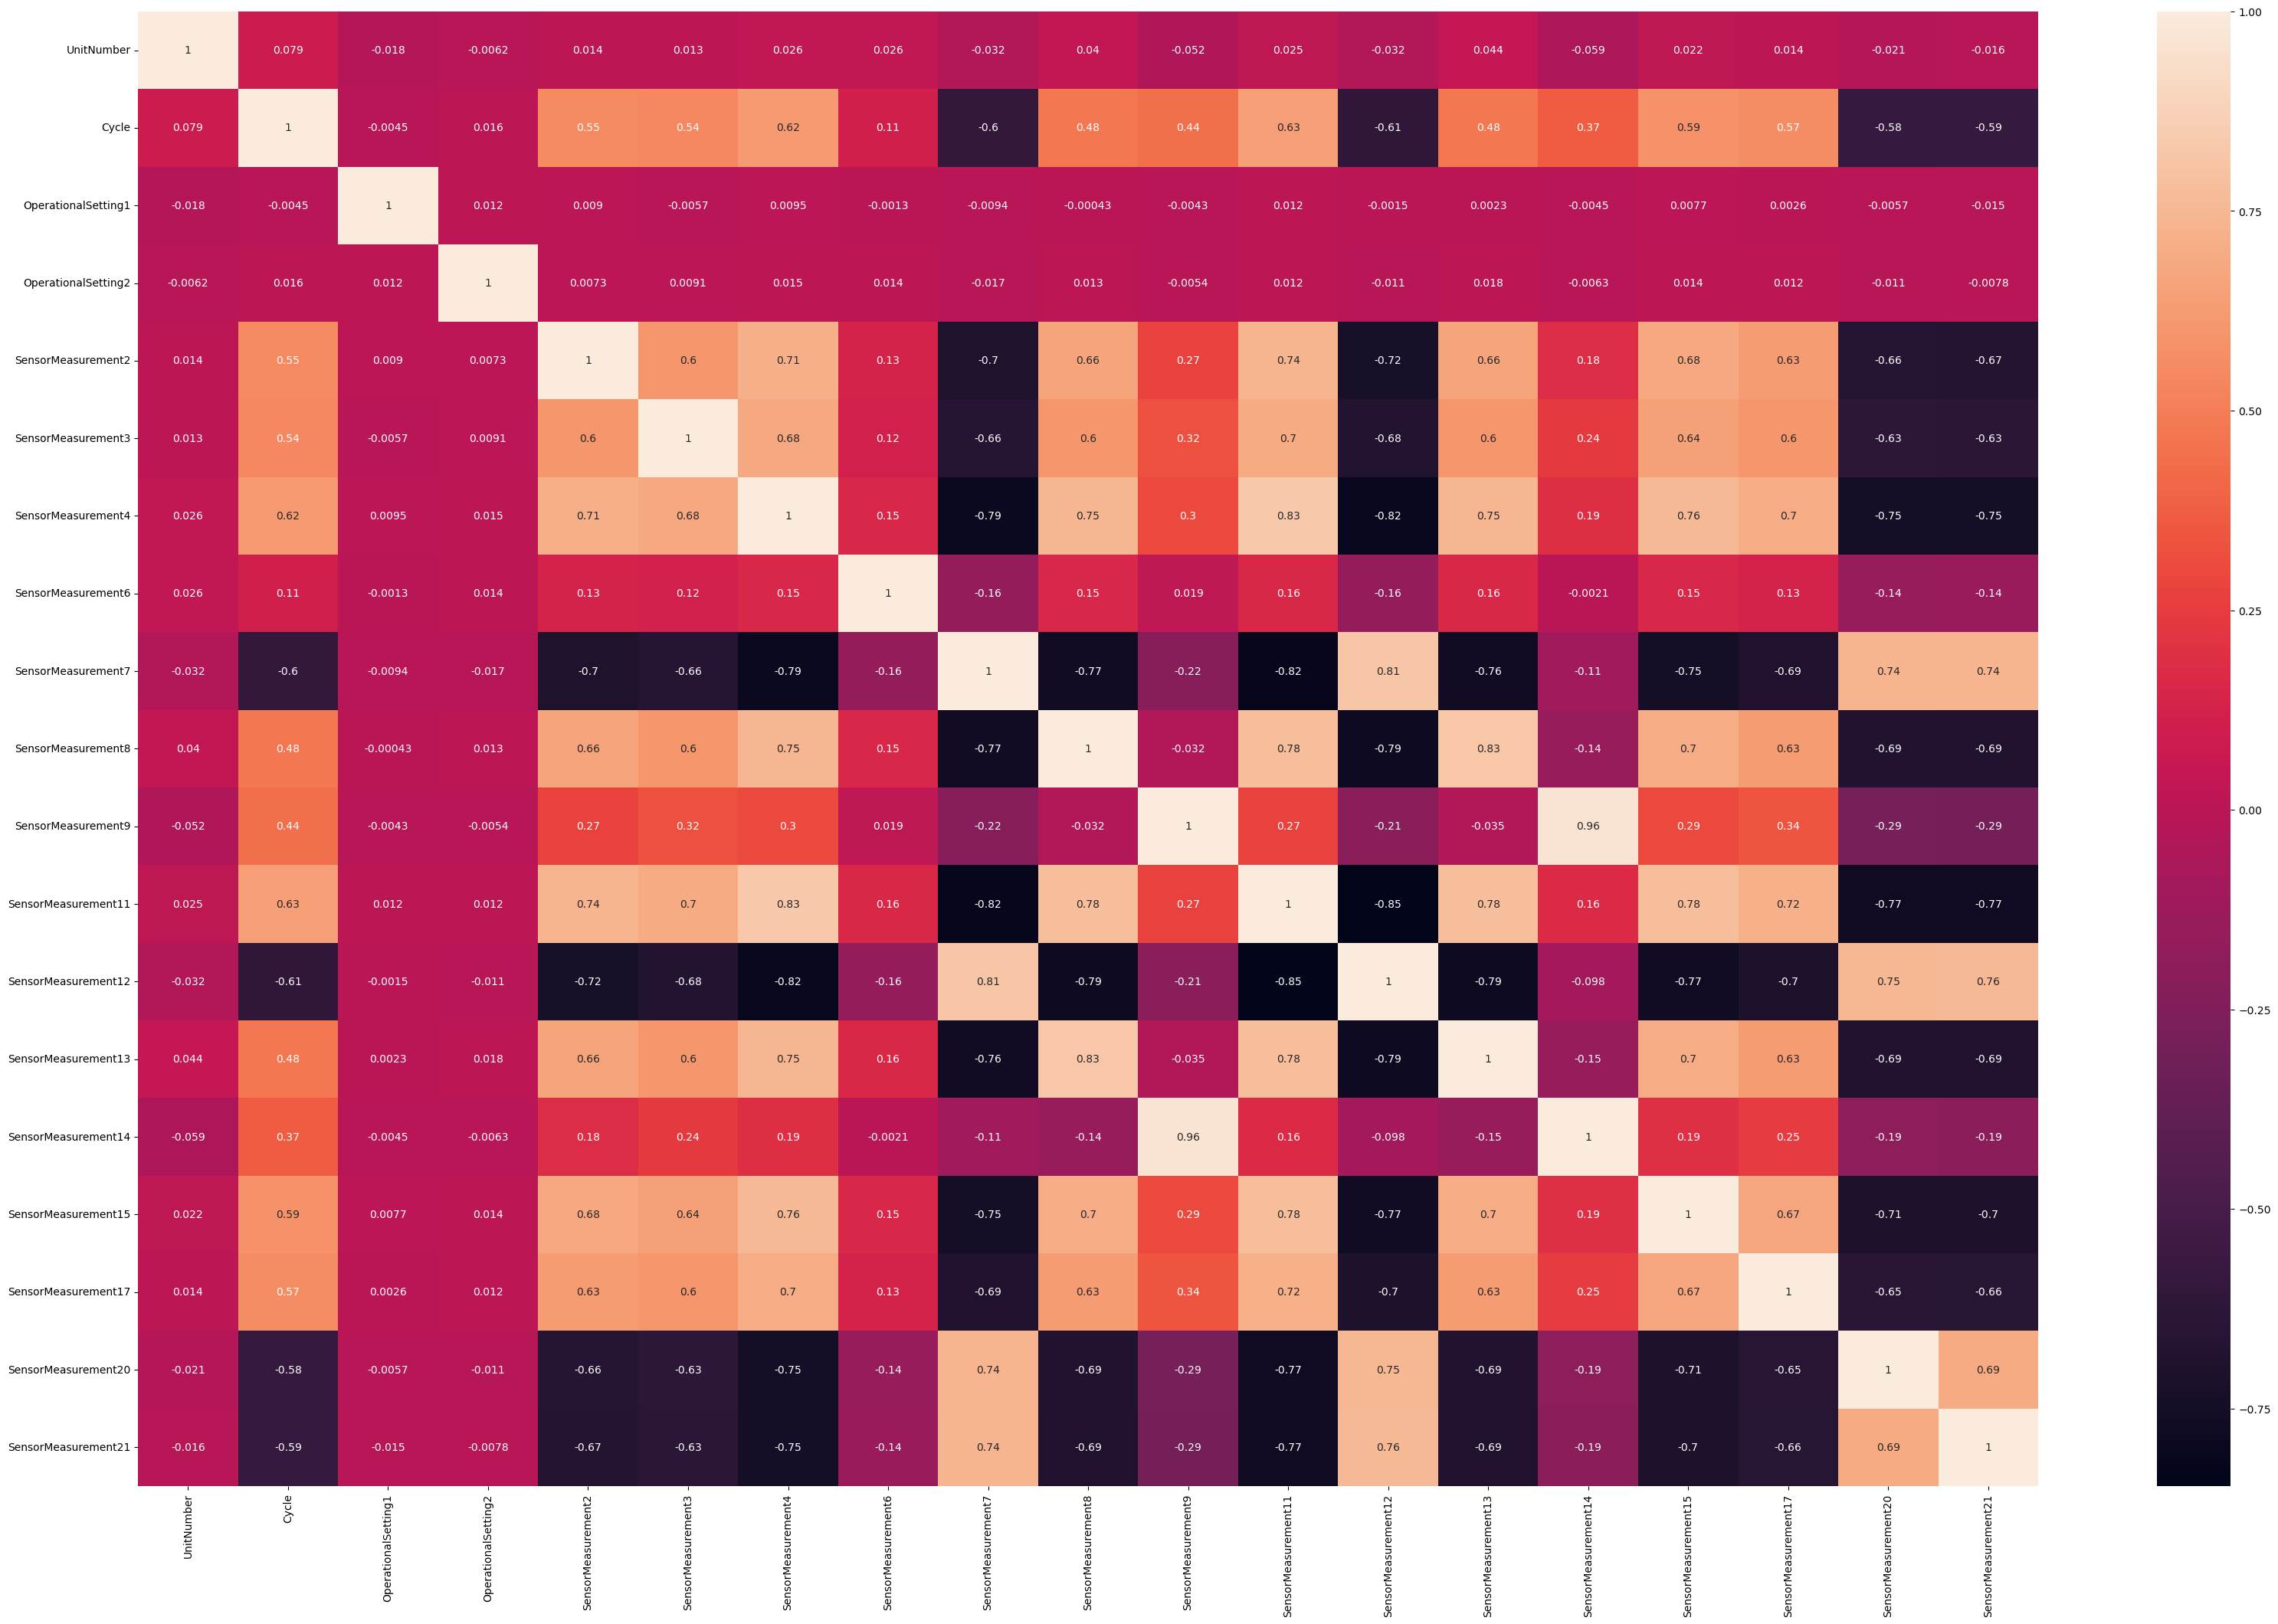

In [77]:
plt.figure(figsize=(40,25))
sns.heatmap(train_corr, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

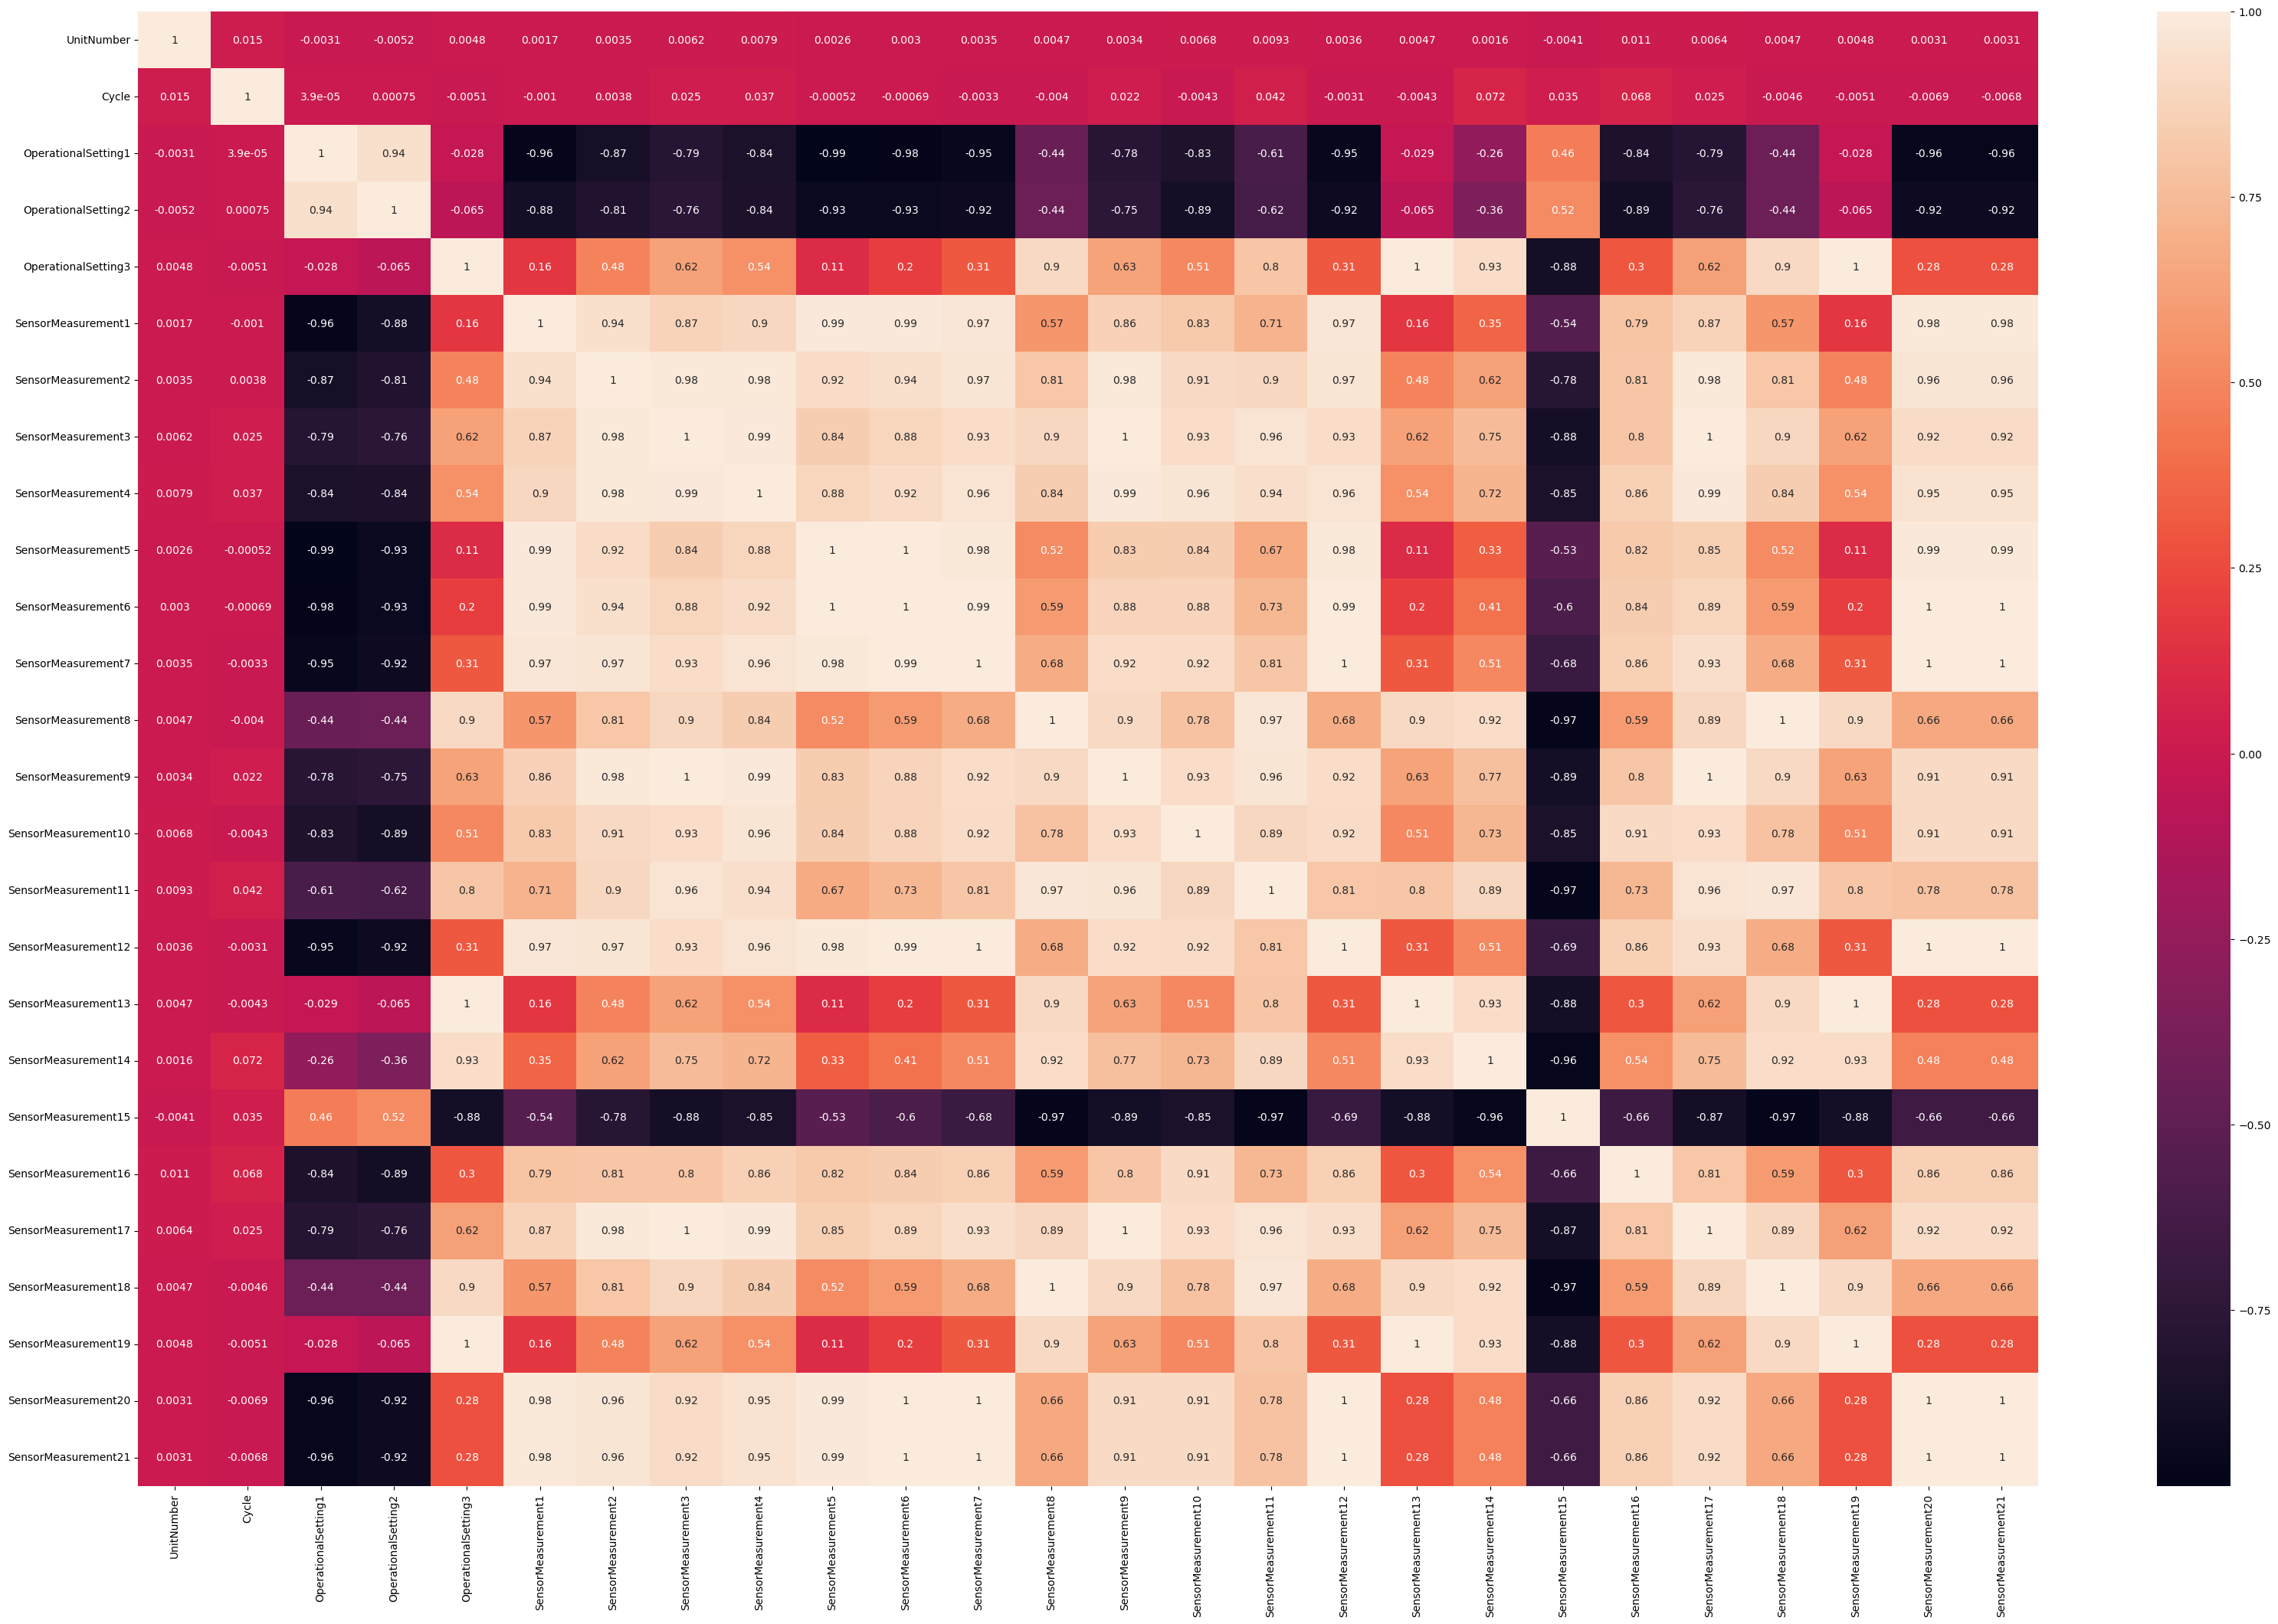

In [78]:
plt.figure(figsize=(40,25))
sns.heatmap(train1_corr, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

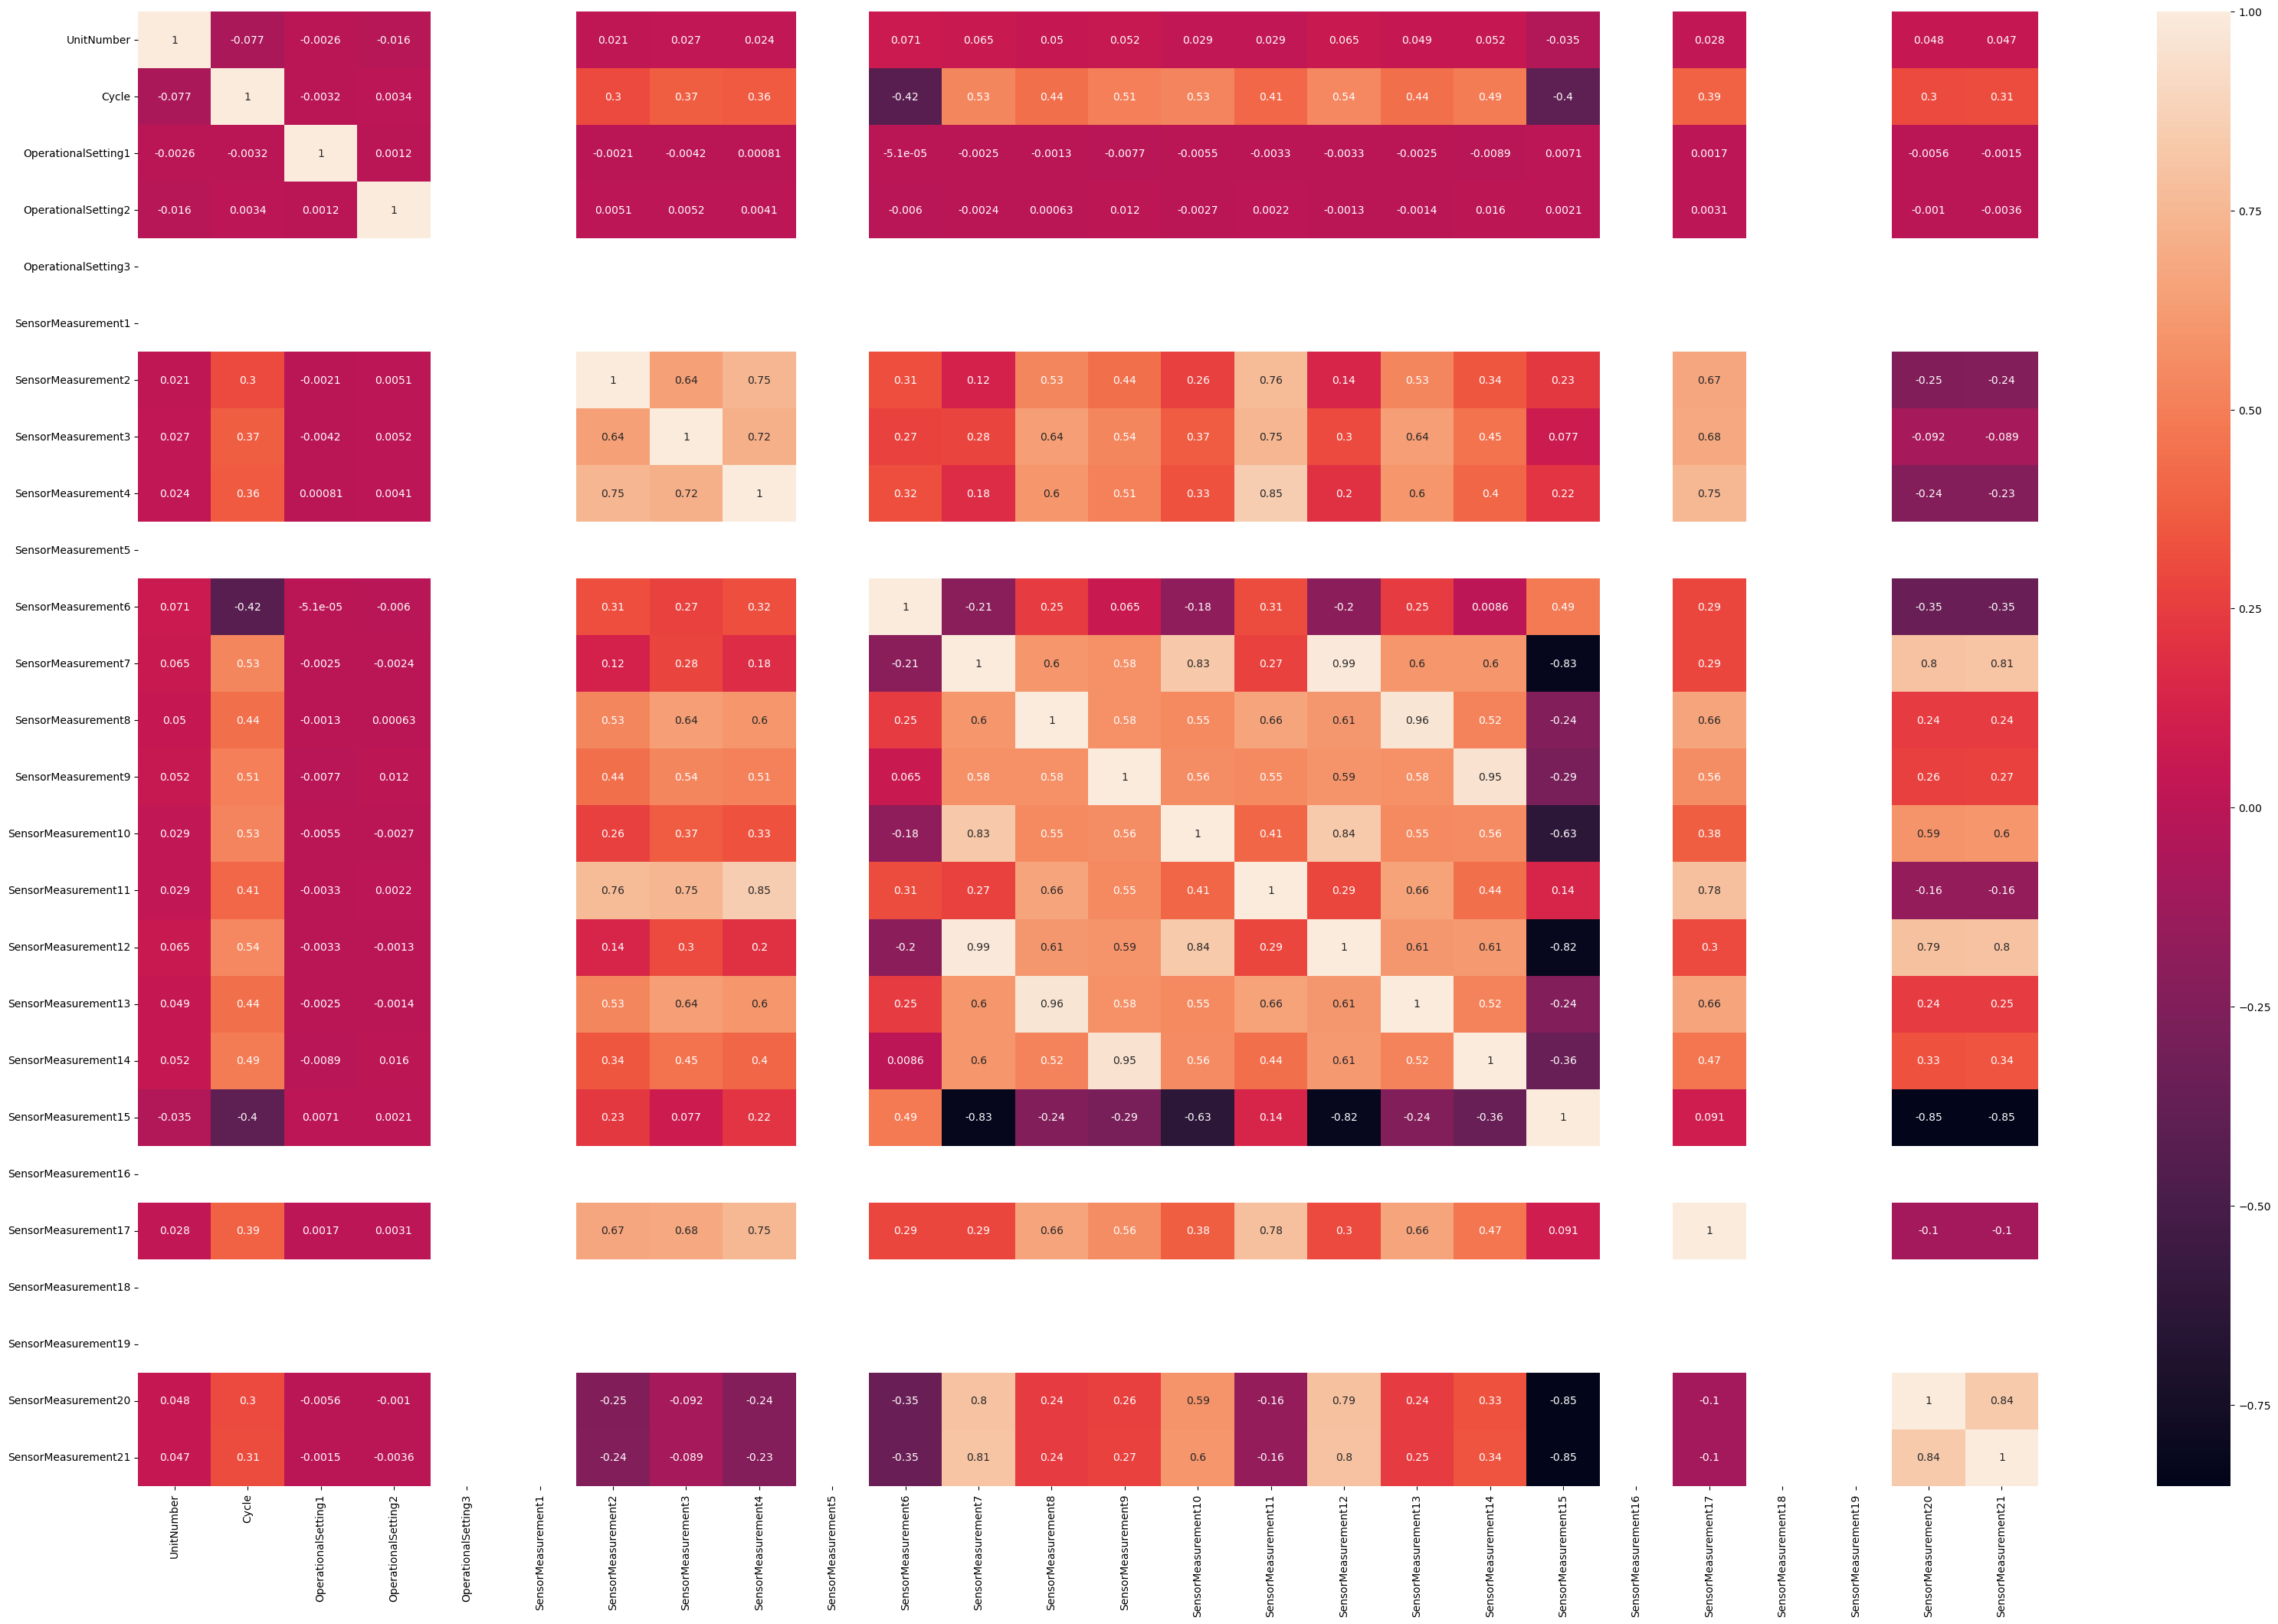

In [79]:
plt.figure(figsize=(40,25))
sns.heatmap(train2_corr, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

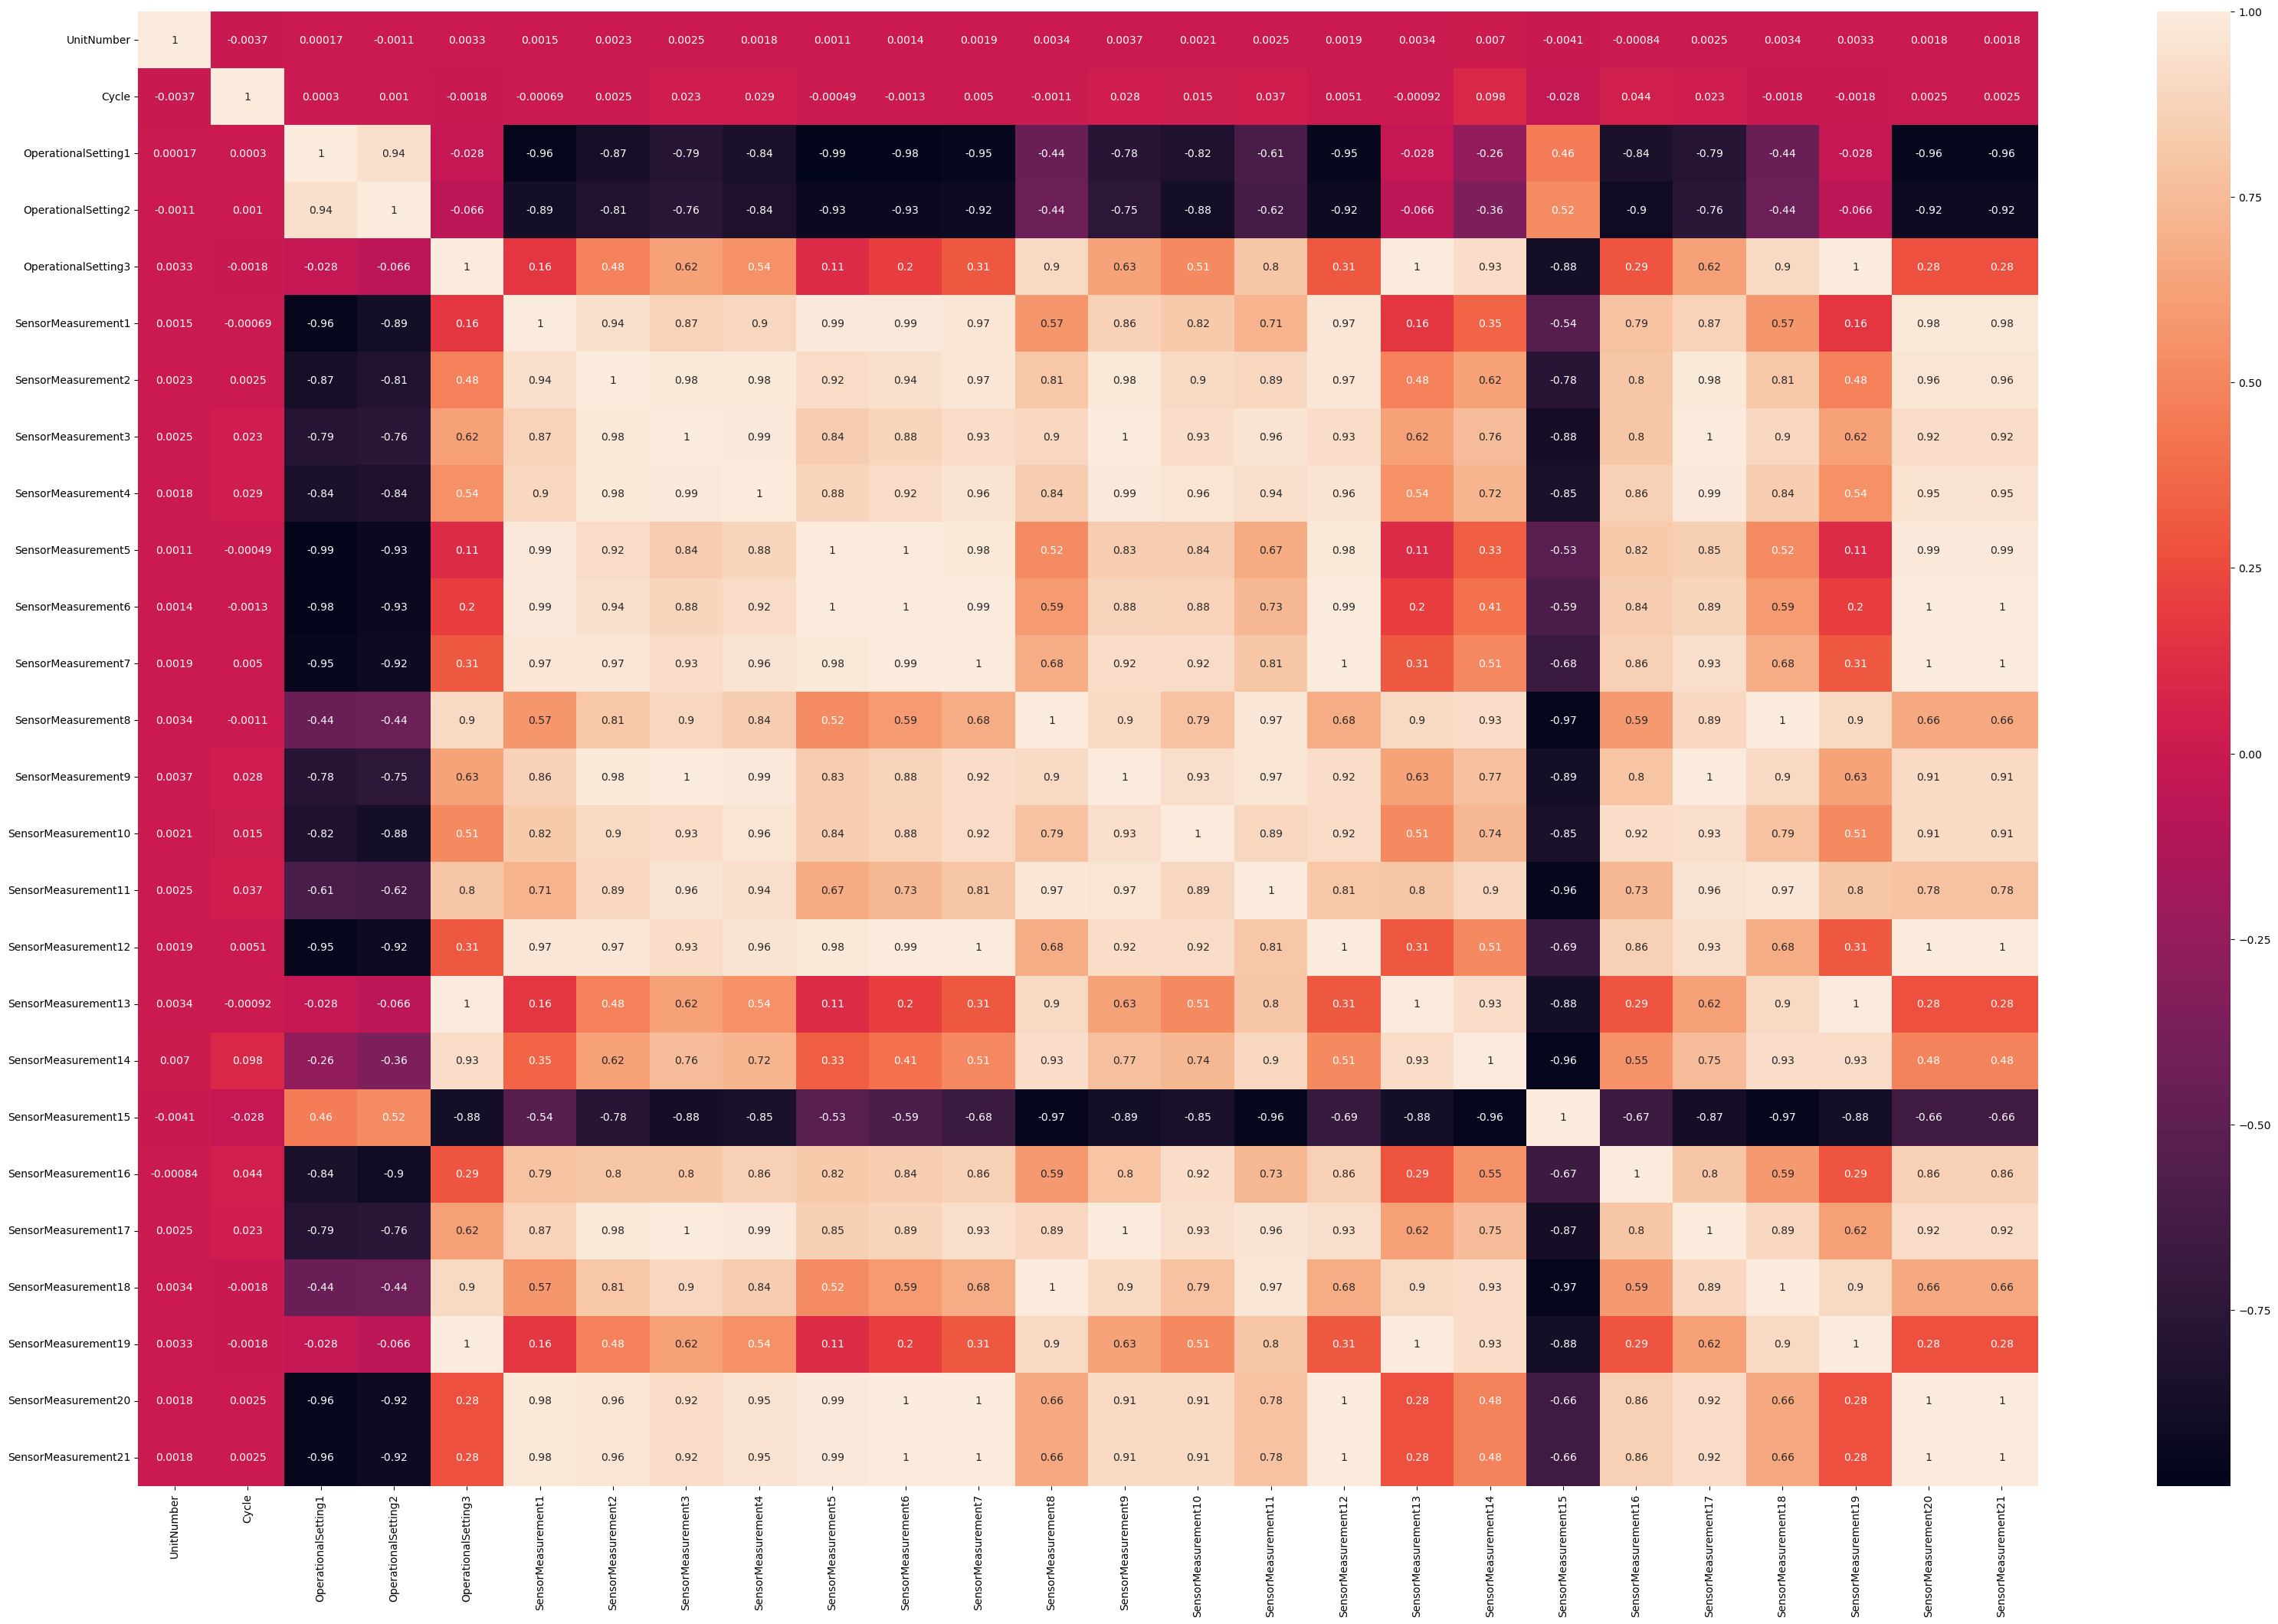

In [80]:
plt.figure(figsize=(40,25))
sns.heatmap(train3_corr, annot=True)
plt.show

# looking at the correlation in the test dataset

In [81]:
test_corr = test.corr()
test1_corr = test1.corr()
test2_corr = test2.corr()
test3_corr = test3.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

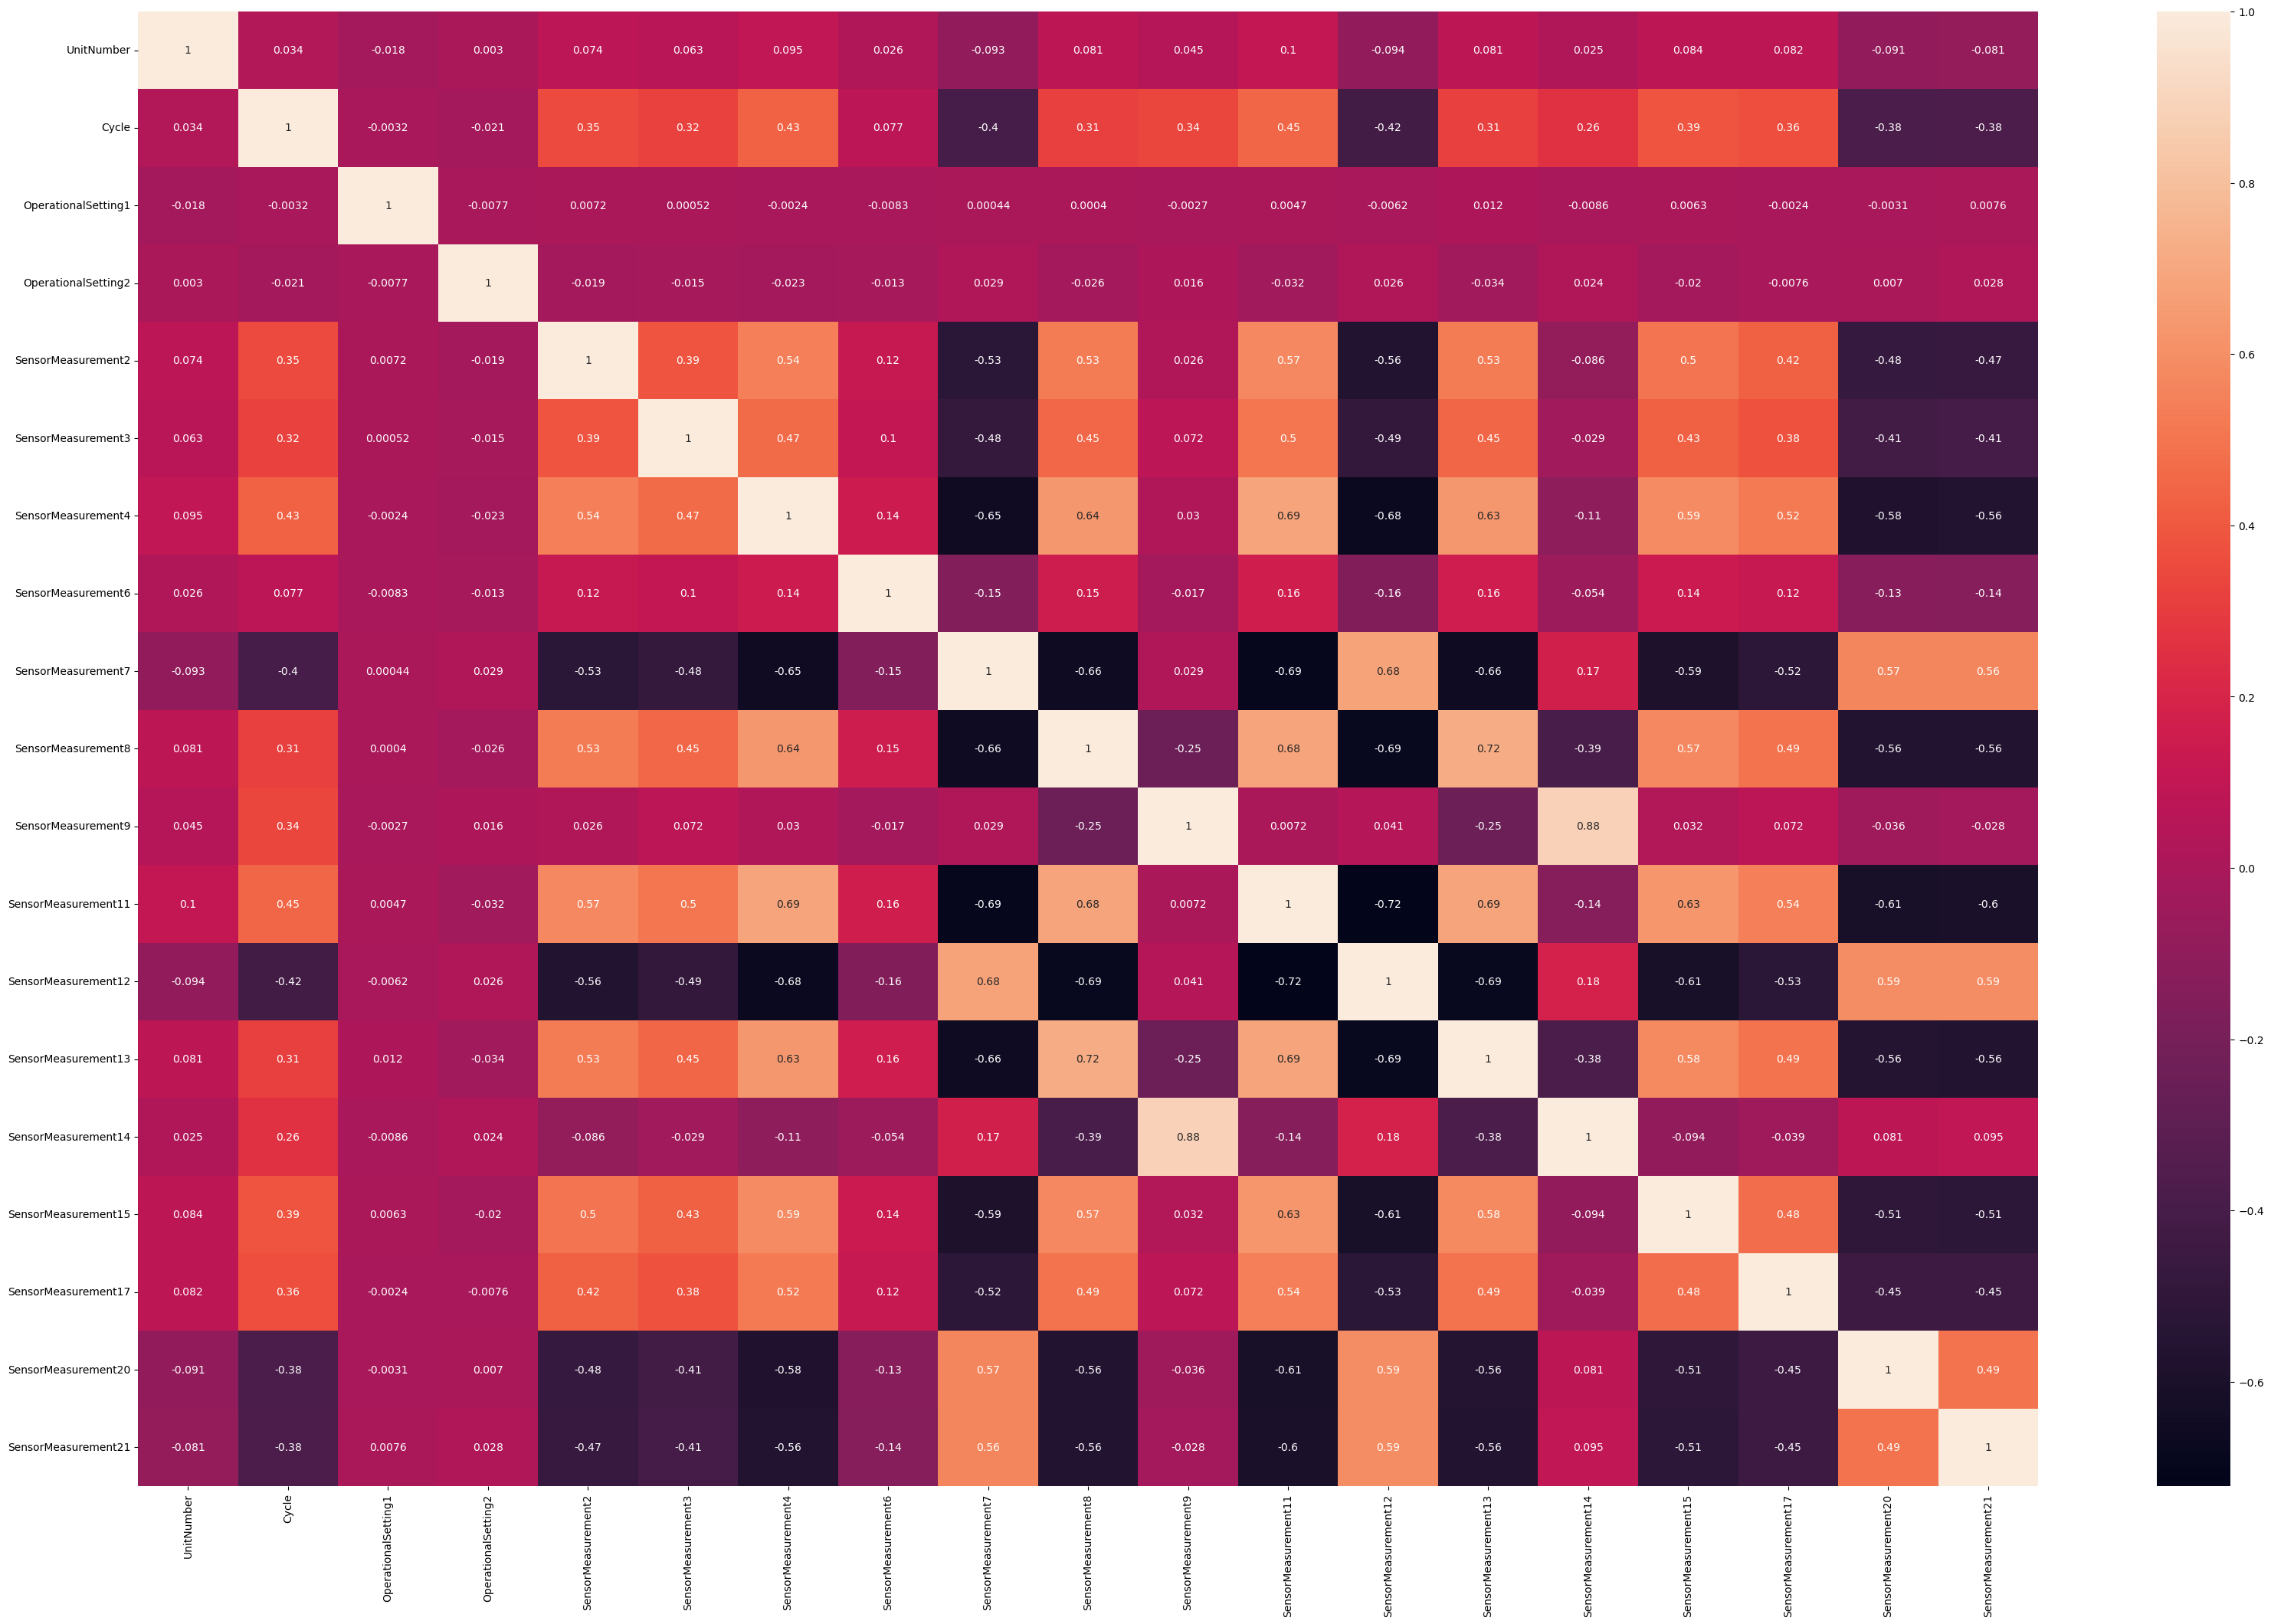

In [82]:
plt.figure(figsize=(40,25))
sns.heatmap(test_corr, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

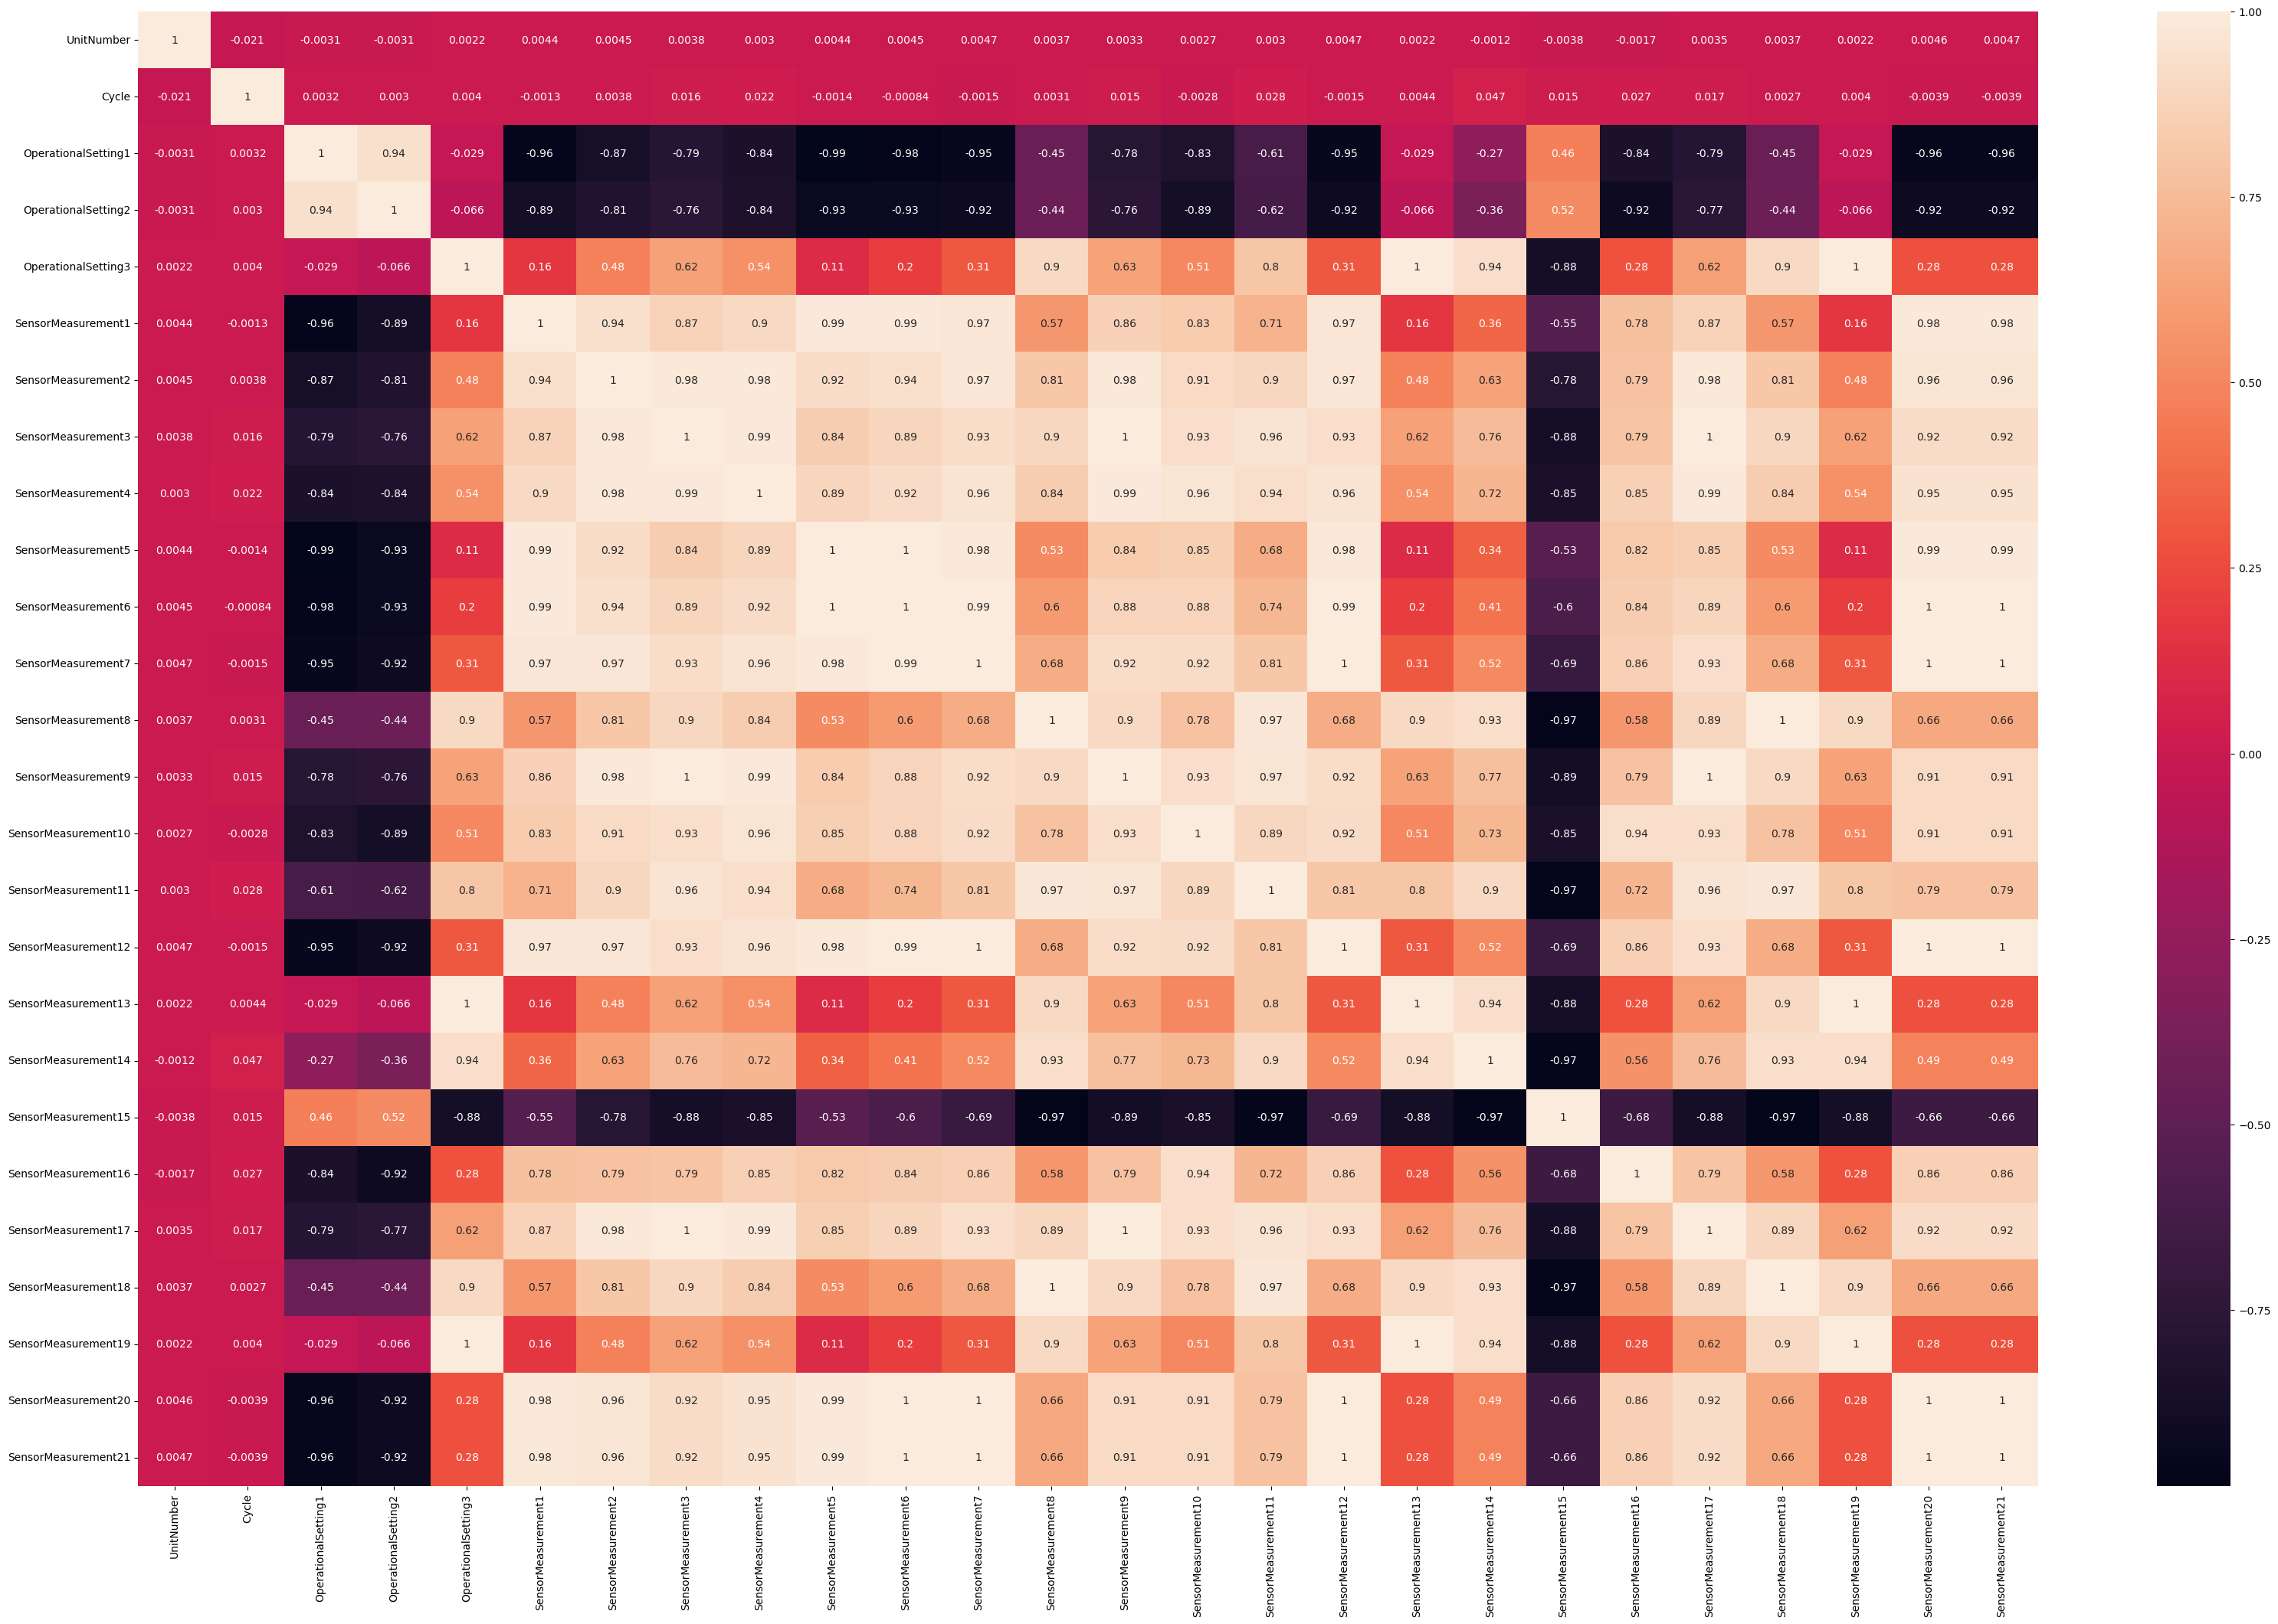

In [83]:
plt.figure(figsize=(40,25))
sns.heatmap(test1_corr, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

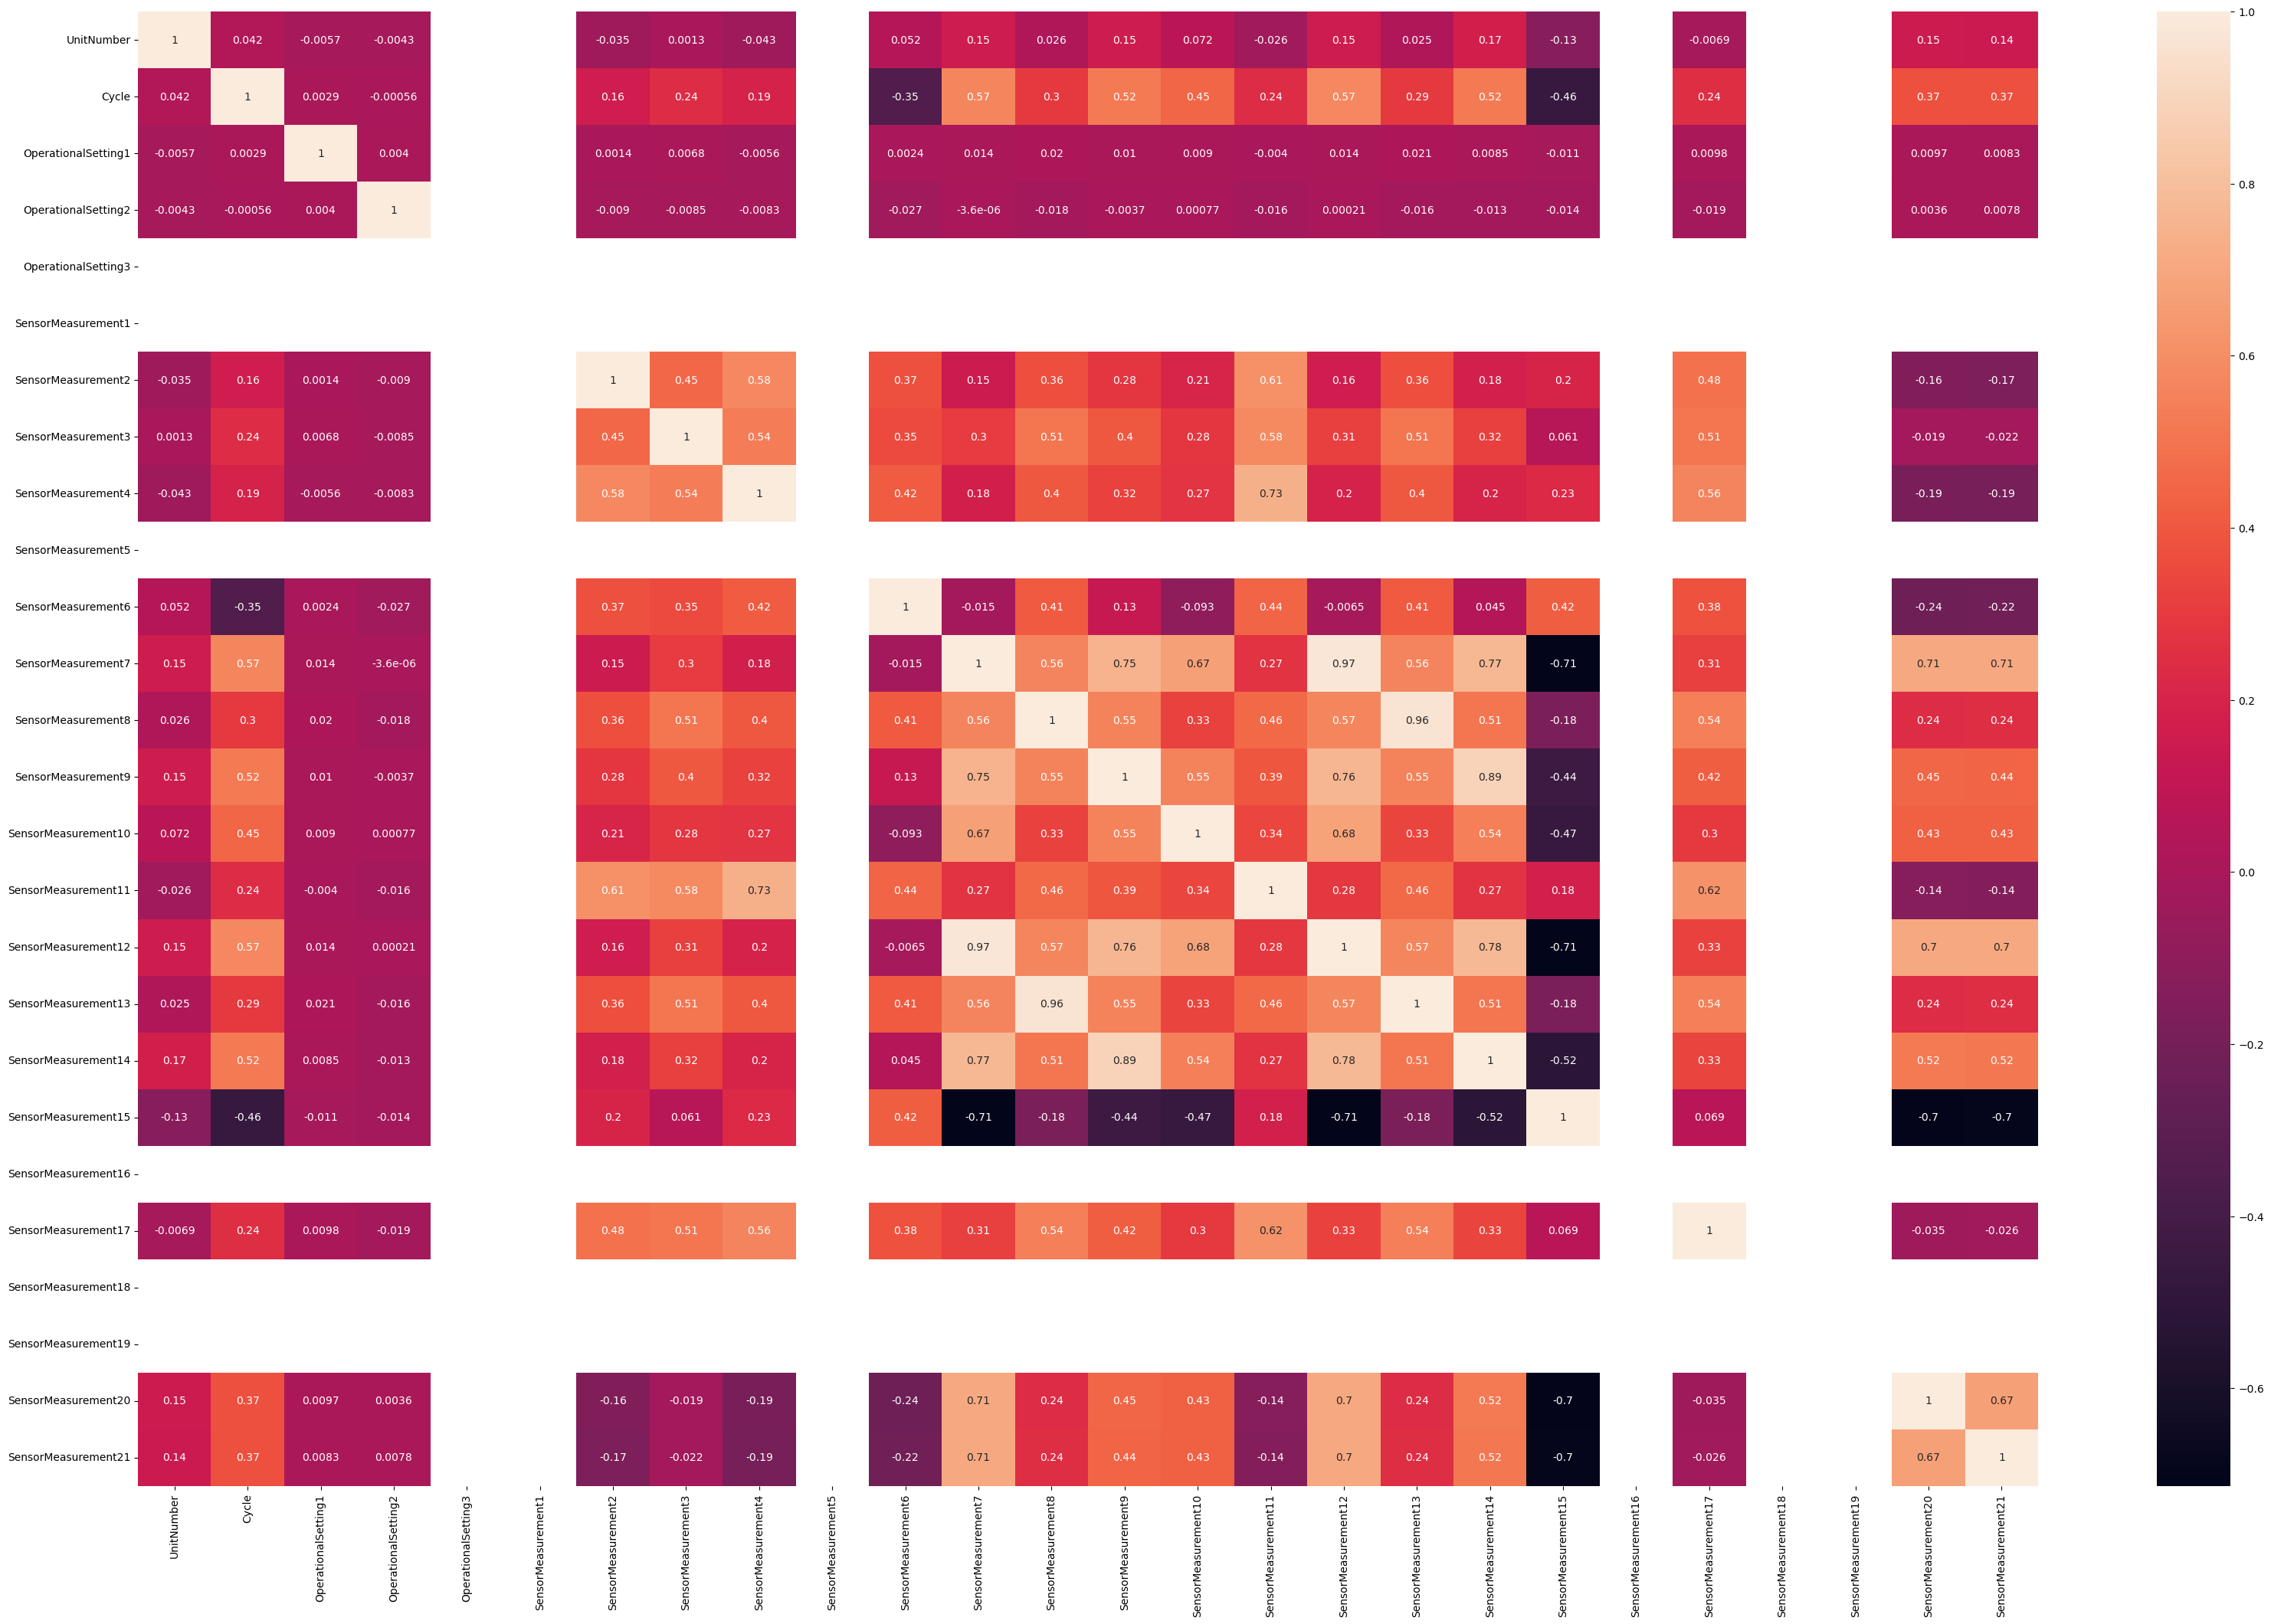

In [84]:
plt.figure(figsize=(40,25))
sns.heatmap(test2_corr, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

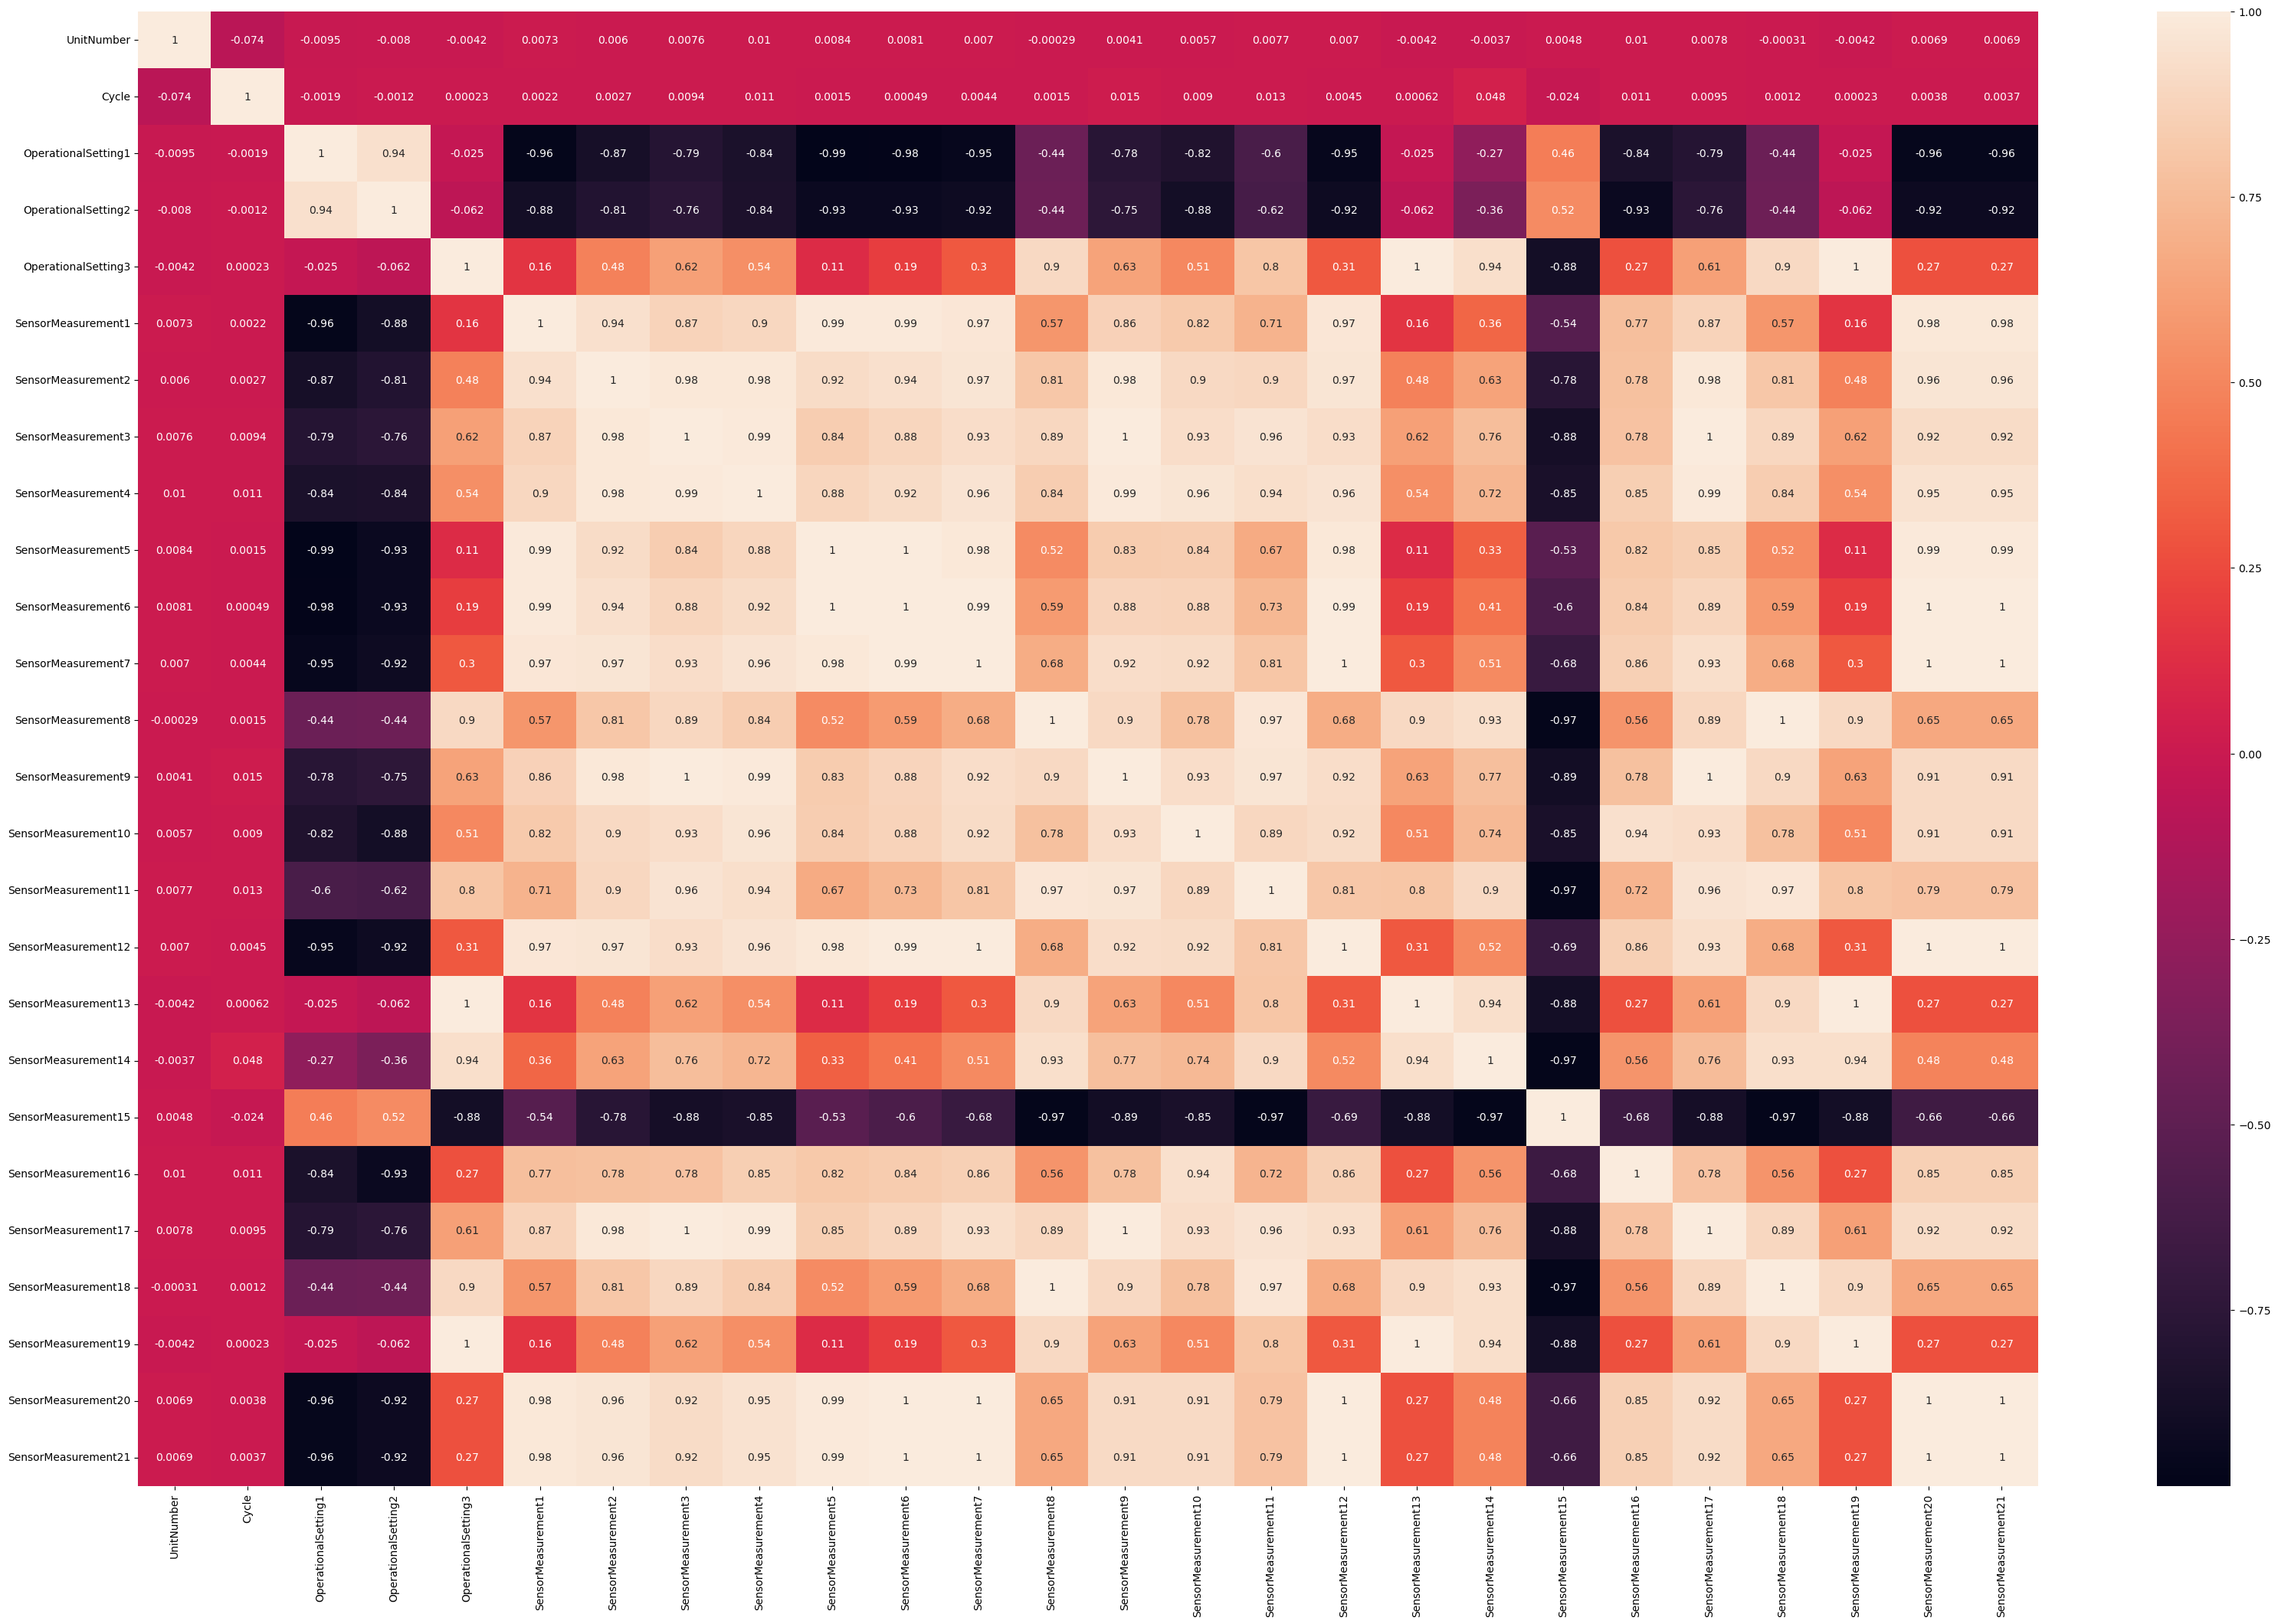

In [85]:
plt.figure(figsize=(40,25))
sns.heatmap(test3_corr, annot=True)
plt.show

In [86]:
train.describe()


UnitNumber     Cycle  OperationalSetting1  OperationalSetting2  \
count   20631.000 20631.000            20631.000            20631.000   
mean       51.507   108.808               -0.000                0.000   
std        29.228    68.881                0.002                0.000   
min         1.000     1.000               -0.009               -0.001   
25%        26.000    52.000               -0.002               -0.000   
50%        52.000   104.000                0.000                0.000   
75%        77.000   156.000                0.002                0.000   
max       100.000   362.000                0.009                0.001   

       SensorMeasurement2  SensorMeasurement3  SensorMeasurement4  \
count           20631.000           20631.000           20631.000   
mean              642.681            1590.523            1408.934   
std                 0.500               6.131               9.001   
min               641.210            1571.040            1382.250   
25%               642.325            1586.260            1402.360   
50%               642.640            1590.100            1408.040   
75%               643.000            1594.380            1414.555   
max               644.530            1616.910            1441.490   

       SensorMeasurement6  SensorMeasurement7  SensorMeasurement8  \
count           20631.000           20631.000           20631.000   
mean               21.610             553.368            2388.097   
std                 0.001               0.885               0.071   
min                21.600             549.850            2387.900   
25%                21.610             552.810            2388.050   
50%                21.610             553.440            2388.090   
75%                21.610             554.010            2388.140   
max                21.610             556.060            2388.560   

       SensorMeasurement9  SensorMeasurement11  SensorMeasurement12  \
count           20631.000            20631.000            20631.000   
mean             9065.243               47.541              521.413   
std                22.083                0.267                0.738   
min              9021.730               46.850              518.690   
25%              9053.100               47.350              520.960   
50%              9060.660               47.510              521.480   
75%              9069.420               47.700              521.950   
max              9244.590               48.530              523.380   

       SensorMeasurement13  SensorMeasurement14  SensorMeasurement15  \
count            20631.000            20631.000            20631.000   
mean              2388.096             8143.753                8.442   
std                  0.072               19.076                0.038   
min               2387.880             8099.940                8.325   
25%               2388.040             8133.245                8.415   
50%               2388.090             8140.540                8.439   
75%               2388.140             8148.310                8.466   
max               2388.560             8293.720                8.585   

       SensorMeasurement17  SensorMeasurement20  SensorMeasurement21  
count            20631.000            20631.000            20631.000  
mean               393.211               38.816               23.290  
std                  1.549                0.181                0.108  
min                388.000               38.140               22.894  
25%                392.000               38.700               23.222  
50%                393.000               38.830               23.298  
75%                394.000               38.950               23.367  
max                400.000               39.430               23.618

In [87]:
train['Cycle'].max()

362

# calculating time to failure for every row 

In [88]:
train['TTF']=train['Cycle'].max() - train['Cycle']

In [89]:
train['TTF']

0        361
1        360
2        359
3        358
4        357
        ... 
20626    166
20627    165
20628    164
20629    163
20630    162
Name: TTF, Length: 20631, dtype: int64

In [90]:
train['TTF'].describe()

count   20631.000
mean      253.192
std        68.881
min         0.000
25%       206.000
50%       258.000
75%       310.000
max       361.000
Name: TTF, dtype: float64

In [91]:
scaler = MinMaxScaler()

In [92]:
train.describe().T

count     mean    std      min      25%      50%  \
UnitNumber          20631.000   51.507 29.228    1.000   26.000   52.000   
Cycle               20631.000  108.808 68.881    1.000   52.000  104.000   
OperationalSetting1 20631.000   -0.000  0.002   -0.009   -0.002    0.000   
OperationalSetting2 20631.000    0.000  0.000   -0.001   -0.000    0.000   
SensorMeasurement2  20631.000  642.681  0.500  641.210  642.325  642.640   
SensorMeasurement3  20631.000 1590.523  6.131 1571.040 1586.260 1590.100   
SensorMeasurement4  20631.000 1408.934  9.001 1382.250 1402.360 1408.040   
SensorMeasurement6  20631.000   21.610  0.001   21.600   21.610   21.610   
SensorMeasurement7  20631.000  553.368  0.885  549.850  552.810  553.440   
SensorMeasurement8  20631.000 2388.097  0.071 2387.900 2388.050 2388.090   
SensorMeasurement9  20631.000 9065.243 22.083 9021.730 9053.100 9060.660   
SensorMeasurement11 20631.000   47.541  0.267   46.850   47.350   47.510   
SensorMeasurement12 20631.000  521.413  0.738  518.690  520.960  521.480   
SensorMeasurement13 20631.000 2388.096  0.072 2387.880 2388.040 2388.090   
SensorMeasurement14 20631.000 8143.753 19.076 8099.940 8133.245 8140.540   
SensorMeasurement15 20631.000    8.442  0.038    8.325    8.415    8.439   
SensorMeasurement17 20631.000  393.211  1.549  388.000  392.000  393.000   
SensorMeasurement20 20631.000   38.816  0.181   38.140   38.700   38.830   
SensorMeasurement21 20631.000   23.290  0.108   22.894   23.222   23.298   
TTF                 20631.000  253.192 68.881    0.000  206.000  258.000   

                         75%      max  
UnitNumber            77.000  100.000  
Cycle                156.000  362.000  
OperationalSetting1    0.002    0.009  
OperationalSetting2    0.000    0.001  
SensorMeasurement2   643.000  644.530  
SensorMeasurement3  1594.380 1616.910  
SensorMeasurement4  1414.555 1441.490  
SensorMeasurement6    21.610   21.610  
SensorMeasurement7   554.010  556.060  
SensorMeasurement8  2388.140 2388.560  
SensorMeasurement9  9069.420 9244.590  
SensorMeasurement11   47.700   48.530  
SensorMeasurement12  521.950  523.380  
SensorMeasurement13 2388.140 2388.560  
SensorMeasurement14 8148.310 8293.720  
SensorMeasurement15    8.466    8.585  
SensorMeasurement17  394.000  400.000  
SensorMeasurement20   38.950   39.430  
SensorMeasurement21   23.367   23.618  
TTF                  310.000  361.000

In [93]:
# making a copy of the data

In [94]:
ntrain = train.copy()

In [95]:
#scaling data

In [96]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [97]:
ntest = test.copy()

In [98]:
pd.DataFrame(ntest.columns).T

0      1                    2                    3   \
0  UnitNumber  Cycle  OperationalSetting1  OperationalSetting2   

                   4                   5                   6   \
0  SensorMeasurement2  SensorMeasurement3  SensorMeasurement4   

                   7                   8                   9   \
0  SensorMeasurement6  SensorMeasurement7  SensorMeasurement8   

                   10                   11                   12  \
0  SensorMeasurement9  SensorMeasurement11  SensorMeasurement12   

                    13                   14                   15  \
0  SensorMeasurement13  SensorMeasurement14  SensorMeasurement15   

                    16                   17                   18  
0  SensorMeasurement17  SensorMeasurement20  SensorMeasurement21

In [99]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])
ntest.describe().T

count   mean    std    min    25%    50%     75%  \
UnitNumber          13096.000 51.544 28.289  1.000 28.000 52.000  76.000   
Cycle               13096.000 76.837 53.058  1.000 33.000 69.000 113.000   
OperationalSetting1 13096.000  0.499  0.127  0.029  0.414  0.500   0.586   
OperationalSetting2 13096.000  0.504  0.245  0.000  0.333  0.500   0.750   
SensorMeasurement2  13096.000  0.381  0.121 -0.024  0.297  0.377   0.461   
SensorMeasurement3  13096.000  0.372  0.109 -0.044  0.296  0.370   0.443   
SensorMeasurement4  13096.000  0.380  0.113  0.036  0.299  0.375   0.452   
SensorMeasurement6  13096.000  0.970  0.170  0.000  1.000  1.000   1.000   
SensorMeasurement7  13096.000  0.629  0.110  0.166  0.557  0.636   0.707   
SensorMeasurement8  13096.000  0.259  0.087 -0.015  0.197  0.258   0.318   
SensorMeasurement9  13096.000  0.165  0.051  0.013  0.131  0.160   0.190   
SensorMeasurement11 13096.000  0.337  0.117 -0.030  0.250  0.333   0.411   
SensorMeasurement12 13096.000  0.652  0.119  0.147  0.574  0.659   0.738   
SensorMeasurement13 13096.000  0.281  0.084  0.015  0.221  0.279   0.338   
SensorMeasurement14 13096.000  0.201  0.053  0.044  0.167  0.198   0.229   
SensorMeasurement15 13096.000  0.388  0.112  0.030  0.311  0.385   0.459   
SensorMeasurement17 13096.000  0.381  0.103  0.083  0.333  0.417   0.417   
SensorMeasurement20 13096.000  0.583  0.110  0.132  0.512  0.589   0.659   
SensorMeasurement21 13096.000  0.610  0.116  0.057  0.535  0.614   0.690   

                        max  
UnitNumber          100.000  
Cycle               303.000  
OperationalSetting1   0.948  
OperationalSetting2   1.083  
SensorMeasurement2    0.931  
SensorMeasurement3    0.796  
SensorMeasurement4    0.863  
SensorMeasurement6    1.000  
SensorMeasurement7    0.965  
SensorMeasurement8    0.606  
SensorMeasurement9    0.598  
SensorMeasurement11   0.839  
SensorMeasurement12   1.081  
SensorMeasurement13   0.647  
SensorMeasurement14   0.622  
SensorMeasurement15   0.833  
SensorMeasurement17   0.750  
SensorMeasurement20   0.984  
SensorMeasurement21   1.032

In [100]:
#Columns for training model
pd.DataFrame(ntrain.columns).T

0      1                    2                    3   \
0  UnitNumber  Cycle  OperationalSetting1  OperationalSetting2   

                   4                   5                   6   \
0  SensorMeasurement2  SensorMeasurement3  SensorMeasurement4   

                   7                   8                   9   \
0  SensorMeasurement6  SensorMeasurement7  SensorMeasurement8   

                   10                   11                   12  \
0  SensorMeasurement9  SensorMeasurement11  SensorMeasurement12   

                    13                   14                   15  \
0  SensorMeasurement13  SensorMeasurement14  SensorMeasurement15   

                    16                   17                   18   19  
0  SensorMeasurement17  SensorMeasurement20  SensorMeasurement21  TTF

In [101]:
#1
X_train = ntrain.values[:,2:19]
X_train

array([[0.45977011, 0.16666667, 0.18373494, ..., 0.33333333, 0.71317829,
        0.7246617 ],
       [0.6091954 , 0.25      , 0.28313253, ..., 0.33333333, 0.66666667,
        0.73101353],
       [0.25287356, 0.75      , 0.34337349, ..., 0.16666667, 0.62790698,
        0.62137531],
       ...,
       [0.52298851, 0.5       , 0.66566265, ..., 0.83333333, 0.23255814,
        0.05399061],
       [0.43678161, 0.75      , 0.60843373, ..., 0.58333333, 0.11627907,
        0.23446562],
       [0.31609195, 0.08333333, 0.79518072, ..., 0.66666667, 0.17829457,
        0.21817178]])

In [102]:
#finding the format of x train
type(X_train)

numpy.ndarray

In [103]:
Y_train = ntrain.values[:, 19]
Y_train

array([361., 360., 359., ..., 164., 163., 162.])

In [104]:
#1
X_test = ntest.values[:,2:19]
X_test

array([[0.63218391, 0.75      , 0.54518072, ..., 0.33333333, 0.55813953,
        0.66183375],
       [0.34482759, 0.25      , 0.15060241, ..., 0.41666667, 0.68217054,
        0.68682684],
       [0.51724138, 0.58333333, 0.37650602, ..., 0.41666667, 0.72868217,
        0.72134769],
       ...,
       [0.46551724, 0.25      , 0.67168675, ..., 0.58333333, 0.37209302,
        0.4293013 ],
       [0.2816092 , 0.58333333, 0.61746988, ..., 0.58333333, 0.40310078,
        0.51877934],
       [0.57471264, 0.75      , 0.52409639, ..., 0.66666667, 0.43410853,
        0.40223695]])

In [105]:
Y_test = ntest.values[:, 18]
Y_test

array([0.66183375, 0.68682684, 0.72134769, ..., 0.4293013 , 0.51877934,
       0.40223695])

# Random Forest Model!

In [106]:
#random forest model!!!
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [108]:
model_dt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 9, 
                               class_weight={0: 1, 1: 3}, criterion = 'gini', random_state = 21)
model_dt.fit(X_train, Y_train)
model_dt_pred = model_dt.predict(X_test)

print(model_dt_pred)

[346. 312. 276. ... 195. 195. 169.]


In [109]:
model_pred = pd.DataFrame(model_dt_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Tree'})


display(model_pred.sample(5, random_state=244))

Predict_Tree
8097        276.000
10152       346.000
3526        276.000
7063        346.000
7517        276.000

In [129]:
model_pred.describe()

Predict_Rf
count   13096.000
mean      282.160
std        51.362
min        43.000
25%       248.000
50%       288.000
75%       324.000
max       361.000

In [110]:
#making predictions!

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
model_rf = RandomForestClassifier(n_estimators=100, random_state = 21)
model_rf.fit(X_train, Y_train)
model_rf_pred = model_rf.predict(X_test)

print(model_rf_pred)

[334. 321. 320. ... 170. 177. 176.]


In [113]:
model_pred = pd.DataFrame(model_rf_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Rf'})


display(model_pred.sample(20, random_state=244))

Predict_Rf
8097      337.000
10152     347.000
3526      246.000
7063      331.000
7517      120.000
11179     293.000
7317      340.000
5105      343.000
7247      322.000
1891      228.000
9194      262.000
9823      244.000
12599     275.000
11938     254.000
5919      257.000
3739      308.000
12113     256.000
2630      272.000
12228     276.000
167       291.000

In [114]:
score = model_rf.predict(X_test)

In [115]:
score[0:20]

array([334., 321., 320., 338., 338., 339., 272., 299., 274., 315., 360.,
       272., 235., 330., 272., 348., 327., 356., 343., 318.])

In [116]:
# finding min and max of score
print(score.min(), score.max())

43.0 361.0


In [117]:
# previously, we put RUL in fraction. now converting it to num cycles
test = pd.merge(test, test.groupby('UnitNumber',as_index=False)['Cycle'].max(), how='left', on='UnitNumber')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
test['score'] = score
test.head()

UnitNumber  Cycle_x  OperationalSetting1  OperationalSetting2  \
0           1        1                0.002                0.000   
1           1        2               -0.003               -0.000   
2           1        3                0.000                0.000   
3           1        4                0.004                0.000   
4           1        5                0.001                0.000   

   SensorMeasurement2  SensorMeasurement3  SensorMeasurement4  \
0             643.020            1585.290            1398.210   
1             641.710            1588.450            1395.420   
2             642.460            1586.940            1401.340   
3             642.440            1584.120            1406.420   
4             642.510            1587.190            1401.920   

   SensorMeasurement6  SensorMeasurement7  SensorMeasurement8  ...  \
0              21.610             553.900            2388.040  ...   
1              21.610             554.850            2388.010  ...   
2              21.610             554.110            2388.050  ...   
3              21.610             554.070            2388.030  ...   
4              21.610             554.160            2388.010  ...   

   SensorMeasurement11  SensorMeasurement12  SensorMeasurement13  \
0               47.200              521.720             2388.030   
1               47.500              522.160             2388.060   
2               47.500              521.970             2388.030   
3               47.280              521.380             2388.050   
4               47.310              522.150             2388.030   

   SensorMeasurement14  SensorMeasurement15  SensorMeasurement17  \
0             8125.550                8.405                  392   
1             8139.620                8.380                  393   
2             8130.100                8.444                  393   
3             8132.900                8.392                  391   
4             8129.540                8.403                  390   

   SensorMeasurement20  SensorMeasurement21  Cycle_y   score  
0               38.860               23.373       31 334.000  
1               39.020               23.392       31 321.000  
2               39.080               23.417       31 320.000  
3               39.000               23.374       31 338.000  
4               38.990               23.413       31 338.000  

[5 rows x 21 columns]

In [118]:
# notes: score has scaled, test has unscaled

# estimating cycles

In [119]:
def totcycles(data):
 return(data['Cycle_x'] / (1-data['score']))
 
test['maxpredcycles'] = totcycles(test)

In [120]:
test['maxpredcycles']

0       -0.003
1       -0.006
2       -0.009
3       -0.012
4       -0.015
         ...  
13091   -1.026
13092   -1.127
13093   -1.160
13094   -1.119
13095   -1.131
Name: maxpredcycles, Length: 13096, dtype: float64

# RUL

In [121]:
def RULfunction(data):
 return(data['maxpredcycles'] - data['Cycle_y'].max())
test['RUL'] = RULfunction(test)

In [122]:
test['RUL']

0       -303.003
1       -303.006
2       -303.009
3       -303.012
4       -303.015
          ...   
13091   -304.026
13092   -304.127
13093   -304.160
13094   -304.119
13095   -304.131
Name: RUL, Length: 13096, dtype: float64

In [123]:
t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]
predictedRUL = []
for i in range(test.UnitNumber.min(), test.UnitNumber.max()+1):
 npredictedRUL = test[test.UnitNumber==i].iloc[test[test.UnitNumber==i].Cycle_x.max()-1,ind]

predictedRUL.append(npredictedRUL)

In [124]:
xtrueRUL = list(RUL['RUL'])
otrueRUL = []
for i in range(0,len(xtrueRUL)):
 otrueRUL = np.concatenate((otrueRUL,
 list(reversed(np.arange(int(xtrueRUL[i]))))))
xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []
for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL,list(reversed(np.arange(xpredictedRUL[i].item())))))
    xpredictedRUL1= []
for i in range(0,len(xpredictedRUL)):
    xpredictedRUL1.append(int(xpredictedRUL[i]))
xpredictedRUL2 = np.array(xpredictedRUL1)
xpredictedRUL2 = np.array(xpredictedRUL1)

In [125]:
df_trueVSpred = pd.concat([pd.Series(RUL['RUL']), pd.Series(xpredictedRUL2)], axis=1)
df_trueVSpred.columns = ['true', 'predicted']


In [126]:
#FIND TRUE VS PRED

df_trueVSpred['diff'] = df_trueVSpred['predicted'] - df_trueVSpred['true']
df_trueVSpred.head()

true  predicted     diff
0   112   -304.000 -416.000
1    98        NaN      NaN
2    69        NaN      NaN
3    82        NaN      NaN
4    91        NaN      NaN

In [127]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

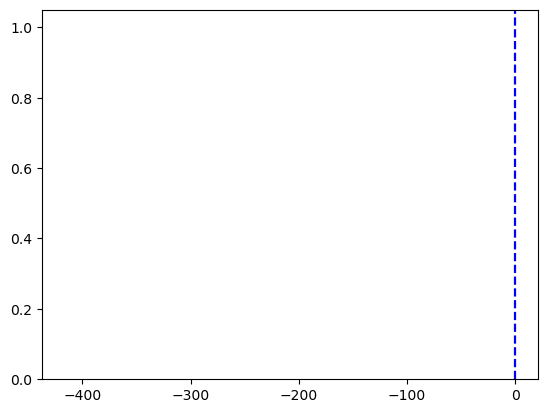

In [128]:
# looking at overestimation?
plt.hist(df_trueVSpred['diff'], bins=26, color="red", linewidth=1.2)
plt.axvline(0, color="blue", linestyle='dashed', linewidth=1.6)
plt.show()